In [1]:
## TOOL1: Further group the entries into Apo, Ab-bouund ##
import numpy as np
from collections import Counter

# The fasta files can be downloaded from https://www.rcsb.org/downloads/fasta 
# Each fasta file contains multiple sequences of the submitted PDB IDs.
# The potential ACE2-bound entries were already singled out during the PDB preprocessing (manual checking is needed to determine the variant type in this case).
# The entries grouped into the assigned variant type can either be apo-form or Ab-bound. Use this tool to check them out. (Note that the HexaPro ones can be assigned to certain variants, too.)

fasta_filenames = ['20230329_wild', '20230329_d614g', '20230329_alpha', '20230329_beta', '20230329_gamma', '20230329_delta', '20230329_kappa', '20230329_omicron']

def FindAb(file):
    gp = file
    fasta_entry = []
    with open(f'./20230326_RBDangle_analysis/{file}.fasta', 'r') as f:
        for l in f:
            if l[0] == '>':
                fasta_entry.append(l.split('|')[0][1:5].lower())

    c = Counter(fasta_entry)

    Ab_bound_dict = {key: value for key, value in c.items() if value > 1}
    Apo_dict = {key: value for key, value in c.items() if value == 1}
    
    print(f'{gp} Fasta Entries:\n{fasta_entry}\n')
    print(f'{gp} Ab_bound:\n{Ab_bound_dict.keys()}\n')
    print(f'{gp} Apo:\n{Apo_dict.keys()}\n')

for file in fasta_filenames:
    FindAb(file)

20230329_wild Fasta Entries:
['6vsb', '6vxx', '6vyb', '6wps', '6wps', '6wps', '6wpt', '6wpt', '6wpt', '6x29', '6x2a', '6x2b', '6x2c', '6x6p', '6x79', '6xcm', '6xcm', '6xcm', '6xcn', '6xcn', '6xcn', '6xey', '6xey', '6xey', '6xf5', '6xf6', '6xkl', '6xlu', '6xm0', '6xm3', '6xm4', '6xm5', '6xr8', '6z43', '6z43', '6z97', '6zb4', '6zb5', '6zdh', '6zdh', '6zdh', '6zge', '6zgg', '6zgh', '6zgi', '6zhd', '6zhd', '6zow', '6zox', '6zoy', '6zoz', '6zp0', '6zp1', '6zp2', '6zp7', '6zxn', '6zxn', '7a25', '7a25', '7a29', '7a29', '7a93', '7a94', '7a94', '7a95', '7a95', '7a96', '7a96', '7a97', '7a97', '7a98', '7a98', '7akd', '7akd', '7akd', '7b18', '7b18', '7b18', '7byr', '7byr', '7byr', '7c2l', '7c2l', '7c2l', '7cab', '7cac', '7cac', '7cac', '7cai', '7cai', '7cai', '7cak', '7cak', '7cak', '7chh', '7chh', '7chh', '7cn9', '7cwl', '7cwl', '7cwl', '7cwm', '7cwm', '7cwm', '7cwn', '7cwn', '7cwn', '7cwn', '7cwn', '7cwt', '7cwt', '7cwt', '7cwt', '7cwt', '7cwu', '7cwu', '7cwu', '7cwu', '7cwu', '7cyp', '7cyp', '7

In [4]:
## TOOL2: Find HexaPro. ##
import re

def findHexaPro(seq):
    pat_start = [m.start() for m in re.finditer('P[A-Z]{74}P[A-Z]{6}P[A-Z]{42}P', seq)]
    return pat_start

# fasta_filenames = ['20230329_wild', '20230329_d614g', '20230329_alpha', '20230329_beta', '20230329_gamma', '20230329_delta', '20230329_kappa', '20230329_omicron']
fasta_prefix = "20230329_"
pdb_class_dict = {'wild_apo':['6vsb', '6vxx', '6vyb', '6x29', '6x2a', '6x2b', '6x2c', '6x6p', '6x79', '6xf5', '6xf6', '6xkl', '6xlu', '6xm0', '6xm3', '6xm4', '6xm5', '6xr8', '6z97', '6zb4', '6zb5', '6zge', '6zgg', '6zgh', '6zgi', '6zow', '6zox', '6zoy', '6zoz', '6zp0', '6zp1', '6zp2', '6zp7', '7a93', '7cab', '7cn9', '7ddd', '7ddn', '7df3', '7dk3', '7dwy', '7dwz', '7dx0', '7dx3', '7e7b', '7e7d', '7fb0', '7fb1', '7fb3', '7fb4', '7fcd', '7fce', '7jji', '7jwy', '7kdg', '7kdh', '7kj5', '7l7k', '7m0j', '7mjg', '7mtc', '7mtd', '7mte', '7nt9', '7nta', '7od3', '7odl', '7p7b', '7q1z', '7qur', '7qus', '7ru1', '7ru2', '7s6i', '7tla', '7tlb', '7tlc', '7tld', '7v20', '7vhj', '7vhk', '7vrv', '7vrw', '7wgv', '7wgx', '7wgy', '7wgz', '7xtz', '7xu0', '7xu1', '7xu2', '7xu3', '7xu6', '7yqu', '7z3z', '8h3d', '8h3e','7n9b']\
    , 'wild_ace2':['7df4','7dx5','7dx6','7dx7','7dx8','7dx9','7kms','7kmz','7knb','7kne','7knh','7kni']\
    , 'wild_ab':['6wps', '6wpt', '6xcm', '6xcn', '6xey', '6z43', '6zdh', '6zhd', '6zxn', '7a25', '7a29', '7a94', '7a95', '7a96', '7a97', '7a98', '7akd', '7b18', '7byr', '7c2l', '7cac', '7cai', '7cak', '7chh', '7cwl', '7cwm', '7cwn', '7cwt', '7cwu', '7cyp', '7czp', '7czq', '7czr', '7czs', '7czt', '7czu', '7czv', '7czw', '7czx', '7czy', '7czz', '7d00', '7d03', '7d0b', '7d0c', '7d0d', '7dk4', '7dk5', '7dk6', '7dk7', '7e3k', '7e3l', '7e5r', '7e5s', '7e8c', '7e9n', '7e9o', '7e9q', '7ej4', '7ej5', '7enf', '7epx', '7fae', '7faf', '7jv4', '7jv6', '7jvc', '7jw0', '7jwb', '7jzl', '7jzn', '7k43', '7k4n', '7k8s', '7k8t', '7k8u', '7k8v', '7k8w', '7k8x', '7k8z', '7k90', '7k9h', '7k9j', '7kj2', '7kj3', '7kj4', '7kkk', '7kkl', '7kl9', '7kmk', '7kml', '7kqe', '7ks9', '7ksg', '7kxj', '7kxk', '7l02', '7l06', '7l09', '7l2d', '7l2e', '7l2f', '7l3n', '7l56', '7l57', '7l58', '7laa', '7lab', '7lcn', '7ld1', '7ljr', '7lqv', '7lqw', '7lrt', '7ls9', '7lss', '7lxy', '7lxz', '7ly2', '7m6e', '7m6f', '7m6g', '7m6h', '7m6i', '7mjh', '7mjj', '7mjk', '7mkl', '7mm0', '7mw2', '7mw3', '7mw4', '7mw5', '7mw6', '7my3', '7n0g', '7n0h', '7n5h', '7n8h', '7n9e', '7n9t', '7nd3', '7nd4', '7nd5', '7nd6', '7nd7', '7nd8', '7nd9', '7nda', '7ndb', '7ndc', '7ndd', '7ntc', '7ny5', '7oan', '7p40', '7p78', '7p79', '7q0a', '7r40', '7r4i', '7r4q', '7r4r', '7r8m', '7r8n', '7r8o', '7ra8', '7rbv', '7rkv', '7rq6', '7ru3', '7ru5', '7rw2', '7s0c', '7s0d', '7s6j', '7s6k', '7s6l', '7sc1', '7sn3', '7swx', '7tat', '7tb8', '7tpr', '7tyz', '7u0p', '7u0q', '7u0x', '7uap', '7uar', '7uhc', '7uz4', '7uz5', '7uz6', '7uz7', '7uz9', '7uza', '7v23', '7v2a', '7vnc', '7vnd', '7vne', '7whb', '7whd', '7ws0', '7ws1', '7x7n', '7xmx', '7xmz', '7y7j', '7ydy', '7ye5', '7ye9', '7z6v', '7z7x', '7z85', '7z86', '7z9q', '7z9r', '7zce', '8cxn', '8cxq', '8cy6', '8cy7', '8cy9', '8cya', '8cyb', '8cyc', '8cyd', '8d0z', '8dxs', '8hc4']\
    , 'd614g_apo':['6xs6', '6zwv', '7bnm', '7bnn', '7bno', '7dx1', '7dx2', '7dzw', '7eaz', '7eb0', '7eb3', '7eb4', '7eb5', '7kdi', '7kdj', '7kdk', '7kdl', '7ke4', '7ke6', '7ke7', '7ke8', '7ke9', '7kea', '7keb', '7kec', '7krq', '7krr', '7krs', '7lwi', '7lwk', '7lwl', '7lwm', '7lwn', '7lwo', '7lwp', '7r18', '7r19', '7r1b', '7sbk', '7sbl', '7sbo', '7sxr', '7sxs', '7t67', '7tgx', '7tgy', '7w92', '7w94', '7xu4', '7xu5', '8dlt', '7lwj']\
    , 'd614g_ace2':['7sxx']\
    , 'd614g_ab':['7dzx', '7dzy', '7eh5', '7so9', '7t3m', '7vq0', '7w9e', '7wo5', '7woa', '7wob', '7ws3', '7wuh', '7zss', '8dlw', '8dlx', '8dlz', '8hhx']\
    , 'alpha_apo':['7edf', '7edg', '7edh', '7edi','7fet','7lws','7lwt','7lwu','7lwv','7r13','7r14','7r15','8dli']\
    , 'alpha_ace2':['7edj','8dlj','7fem','7r1a']\
    , 'alpha_ab':[]\
    , 'beta_apo':['7v76', '7v77', '7v8c','7lyk','7lyl','7lym','7lyn','7lyo','7lyp','7lyq','7r16','7r17','8dll','7vx1','7wev']\
    , 'beta_ace2':['7v7z','7vxd','7vxf','7vxk','7vxm','8dlm']\
    , 'beta_ab':['7q6e', '7q9f', '7q9g', '7q9i', '7q9j', '7q9k', '7q9m', '7q9p', '7zr7', '7zr9', '7zrc','7fjn','7fjo','7wcz','7wd0','7wd7','7wd9','7wdf']\
    , 'gamma_apo':['7m8k', '7sbs', '7sbt', '7v78', '7v79', '7v7a', '8dlo']\
    , 'gamma_ace2':['7v81','7v82','7v83','8dlp']\
    , 'gamma_ab':[]\
    , 'delta_apo':['7v7n', '7v7o', '7v7p', '7v7q', '7v7r', '7v7s', '7v7t', '7v7u', '7v7v', '7wg8', '7wg9','7tey','7tou','7tov','7tox','7toy','7toz','7toz','7tp0','7tp1','7tp2','7tp7','7tp8','7tp9','7tpa','7tpc','7tpe','7tpf','7tph','7vhh']\
    , 'delta_ace2':['7tex','7v88','7v89','7v8a','7w99','7w9b','7w9c']\
    , 'delta_ab':['8hhy','7wcp','7wwl','7wwm']\
    , 'kappa_apo':['7sbp', '7sbq', '7sbr', '7tf3', '7v7d', '7v7e', '7v7f', '7v7g', '7vxe', '7vxi']\
    , 'kappa_ace2':['7tf0','7v85','7v86','7vx9','7vxa','7vxb','7vxc']\
    , 'kappa_ab':['7sob', '7soe']\
    , 'omicron_apo':['7t9j', '7tb4', '7tei', '7tf8', '7tge', '7thk', '7tl1', '7tl9', '7tnw', '7to4', '7wg6', '7wg7', '7wk2', '7wk3', '7wz1', '7xiy', '7y9s','7qo7','8gs6','8dm1','7tgw','7ub0','7ub5','7ub6','7wp9','7xiw','7xix','7xnq','7xnr','7xns','7yqt','7yqv','7yqw']\
    , 'omicron_ace2':['7wk4','7wk5','7wvp','7wvq','7xch','7xid','7y9z','7yr2','7yr3','8dm5','7wpa','7xo7','7xo8']\
    , 'omicron_ab':['7t9k', '7tca', '7tcc', '7tm0', '7upl', '7uz8', '7wgb', '7whi', '7whj', '7whk', '7wjy', '7wk9', '7wka', '7woq', '7wor', '7wos', '7wou', '7wov', '7wpd', '7wpf', '7wrh', '7ws4', '7ws5', '7ws8', '7ws9', '7wwi', '7wwj', '7xco', '7xst', '8dm9', '8err', '8hc2', '8hc3', '8hc9', '8hca', '8hcb', '8hhz','7qti','8dzi','8dzh','8dm3','7we8','7we9','7wea','7wec','7wpe','7wti','7wtk','7xdb','7xic','7xod','7yqx','7yqy','7yqz','7yr1']}

all_pro, all_seq = [],[]
for k, v in pdb_class_dict.items():
    variant = k.split("_")[0]
    with open(f'./20230326_RBDangle_analysis/{fasta_prefix}{variant}.fasta', 'r') as f:
        for l in f:
            if l[0] == '>':
                pro = l[1:7].lower()
                all_pro.append(pro)
            else:
                seq = l.split('\n')[0]
                all_seq.append(seq)
all_pro_seq_dict = dict(zip(all_pro, all_seq))

# filter out other proteins.
spike_pro_seq_dict = {}
for k,v in all_pro_seq_dict.items():
    if len(v) > 900: # spike protein length should be longer than this.
        spike_pro_seq_dict[k[:-2]] = v

# find HexaPro.
pat_starts = []
potential_hexapro_pdbs = []
for pdb in spike_pro_seq_dict.keys():
    # print(f'processing {pdb}...\n')
    seq = spike_pro_seq_dict[pdb]
    pat_start = findHexaPro(seq)
    if pat_start != []:
        pat_starts.append(pat_start)
        potential_hexapro_pdbs.append(pdb)
        
potential_hexapro_pdb_dict = dict(zip(potential_hexapro_pdbs, pat_starts)) 
print(f"Results:\n{potential_hexapro_pdb_dict}")
print(f"\nPotential HexaPro PDBs:\n{list(potential_hexapro_pdb_dict.keys())}")
    
#     wild_apo -> {'6xkl': [816], '7mjg': [816], '7p7b': [816], '7tlc': [816], '7tld': [816]}
#     d614g_apo -> {'7sxr': [816], '7sxs': [816]}
#     alpha_apo -> {}
#     beta_apo -> {}
#     delta_apo -> {}
#     gamma_apo -> {}
#     omicron_apo -> {'7t9j': [813]}

Results:
{'6xkl': [816], '7chh': [816], '7e9n': [790], '7e9o': [816], '7e9q': [816], '7enf': [816], '7epx': [816], '7fae': [816], '7faf': [816], '7jzl': [816], '7jzn': [816], '7k4n': [816], '7k90': [816], '7kl9': [816], '7kmk': [816], '7kml': [816], '7kxj': [816], '7kxk': [816], '7l3n': [804], '7lrt': [803], '7lxy': [816], '7lxz': [816], '7ly2': [816], '7m6e': [816], '7m6f': [816], '7m6g': [816], '7mjg': [816], '7mjh': [816], '7mjj': [816], '7mjk': [816], '7mkl': [790], '7mm0': [803], '7my3': [816], '7n0g': [816], '7n0h': [816], '7n8h': [816], '7n9e': [908], '7ny5': [816], '7p40': [835], '7p7b': [816], '7r40': [803], '7r8m': [813], '7r8n': [813], '7r8o': [813], '7ra8': [816], '7rbv': [803], '7rkv': [813], '7rq6': [816], '7ru1': [816], '7ru2': [816], '7ru3': [816], '7ru5': [816], '7s0c': [813], '7s0d': [813], '7s6i': [816], '7s6j': [816], '7s6k': [816], '7s6l': [816], '7sc1': [813], '7sn3': [816], '7swx': [803], '7tat': [816], '7tlc': [816], '7tld': [816], '7tpr': [802], '7tyz': [803], 

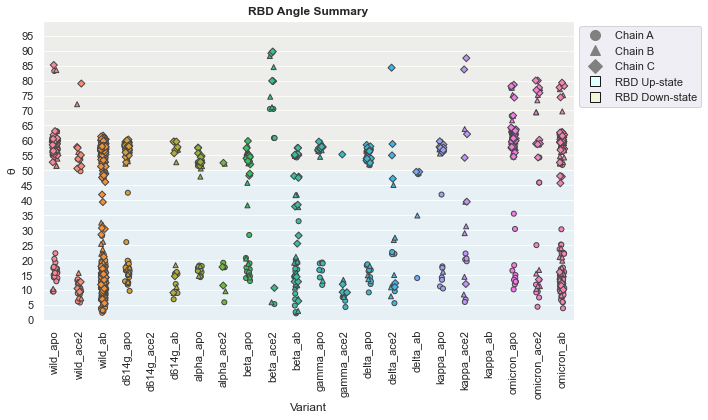

In [1]:
## TOOL3: Post-processing get_rbd_angles.py results. ##
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import pandas as pd
from datetime import datetime

### adjustable parameters ###
filename = "./20230326_RBDangle_analysis/20230331-222630_RBD_Angles.xlsx" # could be a dir.
rbd_up_down_cutoff = 50
up_color = "lightcyan"
down_color = "beige"
datatype = "svg"
HexaPro_lst = ['6xkl', '7chh', '7e9n', '7e9o', '7e9q', '7enf', '7epx', '7fae', '7faf', '7jzl', '7jzn', '7k4n', '7k90', '7kl9', '7kmk', '7kml', '7kxj', '7kxk', '7l3n', '7lrt', '7lxy', '7lxz', '7ly2', '7m6e', '7m6f', '7m6g', '7mjg', '7mjh', '7mjj', '7mjk', '7mkl', '7mm0', '7my3', '7n0g', '7n0h', '7n8h', '7n9e', '7ny5', '7p40', '7p7b', '7r40', '7r8m', '7r8n', '7r8o', '7ra8', '7rbv', '7rkv', '7rq6', '7ru1', '7ru2', '7ru3', '7ru5', '7s0c', '7s0d', '7s6i', '7s6j', '7s6k', '7s6l', '7sc1', '7sn3', '7swx', '7tat', '7tlc', '7tld', '7tpr', '7tyz', '7u0p', '7u0q', '7u0x', '7uap', '7uar', '7uhc', '7uz4', '7uz5', '7uz6', '7uz7', '7uz9', '7uza', '7v20', '7v23', '7xmx', '7xmz', '7ydy', '7ye5', '7ye9', '7yqu', '7zce', '8d0z', '8hc4', '7so9', '7sxr', '7sxs', '8dlt', '8dlw', '8dlx', '8dlz', '8dlo', '7sob', '7soe', '7tf3', '7t9j', '7t9k', '7tm0', '7upl', '7uz8', '7whi', '7whj', '7whk', '7wjy', '7woq', '7wor', '7wos', '7wou', '7wov', '7wrh', '7ws4', '7ws5', '7ws8', '7ws9', '7wwi', '7wwj', '7wz1', '7xco', '7xiy', '7xst', '8dm9', '8err', '8hc2', '8hc3', '8hc9', '8hca', '8hcb']
#############################

datetime = datetime.now().strftime('%Y%m%d-%H%M%S')
file = pd.ExcelFile(filename)
sheets = file.sheet_names

dfs = []
for sheet in sheets:
    A, B, C = [],[],[]
    df = pd.read_excel(filename, sheet_name = f'{sheet}', header = 0)
    for index, row in df.iterrows():
        angles = sorted(row[['[chainA]RBD angle','[chainB]RBD angle','[chainC]RBD angle']].tolist())
        # replace w/ sorted angles so that A represents the largest angle.
        A.append(angles[0])
        B.append(angles[1])
        C.append(angles[2])
    df['A'], df['B'], df['C'] = A, B, C
    df = df.drop(['[chainA]RBD angle','[chainB]RBD angle','[chainC]RBD angle'], axis = 1)
    
    # determine rbd status.
    df.loc[((df['A']>=rbd_up_down_cutoff) & (df['B']>=rbd_up_down_cutoff) & (df['C']>=rbd_up_down_cutoff)), 'rbd_status'] = 'all_down'
    df.loc[((df['A']<rbd_up_down_cutoff) & (df['B']>=rbd_up_down_cutoff) & (df['C']>=rbd_up_down_cutoff)), 'rbd_status'] = '1_up'
    df.loc[((df['A']<rbd_up_down_cutoff) & (df['B']<rbd_up_down_cutoff) & (df['C']>=rbd_up_down_cutoff)), 'rbd_status'] = '2_up'
    df.loc[((df['A']<rbd_up_down_cutoff) & (df['B']<rbd_up_down_cutoff) & (df['C']<rbd_up_down_cutoff)), 'rbd_status'] = '3_up'
    
    # add column "variant" to record the variant types.
    df["variant"] = sheet
    
    # add column "HexaPro" to mark the unique modificatin (yes/no).
    if len(HexaPro_lst) != 0:
        df["HexaPro"] = np.where(df["PDB codes"].isin(HexaPro_lst), "yes","no")
        
    dfs.append(df)

# vertically concat all dfs to get all_df.
all_df = pd.concat(dfs)
dfs = [all_df] + dfs
sheets = ["Summary"] + sheets
sheet_cnt = 0
with pd.ExcelWriter(f'./20230326_RBDangle_analysis/{datetime}_RBD_Angles_Summary.xlsx') as writer:
    for df in dfs:
        df.to_excel(writer, sheet_name = f'{sheets[sheet_cnt]}', index = False)
        sheet_cnt += 1
    
# strip plot to show angle distribution in each variant.
plt.figure(figsize=(10,6))
plt.clf()
# plt.figure(figsize=(15,8))
# sns.set_theme(style = 'whitegrid')
sns.set_theme()
    
a = sns.stripplot(x = 'variant', y = 'A', data = all_df, marker = 'o', linewidth = 1)
b = sns.stripplot(x = 'variant', y = 'B', data = all_df, marker = '^', linewidth = 1)
c = sns.stripplot(x = 'variant', y = 'C', data = all_df, marker = 'D', linewidth = 1)
c.set(xlabel='Variant', ylabel='θ', yticks=(np.arange(0, 100, 5)))
c.set_ylim([0, 100])
c.axhspan(ymin=0, ymax=rbd_up_down_cutoff, facecolor=up_color, alpha=0.3)
c.axhspan(ymin=rbd_up_down_cutoff+0.1, ymax=100, facecolor=down_color, alpha=0.3)
plt.xticks(rotation=90)

# cutomized legend
circle = mlines.Line2D([], [], color='gray', marker='o', linestyle='',
                      markersize=10, label='Chain A')
triangle = mlines.Line2D([], [], color='gray', marker='^', linestyle='',
                      markersize=10, label='Chain B')
diamond = mlines.Line2D([], [], color='gray', marker='D', linestyle='',
                      markersize=10, label='Chain C')
up_square = mlines.Line2D([], [], color=up_color, marker='s', linestyle='',
                      markersize=10, markeredgecolor='k', label='RBD Up-state')
down_square = mlines.Line2D([], [], color=down_color, marker='s', linestyle='',
                      markersize=10, markeredgecolor='k', label='RBD Down-state')
plt.legend(handles=[circle, triangle, diamond, up_square, down_square], bbox_to_anchor=(1,1), loc='upper left')

# plot title
plt.title(label = "RBD Angle Summary", weight = 'bold')
plt.tight_layout()
plt.savefig(f'./20230326_RBDangle_analysis/{datetime}_RBD_Angles_Summary.{datatype}', bbox_inches='tight')

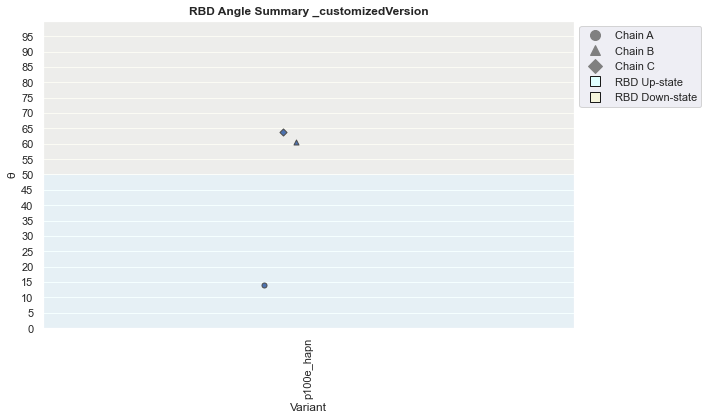

In [5]:
### INCLUDE CUSTOMIZED VERSION ###
## TOOL3: Post-processing get_rbd_angles.py results. ##
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import pandas as pd
from datetime import datetime

### adjustable parameters ###
filename = "./20230326_RBDangle_analysis/20230405-183630_RBD_Angles_customizedVersion.xlsx" # could be a dir.
customized_v = True
if customized_v:
    version_note = "_customizedVersion"
else:
    version_note = ""
rbd_up_down_cutoff = 50
up_color = "lightcyan"
down_color = "beige"
datatype = "svg"
HexaPro_lst = ['6xkl', '7chh', '7e9n', '7e9o', '7e9q', '7enf', '7epx', '7fae', '7faf', '7jzl', '7jzn', '7k4n', '7k90', '7kl9', '7kmk', '7kml', '7kxj', '7kxk', '7l3n', '7lrt', '7lxy', '7lxz', '7ly2', '7m6e', '7m6f', '7m6g', '7mjg', '7mjh', '7mjj', '7mjk', '7mkl', '7mm0', '7my3', '7n0g', '7n0h', '7n8h', '7n9e', '7ny5', '7p40', '7p7b', '7r40', '7r8m', '7r8n', '7r8o', '7ra8', '7rbv', '7rkv', '7rq6', '7ru1', '7ru2', '7ru3', '7ru5', '7s0c', '7s0d', '7s6i', '7s6j', '7s6k', '7s6l', '7sc1', '7sn3', '7swx', '7tat', '7tlc', '7tld', '7tpr', '7tyz', '7u0p', '7u0q', '7u0x', '7uap', '7uar', '7uhc', '7uz4', '7uz5', '7uz6', '7uz7', '7uz9', '7uza', '7v20', '7v23', '7xmx', '7xmz', '7ydy', '7ye5', '7ye9', '7yqu', '7zce', '8d0z', '8hc4', '7so9', '7sxr', '7sxs', '8dlt', '8dlw', '8dlx', '8dlz', '8dlo', '7sob', '7soe', '7tf3', '7t9j', '7t9k', '7tm0', '7upl', '7uz8', '7whi', '7whj', '7whk', '7wjy', '7woq', '7wor', '7wos', '7wou', '7wov', '7wrh', '7ws4', '7ws5', '7ws8', '7ws9', '7wwi', '7wwj', '7wz1', '7xco', '7xiy', '7xst', '8dm9', '8err', '8hc2', '8hc3', '8hc9', '8hca', '8hcb']
#############################

datetime = datetime.now().strftime('%Y%m%d-%H%M%S')
file = pd.ExcelFile(filename)
sheets = file.sheet_names

dfs = []
for sheet in sheets:
    A, B, C = [],[],[]
    df = pd.read_excel(filename, sheet_name = f'{sheet}', header = 0)
    for index, row in df.iterrows():
        angles = sorted(row[['[chainA]RBD angle','[chainB]RBD angle','[chainC]RBD angle']].tolist())
        # replace w/ sorted angles so that A represents the largest angle.
        A.append(angles[0])
        B.append(angles[1])
        C.append(angles[2])
    df['A'], df['B'], df['C'] = A, B, C
    df = df.drop(['[chainA]RBD angle','[chainB]RBD angle','[chainC]RBD angle'], axis = 1)
    
    # determine rbd status.
    df.loc[((df['A']>=rbd_up_down_cutoff) & (df['B']>=rbd_up_down_cutoff) & (df['C']>=rbd_up_down_cutoff)), 'rbd_status'] = 'all_down'
    df.loc[((df['A']<rbd_up_down_cutoff) & (df['B']>=rbd_up_down_cutoff) & (df['C']>=rbd_up_down_cutoff)), 'rbd_status'] = '1_up'
    df.loc[((df['A']<rbd_up_down_cutoff) & (df['B']<rbd_up_down_cutoff) & (df['C']>=rbd_up_down_cutoff)), 'rbd_status'] = '2_up'
    df.loc[((df['A']<rbd_up_down_cutoff) & (df['B']<rbd_up_down_cutoff) & (df['C']<rbd_up_down_cutoff)), 'rbd_status'] = '3_up'
    
    # add column "variant" to record the variant types.
    df["variant"] = sheet
    
    # add column "HexaPro" to mark the unique modificatin (yes/no).
    if len(HexaPro_lst) != 0:
        df["HexaPro"] = np.where(df["PDB codes"].isin(HexaPro_lst), "yes","no")
        
    dfs.append(df)

# vertically concat all dfs to get all_df.
all_df = pd.concat(dfs)
dfs = [all_df] + dfs
sheets = ["Summary"] + sheets
sheet_cnt = 0
with pd.ExcelWriter(f'./20230326_RBDangle_analysis/{datetime}_RBD_Angles_Summary{version_note}.xlsx') as writer:
    for df in dfs:
        df.to_excel(writer, sheet_name = f'{sheets[sheet_cnt]}', index = False)
        sheet_cnt += 1
    
# strip plot to show angle distribution in each variant.
plt.figure(figsize=(10,6))
plt.clf()
# plt.figure(figsize=(15,8))
# sns.set_theme(style = 'whitegrid')
sns.set_theme()
    
a = sns.stripplot(x = 'variant', y = 'A', data = all_df, marker = 'o', linewidth = 1)
b = sns.stripplot(x = 'variant', y = 'B', data = all_df, marker = '^', linewidth = 1)
c = sns.stripplot(x = 'variant', y = 'C', data = all_df, marker = 'D', linewidth = 1)
c.set(xlabel='Variant', ylabel='θ', yticks=(np.arange(0, 100, 5)))
c.set_ylim([0, 100])
c.axhspan(ymin=0, ymax=rbd_up_down_cutoff, facecolor=up_color, alpha=0.3)
c.axhspan(ymin=rbd_up_down_cutoff+0.1, ymax=100, facecolor=down_color, alpha=0.3)
plt.xticks(rotation=90)

# cutomized legend
circle = mlines.Line2D([], [], color='gray', marker='o', linestyle='',
                      markersize=10, label='Chain A')
triangle = mlines.Line2D([], [], color='gray', marker='^', linestyle='',
                      markersize=10, label='Chain B')
diamond = mlines.Line2D([], [], color='gray', marker='D', linestyle='',
                      markersize=10, label='Chain C')
up_square = mlines.Line2D([], [], color=up_color, marker='s', linestyle='',
                      markersize=10, markeredgecolor='k', label='RBD Up-state')
down_square = mlines.Line2D([], [], color=down_color, marker='s', linestyle='',
                      markersize=10, markeredgecolor='k', label='RBD Down-state')
plt.legend(handles=[circle, triangle, diamond, up_square, down_square], bbox_to_anchor=(1,1), loc='upper left')

# plot title
plt.title(label = f"RBD Angle Summary {version_note}", weight = 'bold')
plt.tight_layout()
plt.savefig(f'./20230326_RBDangle_analysis/{datetime}_RBD_Angles_Summary{version_note}.{datatype}', bbox_inches='tight')

,PDB codes,A,B,C,rbd_status,variant,HexaPro,state
1,6vxx,56.7,56.7,56.7,all_down,wild,no,apo
3,6x29,56.7,56.7,56.8,all_down,wild,no,apo
6,6x2c,55.3,55.3,55.3,all_down,wild,no,apo
7,6x6p,57.6,57.7,57.7,all_down,wild,no,apo
8,6x79,56.8,56.8,56.8,all_down,wild,no,apo
...,...,...,...,...,...,...,...,...
635,7xod,14.0,15.5,59.3,2_up,omicron,no,ab
636,7yqx,14.3,58.9,61.5,1_up,omicron,no,ab
637,7yqy,13.5,54.3,56.5,1_up,omicron,no,ab
638,7yqz,12.8,57.6,59.3,1_up,omicron,no,ab


<ipython-input-3-665377e543a6>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["rbd_status_hexapro"] = new_df["rbd_status"]+"_"+new_df["HexaPro"]


,variant,1 up (not HexaPro),1 up (HexaPro),2 up (not HexaPro),3 up (not HexaPro),all down (not HexaPro),all down (HexaPro)
0,alpha,0.583333,0.000000,0.250000,0.000000,0.166667,0.000000
1,beta,0.500000,0.000000,0.214286,0.142857,0.142857,0.000000
2,d614g,0.386364,0.068182,0.113636,0.000000,0.431818,0.000000
3,delta,0.300000,0.000000,0.150000,0.000000,0.550000,0.000000
4,gamma,0.714286,0.142857,0.142857,0.000000,0.000000,0.000000
5,kappa,0.666667,0.000000,0.111111,0.000000,0.222222,0.000000
6,omicron,0.384615,0.038462,0.000000,0.000000,0.538462,0.038462
7,wild,0.219512,0.048780,0.012195,0.000000,0.646341,0.073171


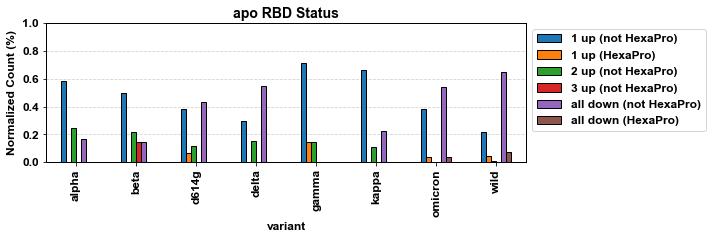

<ipython-input-3-665377e543a6>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["rbd_status_hexapro"] = new_df["rbd_status"]+"_"+new_df["HexaPro"]


,variant,1 up (not HexaPro),2 up (not HexaPro),3 up (not HexaPro),all down (not HexaPro)
0,alpha,0.333333,0.000000,0.666667,0.000000
1,beta,0.000000,0.000000,0.200000,0.800000
2,delta,0.000000,0.500000,0.500000,0.000000
3,gamma,0.000000,0.250000,0.750000,0.000000
4,kappa,0.166667,0.500000,0.333333,0.000000
5,omicron,0.363636,0.363636,0.090909,0.181818
6,wild,0.416667,0.333333,0.250000,0.000000


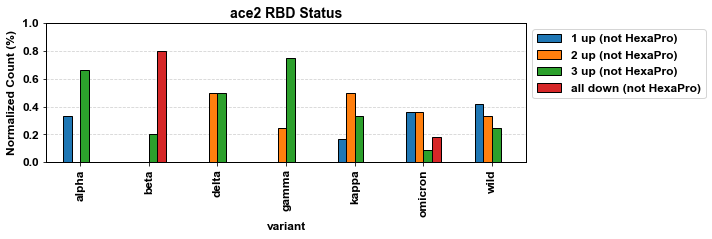

<ipython-input-3-665377e543a6>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["rbd_status_hexapro"] = new_df["rbd_status"]+"_"+new_df["HexaPro"]


,variant,1 up (not HexaPro),1 up (HexaPro),2 up (not HexaPro),2 up (HexaPro),3 up (not HexaPro),3 up (HexaPro),all down (not HexaPro),all down (HexaPro)
0,beta,0.058824,0.000000,0.176471,0.000000,0.647059,0.000000,0.117647,0.000000
1,d614g,0.500000,0.000000,0.125000,0.000000,0.250000,0.000000,0.125000,0.000000
2,delta,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
3,omicron,0.244444,0.266667,0.133333,0.088889,0.044444,0.111111,0.066667,0.044444
4,wild,0.205882,0.064706,0.141176,0.070588,0.217647,0.135294,0.123529,0.041176


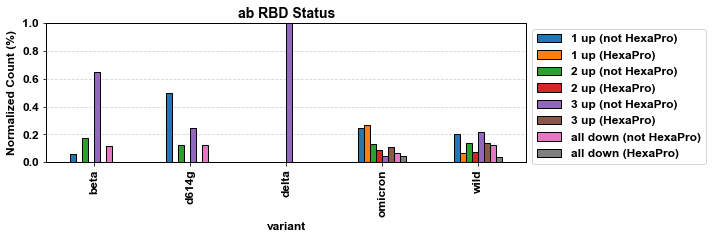

,HexaPro,1 up,2 up,3 up,all down
0,no,0.335766,0.160584,0.172749,0.330900
1,yes,0.347826,0.173913,0.304348,0.173913


,HexaPro,1 up,2 up,3 up,all down
0,no,0.383838,0.085859,0.010101,0.520202
1,yes,0.562500,0.000000,0.000000,0.437500


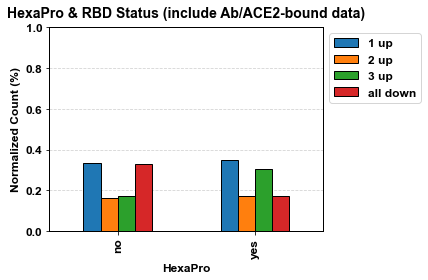

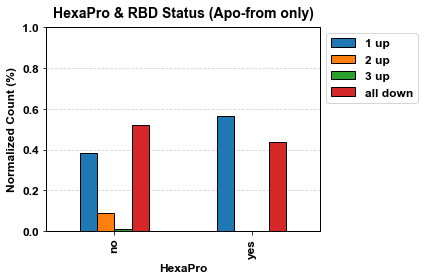

In [3]:
## TOOL4-1: Other Plottings (RBD_Angles_Summary post-processing). ##
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from datetime import datetime

### adjustable parameters ###
groups = ["apo","ace2","ab"]
filename = "./20230326_RBDangle_analysis/20230402-233616_RBD_Angles_Summary.xlsx" # could be a dir.
figW,figL = 10, 6.84*0.5
title_fontsize, xlabel_fontsize,ylabel_fontsize = 14,12,12
legend_fontsize = 12
labelpad = 5
xtick_fontsize,ytick_fontsize = 12,12
spineW = 1
datatype = "svg"
#############################

datetime = datetime.now().strftime('%Y%m%d-%H%M%S')
original_df = pd.read_excel(filename, sheet_name="Summary").dropna() # exclude entries with nan.
original_df[["variant","state"]] = original_df["variant"].str.split("_",expand=True)
display(original_df)
# iterate thru all groups.
dfs = []
for gp in groups:
    new_df = original_df.loc[original_df["state"]==gp]
    new_df["rbd_status_hexapro"] = new_df["rbd_status"]+"_"+new_df["HexaPro"]
#     display(new_df)
    df = new_df.groupby(["variant","rbd_status_hexapro"],sort=True).size().unstack(fill_value=0).reset_index()
    df["total"] = df.iloc[:,1:].sum(axis=1)
    norm_cols = df.iloc[:,1:-1].div(df.total, axis=0).rename(columns=lambda x: "norm."+x)
    norm_df = pd.concat([df["variant"],norm_cols], axis =1)
    norm_df = norm_df.rename(columns=lambda x: " ".join(x[5:].split("_")[:-1])+" (HexaPro)" if "norm" in x and "yes" in x else " ".join(x[5:].split("_")[:-1])+" (not HexaPro)" if "norm" in x and "no" in x else x)
    display(norm_df)
    dfs.append(norm_df)

    # formatting the plot.
    plt.figure(1, figsize = (figW,figL))
    plot_title = f"{gp} RBD Status"
    plt.title(label= plot_title, fontsize = title_fontsize, pad = 5, fontweight='bold')
    plt.xlabel('Variant',fontsize=xlabel_fontsize, labelpad=labelpad)
    plt.ylabel('Normalized Count (%)',fontsize=ylabel_fontsize, labelpad=labelpad)
    plt.xticks(fontsize=xtick_fontsize)
    plt.yticks(fontsize=ytick_fontsize)

    # get plot axes & plot to it.
    axes = plt.gca()
    norm_df.plot(ax = axes, x='variant',kind='bar',edgecolor='k', width=0.5, linestyle="-")

    # plotting range 
    axes.set_ylim([0,1])
    # axes & grid.
    for ax in ["top","right",'bottom','left']:
        axes.spines[ax].set_linewidth(spineW)
    axes.grid(color='lightgray', axis='y', linestyle='dashed')
    axes.set_axisbelow(True)

    #legend   
    params = {"font.weight":"bold", "axes.labelweight":"bold", 'axes.edgecolor':'black',"font.family":"Arial", 'legend.fontsize': legend_fontsize}
    plt.rcParams.update(params)
    plt.legend(bbox_to_anchor=(1,1), loc='upper left')

    plt.tight_layout()
    plt.savefig(f'{datetime}_{plot_title}.{datatype}', bbox_inches='tight')
    plt.show()

# analyze the HexaPro's effect on RBD status.
hexapro_influence_df = original_df.groupby(["HexaPro","rbd_status"]).size().unstack(fill_value=0).reset_index()
hexapro_influence_df["total"] = hexapro_influence_df.iloc[:,1:].sum(axis=1)
hexapro_influence_norm_cols = hexapro_influence_df.iloc[:,1:-1].div(hexapro_influence_df.total, axis=0).rename(columns=lambda x: "norm."+x)
hexapro_influence_norm_df = pd.concat([hexapro_influence_df["HexaPro"],hexapro_influence_norm_cols], axis =1)
hexapro_influence_norm_df = hexapro_influence_norm_df.rename(columns=lambda x: " ".join(x[5:].split("_")) if "norm" in x else x)
display(hexapro_influence_norm_df)

## do a Apo-form only version.
apo_hexapro_influence_df = original_df.loc[original_df["state"]=="apo"].groupby(["HexaPro","rbd_status"]).size().unstack(fill_value=0).reset_index()
apo_hexapro_influence_df["total"] = apo_hexapro_influence_df.iloc[:,1:].sum(axis=1)
apo_hexapro_influence_norm_cols = apo_hexapro_influence_df.iloc[:,1:-1].div(apo_hexapro_influence_df.total, axis=0).rename(columns=lambda x: "norm."+x)
apo_hexapro_influence_norm_df = pd.concat([apo_hexapro_influence_df["HexaPro"],apo_hexapro_influence_norm_cols], axis =1)
apo_hexapro_influence_norm_df = apo_hexapro_influence_norm_df.rename(columns=lambda x: " ".join(x[5:].split("_")) if "norm" in x else x)
display(apo_hexapro_influence_norm_df)

dfs = [hexapro_influence_norm_df,apo_hexapro_influence_norm_df] + dfs
groups = ["HexaPro Effect (all states)","HexaPro Effect (Apo)"] + groups

# formatting the plot (clean previous plot).
plt.clf()
plt.figure(1, figsize = (figW,figL))
plot_title = "HexaPro & RBD Status (include Ab/ACE2-bound data)"
plt.title(label= plot_title, fontsize = title_fontsize, pad = 10, fontweight='bold')
plt.xlabel('HexaPro',fontsize=xlabel_fontsize, labelpad=labelpad)
plt.ylabel('Normalized Count (%)',fontsize=ylabel_fontsize, labelpad=labelpad)
plt.xticks(fontsize=xtick_fontsize)
plt.yticks(fontsize=ytick_fontsize)

# get plot axes & plot to it.
axes = plt.gca()
hexapro_influence_norm_df.plot(ax = axes, x='HexaPro',kind='bar',edgecolor='k', width=0.5, linestyle="-")

# plotting range 
axes.set_ylim([0,1])
# axes & grid.
for ax in ["top","right",'bottom','left']:
    axes.spines[ax].set_linewidth(spineW)
axes.grid(color='lightgray', axis='y', linestyle='dashed')
axes.set_axisbelow(True)

#legend   
params = {"font.weight":"bold", "axes.labelweight":"bold", 'axes.edgecolor':'black',"font.family":"Arial", 'legend.fontsize': legend_fontsize}
plt.rcParams.update(params)
plt.legend(bbox_to_anchor=(1,1), loc='upper left')

plt.tight_layout()
plt.savefig(f'{datetime}_HexaPro_RBD_Status_Allstates.{datatype}', bbox_inches='tight')
plt.show()

plt.clf()
plt.figure(1, figsize = (figW,figL))
plot_title = "HexaPro & RBD Status (Apo-from only)"
plt.title(label= plot_title, fontsize = title_fontsize, pad = 10, fontweight='bold')
plt.xlabel('HexaPro',fontsize=xlabel_fontsize, labelpad=labelpad)
plt.ylabel('Normalized Count (%)',fontsize=ylabel_fontsize, labelpad=labelpad)
plt.xticks(fontsize=xtick_fontsize)
plt.yticks(fontsize=ytick_fontsize)

# get plot axes & plot to it.
axes = plt.gca()
apo_hexapro_influence_norm_df.plot(ax = axes, x='HexaPro',kind='bar',edgecolor='k', width=0.5, linestyle="-")

# plotting range 
axes.set_ylim([0,1])
# axes & grid.
for ax in ["top","right",'bottom','left']:
    axes.spines[ax].set_linewidth(spineW)
axes.grid(color='lightgray', axis='y', linestyle='dashed')
axes.set_axisbelow(True)

#legend   
params = {"font.weight":"bold", "axes.labelweight":"bold", 'axes.edgecolor':'black',"font.family":"Arial", 'legend.fontsize': legend_fontsize}
plt.rcParams.update(params)
plt.legend(bbox_to_anchor=(1,1), loc='upper left')

plt.tight_layout()
plt.savefig(f'{datetime}_HexaPro_RBD_Status_Apo-from_only.{datatype}', bbox_inches='tight')
plt.show()

g_cnt = 0
with pd.ExcelWriter(f"{datetime}_RBD_Status_Summary.xlsx") as writer:
    for df in dfs:
        df.to_excel(writer, sheet_name = f'{groups[g_cnt]}', index = False)
        g_cnt +=1

,PDB codes,A,B,C,rbd_status,variant,HexaPro,state
0,6xkl,13.4,56.1,56.7,(2)_1 Up,wild,yes,(1)_Apo
1,6xm0,19.2,57.9,59.3,(2)_1 Up,wild,no,(1)_Apo
2,6xm3,20.4,58.2,59.4,(2)_1 Up,wild,no,(1)_Apo
3,6xm4,15.2,57.9,59.0,(2)_1 Up,wild,no,(1)_Apo
4,6z97,17.7,57.1,59.4,(2)_1 Up,wild,no,(1)_Apo
...,...,...,...,...,...,...,...,...
633,7lws,52.6,52.6,52.8,(1)_All Down,alpha,no,(1)_Apo
634,7r13,51.5,51.6,51.6,(1)_All Down,alpha,no,(1)_Apo
636,7fem,19.1,52.2,52.5,(2)_1 Up,alpha,no,(2)_ACE2
637,7edj,5.9,9.6,11.5,(4)_3 Up,alpha,no,(2)_ACE2


rbd_status,state,total,(1)_All Down (normalized),(2)_1 Up (normalized),(3)_2 Up (normalized),(4)_3 Up (normalized)
0,(1)_Apo,214,0.514019,0.397196,0.079439,0.009346
1,(2)_ACE2,47,0.127660,0.234043,0.319149,0.319149
2,(3)_Ab,242,0.148760,0.305785,0.206612,0.338843


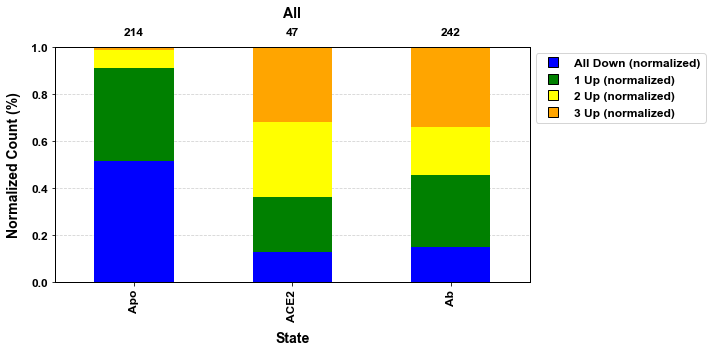

rbd_status,state,total,(1)_All Down (normalized),(2)_1 Up (normalized),(3)_2 Up (normalized),(4)_3 Up (normalized)
0,(1)_Apo,198,0.520202,0.383838,0.085859,0.010101
1,(2)_ACE2,47,0.127660,0.234043,0.319149,0.319149
2,(3)_Ab,166,0.162651,0.307229,0.204819,0.325301


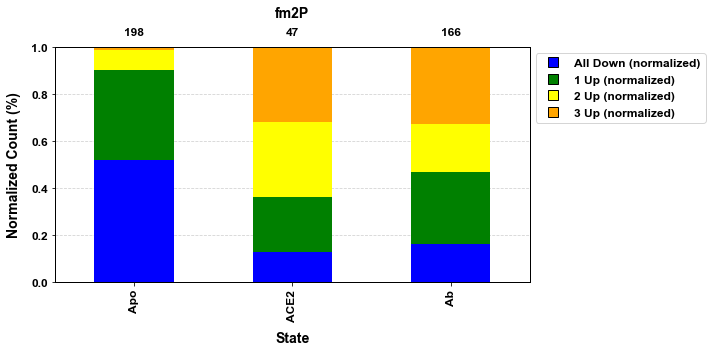

rbd_status,state,total,(1)_All Down (normalized),(2)_1 Up (normalized),(3)_2 Up (normalized),(4)_3 Up (normalized)
0,(1)_Apo,16,0.437500,0.562500,0.000000,0.000000
1,(2)_ACE2,0,0.000000,0.000000,0.000000,0.000000
2,(3)_Ab,76,0.118421,0.302632,0.210526,0.368421


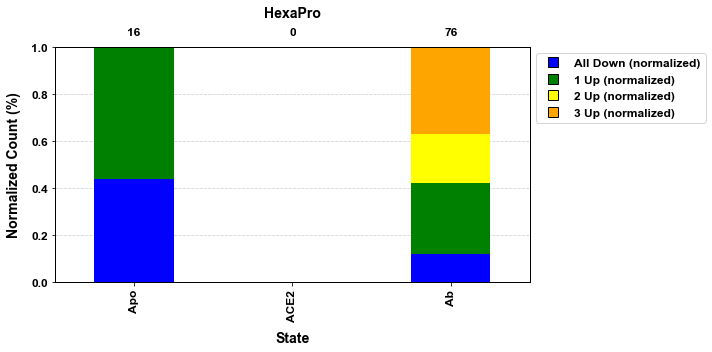

In [7]:
## TOOL4-2: Still Other Plottings (RBD_Angles_Summary post-processing). ##
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from datetime import datetime

### adjustable parameters ###
filename = "./20230326_RBDangle_analysis/20230402-233616_RBD_Angles_Summary.xlsx" # could be a dir.
figW,figL = 10, 10*0.5
title_fontsize, xlabel_fontsize,ylabel_fontsize, bar_num_fontsize = 14,14,14,12
legend_fontsize = 12
labelpad,title_pad,bar_num_pad = 10,30,0.05
xtick_fontsize,ytick_fontsize = 12,12
spineW = 1
datatype = "svg"
# rbd_status_types = ["(2)_1 Up (normalized)","2_up","3_up","(1)_All Down (normalized)"]
rbd_status_colors = ["blue","green","yellow","orange"]
# color_dict = dict(zip(rbd_status_types,rbd_status_colors))
bar_xind = [0,1,2] # for Apo/ACE2/Ab.
#############################

datetime = datetime.now().strftime('%Y%m%d-%H%M%S')
original_df = pd.read_excel(filename, sheet_name="Summary").dropna() # exclude entries with nan.
original_df[["variant","state"]] = original_df["variant"].str.split("_",expand=True)
# number state & rbd_status for later ordering in the plots.
original_df["state"] = original_df["state"].str.replace("apo","(1)_Apo")
original_df["state"] = original_df["state"].str.replace("ace2","(2)_ACE2")
original_df["state"] = original_df["state"].str.replace("ab","(3)_Ab")
original_df["rbd_status"] = original_df["rbd_status"].str.replace("all_down","(1)_All Down")
original_df["rbd_status"] = original_df["rbd_status"].str.replace("1_up","(2)_1 Up")
original_df["rbd_status"] = original_df["rbd_status"].str.replace("2_up","(3)_2 Up")
original_df["rbd_status"] = original_df["rbd_status"].str.replace("3_up","(4)_3 Up")
display(original_df)

# split data by all/fm2p (might include no mutations at all, here is just all-hexapro)/hexapro for 3 separate plots.
all_df = original_df
fm2p_df = original_df.loc[original_df["HexaPro"]=="no"]
hexapro_df = original_df.loc[original_df["HexaPro"]=="yes"]

# each group by state & rbd_status.
df_lst = [all_df,fm2p_df,hexapro_df]
plot_titles = ["All","fm2P","HexaPro"]
dfs = []
for df,title in zip(df_lst,plot_titles):
    gp_df = df.groupby(["state","rbd_status"],sort=True).size().unstack(fill_value=0).reset_index()
    gp_df["total"] = gp_df.iloc[:,1:].sum(axis=1)
    norm_cols = gp_df.iloc[:,1:-1].div(gp_df.total, axis=0).rename(columns=lambda x: x+" (normalized)")
    norm_gp_df = pd.concat([gp_df[["state","total"]],norm_cols], axis =1)
    
    # make sure all dfs have the same shape (write pseudodata for hexapro df) - note this is not a generalized method.
    if norm_gp_df.shape[0] != 3:
        # pseudo_df = pd.DataFrame({"state":["(2)_ACE2"],"total":[0],"(1)_All Down (normalized)":[0],"(2)_1 Up (normalized)":[0],"(3)_2 Up (normalized)":[0],"(4)_3 Up (normalized)":[0]})
        norm_gp_df.loc[-1] = ["(2)_ACE2",0,0,0,0,0]
        norm_gp_df = norm_gp_df.sort_values(by=["state"]).reset_index(drop=True)
    display(norm_gp_df)
    dfs.append(norm_gp_df)
    # stacked grouped barplots.
    ## creating new figure.
    plt.figure(1, figsize = (figW,figL))
#     plt.title(label= title, fontsize = title_fontsize, pad = title_pad, fontweight='bold')
#     plt.xlabel('State',fontsize=xlabel_fontsize, labelpad=labelpad)
#     plt.ylabel('Normalized Count (%)',fontsize=ylabel_fontsize, labelpad=labelpad)
#     plt.xticks(bar_xind, ["Apo","ACE2","Ab"], fontsize=xtick_fontsize)
#     plt.yticks(fontsize=ytick_fontsize)

    ## get plot axes & plot to it.
    axes = plt.gca()
    total_lst = norm_gp_df["total"].tolist()
    norm_gp_df.loc[:,norm_gp_df.columns!="total"].plot(ax = axes, x='state',kind='bar',stacked=True, width=0.5, linestyle="-",color=rbd_status_colors,legend=None)
    
    ## formatting fig.
    plt.title(label= title, fontsize = title_fontsize, pad = title_pad, fontweight='bold')
    plt.xlabel('State',fontsize=xlabel_fontsize, labelpad=labelpad)
    plt.ylabel('Normalized Count (%)',fontsize=ylabel_fontsize, labelpad=labelpad)
    plt.xticks(bar_xind, ["Apo","ACE2","Ab"], fontsize=xtick_fontsize)
    plt.yticks(fontsize=ytick_fontsize)
    
    ## plotting range 
    axes.set_ylim([0,1])
    
    ## add total number above the bars.
    for ind,txt in zip(bar_xind,total_lst):
        plt.text(x=ind,y=1+bar_num_pad,s=f"{txt}",fontsize=bar_num_fontsize,horizontalalignment='center',fontweight='bold')
    
    ## rename x-axis labels.
    
    ## axes & grid.
    for ax in ["top","right",'bottom','left']:
        axes.spines[ax].set_linewidth(spineW)
    axes.grid(color='lightgray', axis='y', linestyle='dashed')
    axes.set_axisbelow(True)

    # cutomized legend
    alldown_square = mlines.Line2D([], [], color="blue", marker='s', linestyle='',
                          markersize=10, markeredgecolor='k', label='All Down (normalized)')
    up1_square = mlines.Line2D([], [], color="green", marker='s', linestyle='',
                          markersize=10, markeredgecolor='k', label='1 Up (normalized)')
    up2_square = mlines.Line2D([], [], color="yellow", marker='s', linestyle='',
                          markersize=10, markeredgecolor='k', label='2 Up (normalized)')
    up3_square = mlines.Line2D([], [], color="orange", marker='s', linestyle='',
                          markersize=10, markeredgecolor='k', label='3 Up (normalized)')
    plt.legend(handles=[alldown_square, up1_square, up2_square, up3_square], bbox_to_anchor=(1,1), loc='upper left')
    
    params = {"font.weight":"bold", "axes.labelweight":"bold", 'axes.edgecolor':'black',"font.family":"Arial", 'legend.fontsize': legend_fontsize}
    plt.rcParams.update(params)

    plt.tight_layout()
    plt.savefig(f'{datetime}_{title}_RBD_Status_Summary_v2.{datatype}', bbox_inches='tight')
    plt.show()
    
cnt = 0
with pd.ExcelWriter(f"{datetime}_RBD_Status_Summary_v2.xlsx") as writer:
    for df in dfs:
        df.to_excel(writer, sheet_name = f'{plot_titles[cnt]}', index = False)
        cnt +=1

In [9]:
## TOOL5: Annotate PDB source (e.g. from specific lab member)
import numpy as np
import pandas as pd
import os

#### adjustable parameters ####
annotate_jing_dt = False
customize_state = True # make sure that the final file contatins all the "state" columns necessary for later analyses.
user_name = "yuxi"
user_defined_states = ["hapn"] # here make sure one sheet in the other_file only contains one state (should be according to the codes). #thus, the length of the sheets should be the same as that of the state.
user_defined_variants = ["p100e"]
###############################

# file to update source to (will save as another "_withSource" file).
update_file = "./20230326_RBDangle_analysis/20230402-233616_RBD_Angles_Summary.xlsx"

if annotate_jing_dt:
    # extract Jing's data from 2022.
    filename = "./2022_RBDangle_analysis/20220308_VariantRBDSummaryWithSource.xlsx"
    jing_apo_df = pd.read_excel(filename, sheet_name="Jing_apo_form_pdb")
    jing_ace2_df = pd.read_excel(filename, sheet_name="Jing_ace2_bound_pdb")
    jing_ab_df = pd.read_excel(filename, sheet_name="Jing_Ab_bound_pdb")
    jing_apo_pdb = jing_apo_df["PDB codes"].tolist()
    jing_ace2_pdb = jing_ace2_df["PDB codes"].tolist()
    jing_ab_pdb = jing_ab_df["PDB codes"].tolist()
    jing_pdb = jing_apo_pdb+jing_ace2_pdb+jing_ab_pdb

#### adjustable parameters ####
# data from other lab members.
other_file = "./20230326_RBDangle_analysis/20230405-213631_RBD_Angles_Summary_customizedVersion.xlsx"
sheet_to_include = ["p100e_hapn"]
user_defined_sources = ["yuxi_hapn_p100e"] # format: lab member name_state_variant
###############################

# update file
df = pd.read_excel(update_file, sheet_name = "Summary")
df[["variant","state"]] = df["variant"].str.split("_",expand=True)
if annotate_jing_dt:
    df["source"] = np.where(df["PDB codes"].isin(jing_pdb), "jing","")
    df.loc[(df["source"]=="jing"),"source"] = df.loc[(df["source"]=="jing"),"source"]+"_"+df["state"]+"_"+df["variant"]
else:
    df["source"] = ""
if len(other_file) != 0: # concat the added data.
    other_dfs = []
    if len(sheet_to_include) != 0:
        for i in range(len(sheet_to_include)):
            each_df = pd.read_excel(other_file, sheet_name=sheet_to_include[i])
            if customize_state:
                each_df["state"] = user_defined_states[i]
            else: # default to use the suffix of the sheet name as the state.
                each_df["state"] = sheet_to_include[i].split("_")[-1]
            # add "source" column for later analyses.
            if len(user_defined_sources) != 0:
                each_df["source"] = user_defined_sources[i]
            else:
                each_df["source"] = user_name+"_"+user_defined_states[i]+"_"+user_defined_variants[i] 
            other_dfs.append(each_df)
    
# display(df)

# separate apo/ace2/ab into 3 dif. sheets for later polar projection plotting.
## adjustable if there are other receptors.
apo_df = df.loc[df["state"]=="apo"]
ace2_df = df.loc[df["state"]=="ace2"]
ab_df = df.loc[df["state"]=="ab"]
sheets = ['apo_form_pdb','ace2_bound_pdb','Ab_bound_pdb']
dfs = [apo_df,ace2_df,ab_df]

if len(other_file) != 0:
    sheets += sheet_to_include
    dfs += other_dfs

filebase = os.path.basename(update_file)

if len(other_file) != 0:
    version_note = "_customizedVersion"
else:
    version_note = ""
s_cnt = 0
with pd.ExcelWriter(f"{filebase.split('.')[0]}_withSource{version_note}.xlsx") as writer:
    for df in dfs:
        df.to_excel(writer, sheet_name = f'{sheets[s_cnt]}', index = False)
        s_cnt+=1

<ipython-input-3-b8fea3c6a6c2>:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_chA['90-A'] = 90 - df_chA['A']
<ipython-input-3-b8fea3c6a6c2>:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_chB['90-B'] = 90 - df_chB['B']
<ipython-input-3-b8fea3c6a6c2>:94: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

<ipython-input-3-b8fea3c6a6c2>:392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jing_chA['binned_angle'] = pd.cut(jing_chA['90-A'], bins)
<ipython-input-3-b8fea3c6a6c2>:393: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jing_chA['f'] = jing_chA.groupby(['variant', 'binned_angle'])['binned_angle'].transform('size')
<ipython-input-3-b8fea3c6a6c2>:394: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

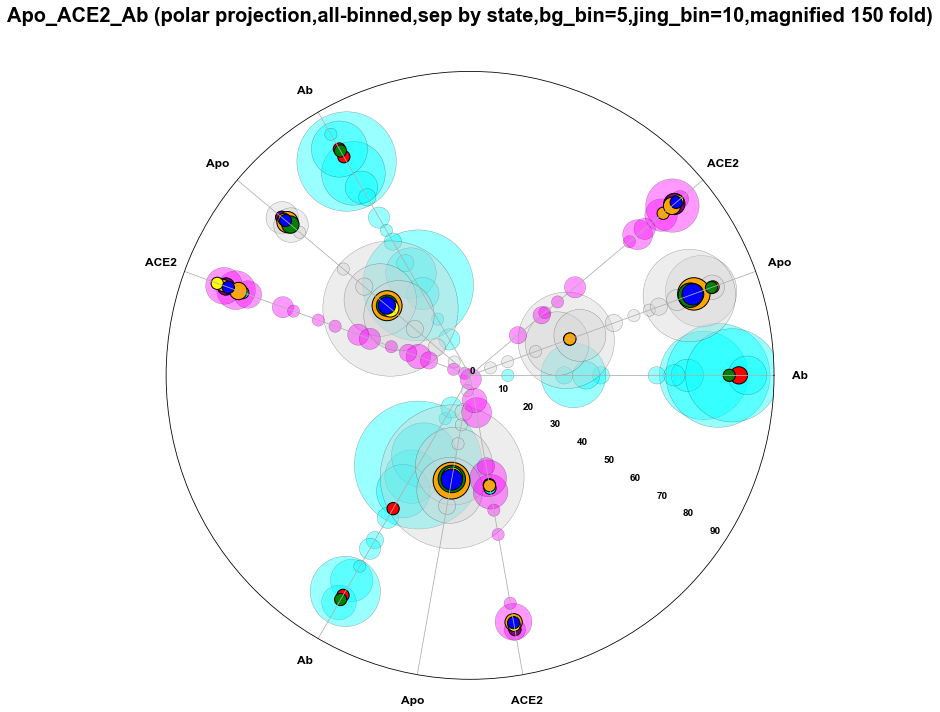

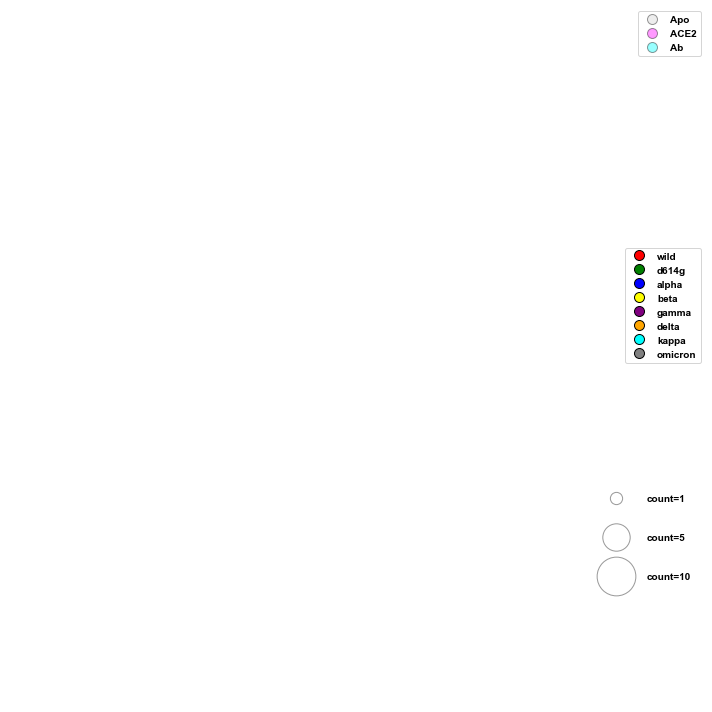

In [3]:
## TOOL6: Final Projection Plotting. ##
## Note that Jing's data here can be replaced by other members' data (use TOOL5 to incorporate customized data, alse the RBD angles can be calculated separately using TOOL7).
## Consider the possibility of other spike receptors & variant types.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.patheffects as pe
from matplotlib.ticker import AutoMinorLocator
from datetime import datetime

######## some paramaters ######## 
output_format = 'svg'
source = "jing" # name of the lab member to compare his/her data to the background data.
bin_jing_dt = True # default to True.
plot_jing_dt = True # plot for apo-only.
sep_by_variant = False # separate dif variants by 10 degrees. If False, separate by status (apo/ace2/ab).
bg_bin_number, jing_bin_number = 5, 10
magnify_factor = 150 # magnify the binned circles.
jing_unbinned_mkrsize = 200 # real size of jing's unbinned circles.
bg_alpha = 0.4
jing_alpha = 1
bg_linewidth = 0.4 # linewidth of the background circles.
jing_linewidth = 1 # linewidth of the jing's circles.
edgecolor = 'k' # edgecolor of the circles.
grid_thickness = 1
figL,figW = 10,10
file = './20230326_RBDangle_analysis/20230402-233616_RBD_Angles_Summary_withSource.xlsx'
status = 'Apo_ACE2_Ab'
sheets = ['Ab_bound_pdb', 'Apo_form_pdb', 'ACE2_bound_pdb'] # the order is changed to avoid the overlapping (each corresponds to a layer of plot).
bg_status_c = {'Apo':'lightgray', 'ACE2':'magenta', 'Ab':'cyan'}
variant_c = {'A:wild':'red','B:d614g':'green','C:alpha':'blue','D:beta':'yellow','E:gamma':'purple','F:delta':'orange','G:kappa':'cyan','H:omicron':'grey'}
scale_counts = [1, 5, 10]
scales = [(magnify_factor*scale_counts[0])**0.5, (magnify_factor*scale_counts[1])**0.5, (magnify_factor*scale_counts[2])**0.5]
#################################

######## basic settings for polar plot ########
fig = plt.figure(figsize=(figL,figW))
ax = fig.add_subplot(111, projection='polar')
params = {"font.weight":"bold", "axes.labelweight":"bold", "font.family":"Arial"}
plt.rcParams.update(params)
ax.set_xticks(np.pi/180. *np.linspace(0,  360, 36, endpoint=False)) # draw xticks per 10 degrees.
ax.set_yticks(np.arange(0, 95, 10))
ax.yaxis.set_tick_params(labelsize = 10) 
ax.set_theta_zero_location('E')
ax.set_rlim(0, 95, 1)

# customize the xtick positions & labels.
xticklabelpad = 15
xtick_fontsize = 12
ax.tick_params(axis='x', pad=xticklabelpad)
if sep_by_variant:
    all_phi = [np.deg2rad(0+10*i) for i in range(len(variant_c))]+[np.deg2rad(120+10*i) for i in range(len(variant_c))]+[np.deg2rad(240+10*i) for i in range(len(variant_c))]
    plt.xticks(all_phi,[k.split(":")[1] for k in variant_c.keys()]*3,fontsize=xtick_fontsize)
else:
    all_phi = [np.deg2rad(0+20*i) for i in range(len(sheets))]+[np.deg2rad(120+20*i) for i in range(len(sheets))]+[np.deg2rad(240+20*i) for i in range(len(sheets))]
    plt.xticks(all_phi,[s.split("_")[0] for s in sheets]*3,fontsize=xtick_fontsize)

# move away the ryticks
ax.set_rlabel_position(-33.75)
# ax.set_xticklabels([])
# relabel the y axis.
# ax.grid(True)
ax.yaxis.grid(False)
ax.xaxis.grid(True)
# ax.yaxis.set_minor_locator(AutoMinorLocator(2))
# ax.grid(linewidth=grid_thickness, which='both') # optimize the thickness of both major & minor grids.
leg1_xpos,leg2_xpos,leg2_ypos = 1,1,0.75
borderpad = 1
labelspacing = 3
handletextpad = 2
leg2_frame = False
################################################

datetime = datetime.now().strftime('%Y%m%d-%H%M%S')
save_df_chA, save_df_chB, save_df_chC = [],[],[]
status_cnt = 0
for sheet in sheets:
    # add pdb data.
    df = pd.read_excel(file, sheet_name = sheet, header = 0).dropna(subset=["A","B","C"]).fillna('other')
    # display(df)
    # rename variant to adapt to the alpherical order.
    df = df.replace({'variant' : {'wild':'A:wild', 'd614g':'B:d614g', 'alpha':'C:alpha', 'beta':'D:beta', 'gamma':'E:gamma', 'delta':'F:delta', 'kappa':'G:kappa', 'omicron':'H:omicron'}})
    df_chA = df[['variant', 'PDB codes', 'A', 'rbd_status', 'source']]
    df_chB = df[['variant', 'PDB codes', 'B', 'rbd_status', 'source']]
    df_chC = df[['variant', 'PDB codes', 'C', 'rbd_status', 'source']]

    # (90 - theta) to get the angle from plane to rbd (original calculation is the angle between the rbd and normal vector).
    df_chA['90-A'] = 90 - df_chA['A']
    df_chB['90-B'] = 90 - df_chB['B']
    df_chC['90-C'] = 90 - df_chC['C']
    
    if sep_by_variant:
        # calculate phi to separate dif. variants (remember to fix the relationship between the phi angles & variant types).
        chA_phis = [0+10*i for i in range(len(variant_c))]
        chB_phis = [120+10*i for i in range(len(variant_c))]
        chC_phis = [240+10*i for i in range(len(variant_c))]
        variants = [k for k in variant_c.keys()]
        chA_var_phi_dict,chB_var_phi_dict,chC_var_phi_dict = dict(zip(variants,chA_phis)),dict(zip(variants,chB_phis)),dict(zip(variants,chC_phis))
        
        # write the phi angles based on the dictionaries & convert the angles into radians.
        ## chain A
        for k,v in chA_var_phi_dict.items():
            df_chA.loc[(df_chA['variant']==k), 'phi'] = np.deg2rad(v)
        ## chain B
        for k,v in chB_var_phi_dict.items():
            df_chB.loc[(df_chB['variant']==k), 'phi'] = np.deg2rad(v)
        ## chain C
        for k,v in chC_var_phi_dict.items():
            df_chC.loc[(df_chC['variant']==k), 'phi'] = np.deg2rad(v)
#         # calculate phi to separate dif. variants.
#         # chain A
#         chA_variants = sorted(list(set(df_chA['variant'])))
#         var_cnt = 0
#         for i in range(len(chA_variants)):
#             df_chA.loc[(df_chA['variant']==chA_variants[var_cnt]), 'phi'] = 0 + 10*i
#             var_cnt += 1
#         # chain B
#         chB_variants = sorted(list(set(df_chB['variant'])))
#         var_cnt = 0
#         for i in range(len(chB_variants)):
#             df_chB.loc[(df_chB['variant']==chB_variants[var_cnt]), 'phi'] = 120 + 10*i
#             var_cnt += 1
#         # chain C
#         chC_variants = sorted(list(set(df_chC['variant'])))
#         var_cnt = 0
#         for i in range(len(chC_variants)):
#             df_chC.loc[(df_chC['variant']==chC_variants[var_cnt]), 'phi'] = 240 + 10*i
#             var_cnt += 1

#         # convert degrees into radians for radial x-axis.
#         df_chA[['phi']] = np.deg2rad(df_chA[['phi']])
#         df_chB[['phi']] = np.deg2rad(df_chB[['phi']])
#         df_chC[['phi']] = np.deg2rad(df_chC[['phi']])

        # translate the data into spherical coords.
        thetaA = df_chA['90-A']
        thetaB = df_chB['90-B']
        thetaC = df_chC['90-C']
        phiA = df_chA['phi']
        phiB = df_chB['phi']
        phiC = df_chC['phi']
        
        # for polar plot xtick positioning.
        # each_all_phi = sorted(list(set(phiA.tolist())))+sorted(list(set(phiB.tolist())))+sorted(list(set(phiC.tolist())))
        # each_all_phi_labels = [v.split(":")[1] for v in chA_variants]+[v.split(":")[1] for v in chB_variants]+[v.split(":")[1] for v in chC_variants]
        # all_phi+=each_all_phi
        
        ## BACKGROUND DATA
        # bin the data to plot like bubble plot ("f" for "frequency" meaning "size").
        bins = np.arange(0, 95, bg_bin_number)
        df_chA['binned_angle'] = pd.cut(df_chA['90-A'], bins)
        df_chA['f'] = df_chA.groupby(['variant', 'binned_angle'])['binned_angle'].transform('size')
        df_chB['binned_angle'] = pd.cut(df_chB['90-B'], bins)
        df_chB['f'] = df_chB.groupby(['variant', 'binned_angle'])['binned_angle'].transform('size')
        df_chC['binned_angle'] = pd.cut(df_chC['90-C'], bins)
        df_chC['f'] = df_chC.groupby(['variant', 'binned_angle'])['binned_angle'].transform('size')

        # get avg within bin.
        df_chA['90-A(avg)'] = df_chA.groupby(['variant', 'binned_angle'])['90-A'].transform('mean')
        df_chB['90-B(avg)'] = df_chB.groupby(['variant', 'binned_angle'])['90-B'].transform('mean')
        df_chC['90-C(avg)'] = df_chC.groupby(['variant', 'binned_angle'])['90-C'].transform('mean')

        # save df first for Jing's analysis.
        save_df_chA.append(df_chA)
        save_df_chB.append(df_chB)
        save_df_chC.append(df_chC)

        binnned_chA_all = df_chA[['phi', '90-A(avg)', 'f']].drop_duplicates().reset_index(drop=True)
        binnned_chB_all = df_chB[['phi', '90-B(avg)', 'f']].drop_duplicates().reset_index(drop=True)
        binnned_chC_all = df_chC[['phi', '90-C(avg)', 'f']].drop_duplicates().reset_index(drop=True)

        # get angles & freq.
        bg_thetaA = binnned_chA_all['90-A(avg)']
        bg_thetaB = binnned_chB_all['90-B(avg)']
        bg_thetaC = binnned_chC_all['90-C(avg)']
        bg_phiA = binnned_chA_all['phi']
        bg_phiB = binnned_chB_all['phi']
        bg_phiC = binnned_chC_all['phi']
        f_A = binnned_chA_all['f']
        f_B = binnned_chB_all['f']
        f_C = binnned_chC_all['f']

        # layer up the projected scatter plots.
        ax.scatter(bg_phiA, bg_thetaA, c=bg_status_c[sheet.split('_')[0]], s=f_A*magnify_factor, alpha=bg_alpha, edgecolors = edgecolor, linewidth = bg_linewidth)
        ax.scatter(bg_phiB, bg_thetaB, c=bg_status_c[sheet.split('_')[0]], s=f_B*magnify_factor, alpha=bg_alpha, edgecolors = edgecolor, linewidth = bg_linewidth)
        ax.scatter(bg_phiC, bg_thetaC, c=bg_status_c[sheet.split('_')[0]], s=f_C*magnify_factor, alpha=bg_alpha, edgecolors = edgecolor, linewidth = bg_linewidth)
        
#         # deal with the azimuth tick positions & labels.
#         plt.xticks(all_phi,all_phi_labels,fontsize=xtick_fontsize)
#         ax.tick_params(axis='x', pad=xticklabelpad)  # move the tick labels
        
        # plot title
        plt.title(label = f"{status} (polar projection,binned-bg,sep by variant,bg_bin={bg_bin_number},magnified {magnify_factor} fold)", weight = 'bold', fontsize = 20, pad = 50)

#         # cutomized legend
#         mkrs = []
#         for var, c in bg_status_c.items():
#             mkr = mlines.Line2D([], [], color=c, marker='o', linewidth=0,
#                                   markersize=10, label=var, alpha=bg_alpha, markeredgecolor=edgecolor)
#             mkrs.append(mkr)
#         leg1 = plt.legend(handles=mkrs, bbox_to_anchor=(leg1_xpos,1), loc='upper left')
#         plt.gca().add_artist(leg1)
        
#         # scale bars to show the freq represented by the circles.
#         scalebars = []
#         f_cnt = 0
#         for s in scales:
#             scalebar = mlines.Line2D([], [], color='white', marker='o', linewidth=0,
#                                   markersize=s, label=f'count={scale_counts[f_cnt]}', alpha=bg_alpha, markeredgecolor=edgecolor)
#             scalebars.append(scalebar)
#             f_cnt += 1
#         plt.legend(handles=scalebars, bbox_to_anchor=(leg2_xpos,leg2_ypos), loc='upper left', borderpad = borderpad, labelspacing = labelspacing, handletextpad = handletextpad, frameon = leg2_frame)

        plt.tight_layout()
        plt.savefig(f"{datetime}_{status} (polar projection,binned-bg,sep by variant,bg_bin={bg_bin_number},magnified {magnify_factor} fold).{output_format}", bbox_inches='tight')
    else: # sep by status (apo/ace2/ab)
        # assign phi to separate dif. status.
        # chain A
        df_chA['phi'] = np.deg2rad(0 + 20*status_cnt)
        # chain B
        df_chB['phi'] = np.deg2rad(120 + 20*status_cnt)
        # chain C
        df_chC['phi'] = np.deg2rad(240 + 20*status_cnt)
        
        status_cnt+=1 # iterate to next status

        # translate the data into spherical coords.
        thetaA = df_chA['90-A']
        thetaB = df_chB['90-B']
        thetaC = df_chC['90-C']
        phiA = df_chA['phi']
        phiB = df_chB['phi']
        phiC = df_chC['phi']
        
        # for polar plot xtick positioning.
        # each_all_phi = sorted(list(set(phiA.tolist())))+sorted(list(set(phiB.tolist())))+sorted(list(set(phiC.tolist())))
        # each_all_phi_labels = [i.split("_")[0] for i in sheets]
        # all_phi+=each_all_phi
        
        ## BACKGROUND DATA
        # bin the data to plot like bubble plot.
        bins = np.arange(0, 95, bg_bin_number)
        df_chA['binned_angle'] = pd.cut(df_chA['90-A'], bins)
        df_chA['f'] = df_chA.groupby(['binned_angle'])['binned_angle'].transform('size')
        df_chB['binned_angle'] = pd.cut(df_chB['90-B'], bins)
        df_chB['f'] = df_chB.groupby(['binned_angle'])['binned_angle'].transform('size')
        df_chC['binned_angle'] = pd.cut(df_chC['90-C'], bins)
        df_chC['f'] = df_chC.groupby(['binned_angle'])['binned_angle'].transform('size')

        # get avg within bin.
        df_chA['90-A(avg)'] = df_chA.groupby(['binned_angle'])['90-A'].transform('mean')
        df_chB['90-B(avg)'] = df_chB.groupby(['binned_angle'])['90-B'].transform('mean')
        df_chC['90-C(avg)'] = df_chC.groupby(['binned_angle'])['90-C'].transform('mean')

        # save df first for Jing's analysis.
        save_df_chA.append(df_chA)
        save_df_chB.append(df_chB)
        save_df_chC.append(df_chC)

        binnned_chA_all = df_chA[['phi', '90-A(avg)', 'f']].drop_duplicates().reset_index(drop=True)
        binnned_chB_all = df_chB[['phi', '90-B(avg)', 'f']].drop_duplicates().reset_index(drop=True)
        binnned_chC_all = df_chC[['phi', '90-C(avg)', 'f']].drop_duplicates().reset_index(drop=True)

        # get angles & freq.
        bg_thetaA = binnned_chA_all['90-A(avg)']
        bg_thetaB = binnned_chB_all['90-B(avg)']
        bg_thetaC = binnned_chC_all['90-C(avg)']
        bg_phiA = binnned_chA_all['phi']
        bg_phiB = binnned_chB_all['phi']
        bg_phiC = binnned_chC_all['phi']
        f_A = binnned_chA_all['f']
        f_B = binnned_chB_all['f']
        f_C = binnned_chC_all['f']

        ax.scatter(bg_phiA, bg_thetaA, c=bg_status_c[sheet.split('_')[0]], s=f_A*magnify_factor, alpha=bg_alpha, edgecolors = edgecolor, linewidth = bg_linewidth)
        ax.scatter(bg_phiB, bg_thetaB, c=bg_status_c[sheet.split('_')[0]], s=f_B*magnify_factor, alpha=bg_alpha, edgecolors = edgecolor, linewidth = bg_linewidth)
        ax.scatter(bg_phiC, bg_thetaC, c=bg_status_c[sheet.split('_')[0]], s=f_C*magnify_factor, alpha=bg_alpha, edgecolors = edgecolor, linewidth = bg_linewidth)
        
#         # deal with the azimuth tick positions & labels.
#         plt.xticks(all_phi,all_phi_labels,fontsize=xtick_fontsize)
#         ax.tick_params(axis='x', pad=xticklabelpad)  # move the tick labels
        
        # plot title
        plt.title(label = f"{status} (polar projection,binned-bg,sep by state,bg_bin={bg_bin_number},magnified {magnify_factor} fold)", weight = 'bold', fontsize = 20, pad = 50)

#         # cutomized legend
#         mkrs = []
#         for var, c in bg_status_c.items():
#             mkr = mlines.Line2D([], [], color=c, marker='o', linewidth=0,
#                                   markersize=10, label=var, alpha=bg_alpha, markeredgecolor=edgecolor)
#             mkrs.append(mkr)
#         leg1 = plt.legend(handles=mkrs, bbox_to_anchor=(leg1_xpos,1), loc='upper left')
#         plt.gca().add_artist(leg1)
        
#         # scale bars to show the freq represented by the circles.
#         scalebars = []
#         f_cnt = 0
#         for s in scales:
#             scalebar = mlines.Line2D([], [], color='white', marker='o', linewidth=0,
#                                   markersize=s, label=f'count={scale_counts[f_cnt]}', alpha=bg_alpha, markeredgecolor=edgecolor)
#             scalebars.append(scalebar)
#             f_cnt += 1
#         plt.legend(handles=scalebars, bbox_to_anchor=(leg2_xpos,leg2_ypos), loc='upper left', borderpad = borderpad, labelspacing = labelspacing, handletextpad = handletextpad, frameon = leg2_frame)
        
        plt.tight_layout()
        plt.savefig(f"{datetime}_{status} (polar projection,binned-bg,sep by state,bg_bin={bg_bin_number},magnified {magnify_factor} fold).{output_format}", bbox_inches='tight')

if plot_jing_dt:
    for i in range(len(save_df_chA)):
        df_chA, df_chB, df_chC = save_df_chA[i], save_df_chB[i], save_df_chC[i] 
        ## JING'S DATA 
        # chain A
        jing_chA = df_chA.loc[(df_chA['source']!='other')]
        # # chain B
        jing_chB = df_chB.loc[(df_chB['source']!='other')]
        # # chain C
        jing_chC = df_chC.loc[(df_chC['source']!='other')]

        if bin_jing_dt:
            bins = np.arange(0, 95, jing_bin_number)
            if sep_by_variant:
                # re-bin the data to plot like bubble plot.
                jing_chA['binned_angle'] = pd.cut(jing_chA['90-A'], bins)
                jing_chA['f'] = jing_chA.groupby(['variant', 'binned_angle'])['binned_angle'].transform('size')
                jing_chB['binned_angle'] = pd.cut(jing_chB['90-B'], bins)
                jing_chB['f'] = jing_chB.groupby(['variant', 'binned_angle'])['binned_angle'].transform('size')
                jing_chC['binned_angle'] = pd.cut(jing_chC['90-C'], bins)
                jing_chC['f'] = jing_chC.groupby(['variant', 'binned_angle'])['binned_angle'].transform('size')

                # re-calculate avg within bin.
                jing_chA['90-A(avg)'] = jing_chA.groupby(['variant', 'binned_angle'])['90-A'].transform('mean')
                jing_chB['90-B(avg)'] = jing_chB.groupby(['variant', 'binned_angle'])['90-B'].transform('mean')
                jing_chC['90-C(avg)'] = jing_chC.groupby(['variant', 'binned_angle'])['90-C'].transform('mean')

                binnned_jing_chA = jing_chA[['variant', 'phi', '90-A(avg)', 'f']].drop_duplicates().reset_index(drop=True)
                binnned_jing_chB = jing_chB[['variant', 'phi', '90-B(avg)', 'f']].drop_duplicates().reset_index(drop=True)
                binnned_jing_chC = jing_chC[['variant', 'phi', '90-C(avg)', 'f']].drop_duplicates().reset_index(drop=True)
#                 binnned_jing_chA.to_excel('20220310_binnned_jing_apo_chA.xlsx', index=False)
#                 binnned_jing_chB.to_excel('20220310_binnned_jing_apo_chB.xlsx', index=False)
#                 binnned_jing_chC.to_excel('20220310_binnned_jing_apo_chC.xlsx', index=False)

                thetaA = binnned_jing_chA['90-A(avg)']
                thetaB = binnned_jing_chB['90-B(avg)']
                thetaC = binnned_jing_chC['90-C(avg)']
                phiA = binnned_jing_chA['phi']
                phiB = binnned_jing_chB['phi']
                phiC = binnned_jing_chC['phi']
                f_A = binnned_jing_chA['f']
                f_B = binnned_jing_chB['f']
                f_C = binnned_jing_chC['f']

                ax.scatter(phiA, thetaA, c=binnned_jing_chA['variant'].map(variant_c), marker='o', s=f_A*magnify_factor, alpha=jing_alpha, edgecolors = edgecolor, linewidth = jing_linewidth)
                ax.scatter(phiB, thetaB, c=binnned_jing_chB['variant'].map(variant_c), marker='o', s=f_B*magnify_factor, alpha=jing_alpha, edgecolors = edgecolor, linewidth = jing_linewidth)
                ax.scatter(phiC, thetaC, c=binnned_jing_chC['variant'].map(variant_c), marker='o', s=f_C*magnify_factor, alpha=jing_alpha, edgecolors = edgecolor, linewidth = jing_linewidth)
                
#                 # hide x,y tick marks & labels.
#                 ax.set_xticklabels([])
#                 ax.set_xticks([])
#                 ax.set_yticklabels([])
#                 ax.set_yticks([])

                # plot title
                plt.title(label = f"{status} (polar projection,all-binned,sep by variant,bg_bin={bg_bin_number},{source}_bin={jing_bin_number},magnified {magnify_factor} fold)", weight = 'bold', fontsize = 20, pad = 50)

#                 # cutomized legend
#                 mkrs = []
#                 for var, c in variant_c.items():
#                     mkr = mlines.Line2D([], [], color=c, marker='o', linewidth=0,
#                                           markersize=10, label=var[2:], alpha=jing_alpha, markeredgecolor='k')
#                     mkrs.append(mkr)
#                 leg1 = plt.legend(handles=mkrs, bbox_to_anchor=(leg1_xpos,1), loc='upper left')
#                 plt.gca().add_artist(leg1)
                
#                 # scale bars to show the freq represented by the circles.
#                 scalebars = []
#                 f_cnt = 0
#                 for s in scales:
#                     scalebar = mlines.Line2D([], [], color='white', marker='o', linewidth=0,
#                                           markersize=s, label=f'count={scale_counts[f_cnt]}', alpha=bg_alpha, markeredgecolor=edgecolor)
#                     scalebars.append(scalebar)
#                     f_cnt += 1
#                 plt.legend(handles=scalebars, bbox_to_anchor=(leg2_xpos,leg2_ypos), loc='upper left', borderpad = borderpad, labelspacing = labelspacing, handletextpad = handletextpad, frameon = leg2_frame)

                plt.tight_layout()
                plt.savefig(f"{datetime}_{status} (polar projection,all-binned,sep by variant,bg_bin={bg_bin_number},{source}_bin={jing_bin_number},magnified {magnify_factor} fold).{output_format}", bbox_inches='tight')
            else: # sep by status (apo/ace2/ab)
                # re-bin the data to plot like bubble plot.
                jing_chA['binned_angle'] = pd.cut(jing_chA['90-A'], bins)
                jing_chA['f'] = jing_chA.groupby(['variant', 'binned_angle'])['binned_angle'].transform('size')
                jing_chB['binned_angle'] = pd.cut(jing_chB['90-B'], bins)
                jing_chB['f'] = jing_chB.groupby(['variant', 'binned_angle'])['binned_angle'].transform('size')
                jing_chC['binned_angle'] = pd.cut(jing_chC['90-C'], bins)
                jing_chC['f'] = jing_chC.groupby(['variant', 'binned_angle'])['binned_angle'].transform('size')

                # re-calculate avg within bin.
                jing_chA['90-A(avg)'] = jing_chA.groupby(['variant', 'binned_angle'])['90-A'].transform('mean')
                jing_chB['90-B(avg)'] = jing_chB.groupby(['variant', 'binned_angle'])['90-B'].transform('mean')
                jing_chC['90-C(avg)'] = jing_chC.groupby(['variant', 'binned_angle'])['90-C'].transform('mean')

                binnned_jing_chA = jing_chA[['variant', 'phi', '90-A(avg)', 'f']].drop_duplicates().reset_index(drop=True)
                binnned_jing_chB = jing_chB[['variant', 'phi', '90-B(avg)', 'f']].drop_duplicates().reset_index(drop=True)
                binnned_jing_chC = jing_chC[['variant', 'phi', '90-C(avg)', 'f']].drop_duplicates().reset_index(drop=True)

                thetaA = binnned_jing_chA['90-A(avg)']
                thetaB = binnned_jing_chB['90-B(avg)']
                thetaC = binnned_jing_chC['90-C(avg)']
                phiA = binnned_jing_chA['phi']
                phiB = binnned_jing_chB['phi']
                phiC = binnned_jing_chC['phi']
                f_A = binnned_jing_chA['f']
                f_B = binnned_jing_chB['f']
                f_C = binnned_jing_chC['f']

                ax.scatter(phiA, thetaA, c=binnned_jing_chA['variant'].map(variant_c), marker='o', s=f_A*magnify_factor, alpha=jing_alpha, edgecolors = edgecolor, linewidth = jing_linewidth)
                ax.scatter(phiB, thetaB, c=binnned_jing_chB['variant'].map(variant_c), marker='o', s=f_B*magnify_factor, alpha=jing_alpha, edgecolors = edgecolor, linewidth = jing_linewidth)
                ax.scatter(phiC, thetaC, c=binnned_jing_chC['variant'].map(variant_c), marker='o', s=f_C*magnify_factor, alpha=jing_alpha, edgecolors = edgecolor, linewidth = jing_linewidth)
                
#                 # hide x,y tick marks & labels.
#                 ax.set_xticklabels([])
#                 ax.set_xticks([])
#                 ax.set_yticklabels([])
#                 ax.set_yticks([])
                
                # plot title
                plt.title(label = f"{status} (polar projection,all-binned,sep by state,bg_bin={bg_bin_number},{source}_bin={jing_bin_number},magnified {magnify_factor} fold)", weight = 'bold', fontsize = 20, pad = 50)

#                 # cutomized legend
#                 mkrs = []
#                 for var, c in variant_c.items():
#                     mkr = mlines.Line2D([], [], color=c, marker='o', linewidth=0,
#                                           markersize=10, label=var[2:], alpha=jing_alpha, markeredgecolor='k')
#                     mkrs.append(mkr)
#                 leg1 = plt.legend(handles=mkrs, bbox_to_anchor=(leg1_xpos,1), loc='upper left')
#                 plt.gca().add_artist(leg1)
                
#                 # scale bars to show the freq represented by the circles.
#                 scalebars = []
#                 f_cnt = 0
#                 for s in scales:
#                     scalebar = mlines.Line2D([], [], color='white', marker='o', linewidth=0,
#                                           markersize=s, label=f'count={scale_counts[f_cnt]}', alpha=bg_alpha, markeredgecolor=edgecolor)
#                     scalebars.append(scalebar)
#                     f_cnt += 1
#                 plt.legend(handles=scalebars, bbox_to_anchor=(leg2_xpos,leg2_ypos), loc='upper left', borderpad = borderpad, labelspacing = labelspacing, handletextpad = handletextpad, frameon = leg2_frame)

                plt.tight_layout()
                plt.savefig(f"{datetime}_{status} (polar projection,all-binned,sep by state,bg_bin={bg_bin_number},{source}_bin={jing_bin_number},magnified {magnify_factor} fold).{output_format}", bbox_inches='tight')
        else:
            if sep_by_variant:
                thetaA = jing_chA['90-A']
                thetaB = jing_chB['90-B']
                thetaC = jing_chC['90-C']
                phiA = jing_chA['phi']
                phiB = jing_chB['phi']
                phiC = jing_chC['phi']

                ax.scatter(phiA, thetaA, c=jing_chA['variant'].map(variant_c), marker='o', s=jing_unbinned_mkrsize, alpha=jing_alpha, edgecolors = edgecolor, linewidth = jing_linewidth)
                ax.scatter(phiB, thetaB, c=jing_chB['variant'].map(variant_c), marker='o', s=jing_unbinned_mkrsize, alpha=jing_alpha, edgecolors = edgecolor, linewidth = jing_linewidth)
                ax.scatter(phiC, thetaC, c=jing_chC['variant'].map(variant_c), marker='o', s=jing_unbinned_mkrsize, alpha=jing_alpha, edgecolors = edgecolor, linewidth = jing_linewidth)

#                 # hide x,y tick marks & labels.
#                 ax.set_xticklabels([])
#                 ax.set_xticks([])
#                 ax.set_yticklabels([])
#                 ax.set_yticks([])
                
                # plot title
                plt.title(label = f"{status} (polar projection,sep by variant,un-binned {source}'s data,bg_bin={bg_bin_number},magnified {magnify_factor} fold)", weight = 'bold', fontsize = 20, pad = 50)

#                 # cutomized legend
#                 mkrs = []
#                 for var, c in variant_c.items():
#                     mkr = mlines.Line2D([], [], color=c, marker='o', linewidth=0,
#                                           markersize=10, label=var[2:], alpha=jing_alpha, markeredgecolor='k')
#                     mkrs.append(mkr)
#                 leg1 = plt.legend(handles=mkrs, bbox_to_anchor=(leg1_xpos,1), loc='upper left')
#                 plt.gca().add_artist(leg1)
                
#                 # scale bars to show the freq represented by the circles.
#                 scalebars = []
#                 f_cnt = 0
#                 for s in scales:
#                     scalebar = mlines.Line2D([], [], color='white', marker='o', linewidth=0,
#                                           markersize=s, label=f'count={scale_counts[f_cnt]}', alpha=bg_alpha, markeredgecolor=edgecolor)
#                     scalebars.append(scalebar)
#                     f_cnt += 1
#                 plt.legend(handles=scalebars, bbox_to_anchor=(leg2_xpos,leg2_ypos), loc='upper left', borderpad = borderpad, labelspacing = labelspacing, handletextpad = handletextpad, frameon = leg2_frame)

                plt.tight_layout()
                plt.savefig(f"{datetime}_{status} (polar projection,sep by variant,un-binned {source}'s data,bg_bin={bg_bin_number},magnified {magnify_factor} fold).{output_format}", bbox_inches='tight')
            else: # sep by status (apo/ace2/ab)
                thetaA = jing_chA['90-A']
                thetaB = jing_chB['90-B']
                thetaC = jing_chC['90-C']
                phiA = jing_chA['phi']
                phiB = jing_chB['phi']
                phiC = jing_chC['phi']

                ax.scatter(phiA, thetaA, c=jing_chA['variant'].map(variant_c), marker='o', s=jing_unbinned_mkrsize, alpha=jing_alpha, edgecolors = edgecolor, linewidth = jing_linewidth)
                ax.scatter(phiB, thetaB, c=jing_chB['variant'].map(variant_c), marker='o', s=jing_unbinned_mkrsize, alpha=jing_alpha, edgecolors = edgecolor, linewidth = jing_linewidth)
                ax.scatter(phiC, thetaC, c=jing_chC['variant'].map(variant_c), marker='o', s=jing_unbinned_mkrsize, alpha=jing_alpha, edgecolors = edgecolor, linewidth = jing_linewidth)
                
#                 # hide x,y tick marks & labels.
#                 ax.set_xticklabels([])
#                 ax.set_xticks([])
#                 ax.set_yticklabels([])
#                 ax.set_yticks([])
                
                # plot title
                plt.title(label = f"{status} (polar projection,sep by state,un-binned {source}'s data,bg_bin={bg_bin_number},magnified {magnify_factor} fold)", weight = 'bold', fontsize = 20, pad = 50)

#                 # cutomized legend
#                 mkrs = []
#                 for var, c in variant_c.items():
#                     mkr = mlines.Line2D([], [], color=c, marker='o', linewidth=0,
#                                           markersize=10, label=var[2:], alpha=jing_alpha, markeredgecolor='k')
#                     mkrs.append(mkr)
#                 leg1 = plt.legend(handles=mkrs, bbox_to_anchor=(leg1_xpos,1), loc='upper left')
#                 plt.gca().add_artist(leg1)
                
#                 # scale bars to show the freq represented by the circles.
#                 scalebars = []
#                 f_cnt = 0
#                 for s in scales:
#                     scalebar = mlines.Line2D([], [], color='white', marker='o', linewidth=0,
#                                           markersize=s, label=f'count={scale_counts[f_cnt]}', alpha=bg_alpha, markeredgecolor=edgecolor)
#                     scalebars.append(scalebar)
#                     f_cnt += 1
#                 plt.legend(handles=scalebars, bbox_to_anchor=(leg2_xpos,leg2_ypos), loc='upper left', borderpad = borderpad, labelspacing = labelspacing, handletextpad = handletextpad, frameon = leg2_frame)

                plt.tight_layout()
                plt.savefig(f"{datetime}_{status} (polar projection,sep by state,un-binned {source}'s data,bg_bin={bg_bin_number},magnified {magnify_factor} fold).{output_format}", bbox_inches='tight')
                
# generate legend separately on a new fig.
leg_fig, (ax_leg_state,ax_leg_variant,ax_leg_size) = plt.subplots(3,1,figsize=(figL,figW),sharex=True,gridspec_kw={'height_ratios': [1,1,1],'wspace':0})
ax_leg_state.set_axis_off()
ax_leg_variant.set_axis_off()
ax_leg_size.set_axis_off()
## state legend.
mkrs = []
for var, c in bg_status_c.items():
    mkr = mlines.Line2D([], [], color=c, marker='o', linewidth=0,
                          markersize=10, label=var, alpha=bg_alpha, markeredgecolor=edgecolor)
    mkrs.append(mkr)
ax_leg_state.legend(handles=mkrs)
for axis in ["top","right",'bottom','left']:
    ax_leg_state.spines[axis].set_visible(False)
## variant legend.
mkrs = []
for var, c in variant_c.items():
    mkr = mlines.Line2D([], [], color=c, marker='o', linewidth=0,
                          markersize=10, label=var[2:], alpha=jing_alpha, markeredgecolor='k')
    mkrs.append(mkr)
ax_leg_variant.legend(handles=mkrs)
for axis in ["top","right",'bottom','left']:
    ax_leg_variant.spines[axis].set_visible(False)                
## size legend.
scalebars = []
f_cnt = 0
for s in scales:
    scalebar = mlines.Line2D([], [], color='white', marker='o', linewidth=0,
                          markersize=s, label=f'count={scale_counts[f_cnt]}', alpha=bg_alpha, markeredgecolor=edgecolor)
    scalebars.append(scalebar)
    f_cnt += 1
ax_leg_size.legend(handles=scalebars,borderpad = borderpad, labelspacing = labelspacing, handletextpad = handletextpad, frameon = leg2_frame)
for axis in ["top","right",'bottom','left']:
    ax_leg_size.spines[axis].set_visible(False)
plt.tight_layout()
plt.savefig(f'{datetime}_Polar_projection_plot_legends.{output_format}', bbox_inches='tight')
plt.show()

<ipython-input-7-c3c42ee4ab46>:94: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_chA['90-A'] = 90 - df_chA['A']
<ipython-input-7-c3c42ee4ab46>:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_chB['90-B'] = 90 - df_chB['B']
<ipython-input-7-c3c42ee4ab46>:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

<ipython-input-7-c3c42ee4ab46>:94: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_chA['90-A'] = 90 - df_chA['A']
<ipython-input-7-c3c42ee4ab46>:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_chB['90-B'] = 90 - df_chB['B']
<ipython-input-7-c3c42ee4ab46>:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

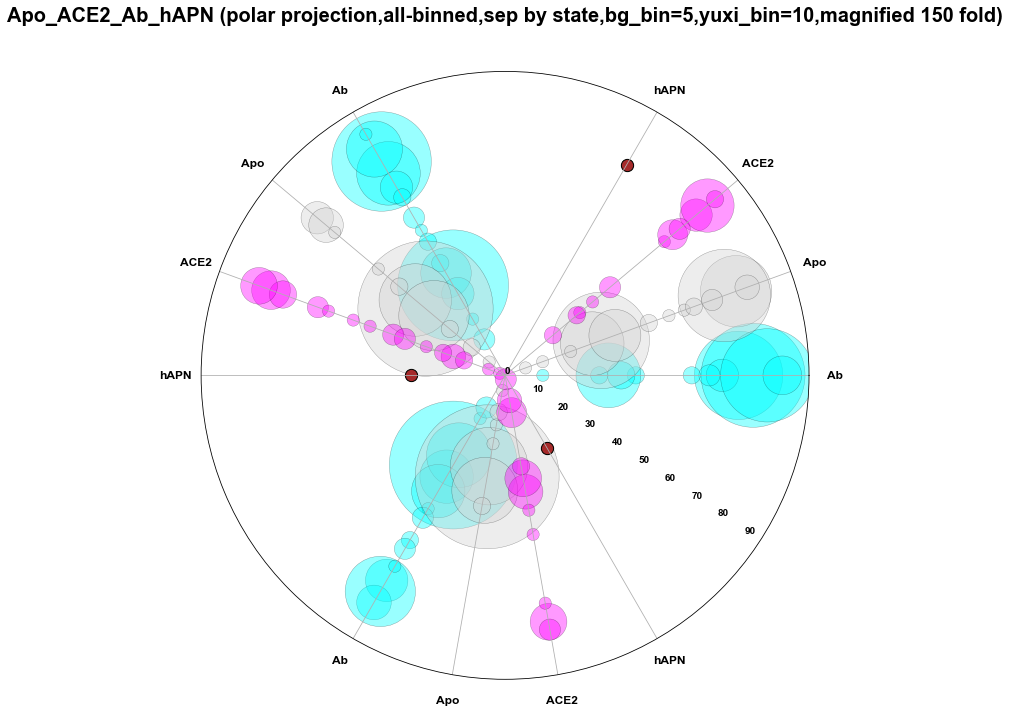

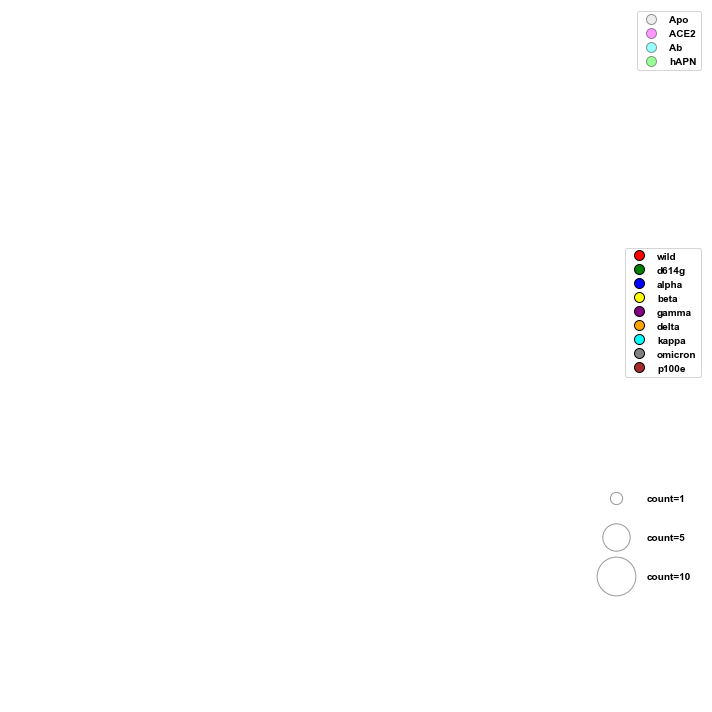

In [7]:
##### COPY FOR CUSTOMIZED VERSION!!! #####
## TOOL6: Final Projection Plotting. ##
## Note that Jing's data here can be replaced by other members' data (use TOOL5 to incorporate customized data, alse the RBD angles can be calculated separately using TOOL7).
## Consider the possibility of other spike receptors.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.patheffects as pe
from matplotlib.ticker import AutoMinorLocator
from datetime import datetime

######## some paramaters ######## 
output_format = 'svg'
source = "yuxi" # name of the lab member to compare his/her data to the background data.
bin_jing_dt = True # default to True.
plot_jing_dt = True # for all the "LAB MEMBER" data source.
sep_by_variant = False # separate dif variants by 10 degrees. If False, separate by status (apo/ace2/ab).
bg_bin_number, jing_bin_number = 5, 10
magnify_factor = 150 # magnify the binned circles.
jing_unbinned_mkrsize = 200 # real size of jing's unbinned circles.
bg_alpha = 0.4
jing_alpha = 1
bg_linewidth = 0.4 # linewidth of the background circles.
jing_linewidth = 1 # linewidth of the jing's circles.
edgecolor = 'k' # edgecolor of the circles.
grid_thickness = 1
figL,figW = 10,10
file = './20230326_RBDangle_analysis/20230402-233616_RBD_Angles_Summary_withSource_customizedVersion.xlsx'
status = 'Apo_ACE2_Ab_hAPN'
sheets = ['Ab_bound_pdb', 'Apo_form_pdb', 'ACE2_bound_pdb', 'hAPN_bound_pdb'] # the order is changed to avoid the overlapping (each corresponds to a layer of plot).
bg_status_c = {'Apo':'lightgray', 'ACE2':'magenta', 'Ab':'cyan', 'hAPN':'lime'}
variant_c = {'A:wild':'red','B:d614g':'green','C:alpha':'blue','D:beta':'yellow','E:gamma':'purple','F:delta':'orange','G:kappa':'cyan','H:omicron':'grey','I:p100e':'#A52A2A'}
scale_counts = [1, 5, 10]
scales = [(magnify_factor*scale_counts[0])**0.5, (magnify_factor*scale_counts[1])**0.5, (magnify_factor*scale_counts[2])**0.5]
#################################

######## basic settings for polar plot ########
fig = plt.figure(figsize=(figL,figW))
# plt.style.use('default')
ax = fig.add_subplot(111, projection='polar')
params = {"font.weight":"bold", "axes.labelweight":"bold", "font.family":"Arial"}
plt.rcParams.update(params)
ax.set_xticks(np.pi/180. *np.linspace(0,  360, 36, endpoint=False)) # draw xticks per 10 degrees.
ax.set_yticks(np.arange(0, 95, 10))
ax.yaxis.set_tick_params(labelsize = 10) 
ax.set_theta_zero_location('E')
ax.set_rlim(0, 95, 1)

# customize the xtick positions & labels.
xticklabelpad = 15
xtick_fontsize = 12
ax.tick_params(axis='x', pad=xticklabelpad)
if sep_by_variant:
    all_phi = [np.deg2rad(0+10*i) for i in range(len(variant_c))]+[np.deg2rad(120+10*i) for i in range(len(variant_c))]+[np.deg2rad(240+10*i) for i in range(len(variant_c))]
    plt.xticks(all_phi,[k.split(":")[1] for k in variant_c.keys()]*3,fontsize=xtick_fontsize)
else:
    all_phi = [np.deg2rad(0+20*i) for i in range(len(sheets))]+[np.deg2rad(120+20*i) for i in range(len(sheets))]+[np.deg2rad(240+20*i) for i in range(len(sheets))]
    plt.xticks(all_phi,[s.split("_")[0] for s in sheets]*3,fontsize=xtick_fontsize)

# move away the ryticks
ax.set_rlabel_position(-33.75)
# ax.set_xticklabels([])
# relabel the y axis.
# ax.grid(True)
ax.yaxis.grid(False)
ax.xaxis.grid(True)
# ax.yaxis.set_minor_locator(AutoMinorLocator(2))
# ax.grid(linewidth=grid_thickness, axis='x', which='both') # optimize the thickness of both major & minor grids.
leg1_xpos,leg2_xpos,leg2_ypos = 1,1,0.75
borderpad = 1
labelspacing = 3
handletextpad = 2
leg2_frame = False
################################################

datetime = datetime.now().strftime('%Y%m%d-%H%M%S')
save_df_chA, save_df_chB, save_df_chC = [],[],[]
status_cnt = 0
for sheet in sheets:
    # add pdb data.
    df = pd.read_excel(file, sheet_name = sheet, header = 0).dropna(subset=["A","B","C"]).fillna('other')
    # display(df)
    # rename variant to adapt to the alpherical order.
    df = df.replace({'variant' : {'wild':'A:wild', 'd614g':'B:d614g', 'alpha':'C:alpha', 'beta':'D:beta', 'gamma':'E:gamma', 'delta':'F:delta', 'kappa':'G:kappa', 'omicron':'H:omicron', 'p100e':'I:p100e'}})
    df_chA = df[['variant', 'PDB codes', 'A', 'rbd_status', 'source']]
    df_chB = df[['variant', 'PDB codes', 'B', 'rbd_status', 'source']]
    df_chC = df[['variant', 'PDB codes', 'C', 'rbd_status', 'source']]

    # (90 - theta) to get the angle from plane to rbd (original calculation is the angle between the rbd and normal vector).
    df_chA['90-A'] = 90 - df_chA['A']
    df_chB['90-B'] = 90 - df_chB['B']
    df_chC['90-C'] = 90 - df_chC['C']
    
    if sep_by_variant:
        # calculate phi to separate dif. variants (remember to fix the relationship between the phi angles & variant types).
        chA_phis = [0+10*i for i in range(len(variant_c))]
        chB_phis = [120+10*i for i in range(len(variant_c))]
        chC_phis = [240+10*i for i in range(len(variant_c))]
        variants = [k for k in variant_c.keys()]
        chA_var_phi_dict,chB_var_phi_dict,chC_var_phi_dict = dict(zip(variants,chA_phis)),dict(zip(variants,chB_phis)),dict(zip(variants,chC_phis))
        
        # write the phi angles based on the dictionaries & convert the angles into radians.
        ## chain A
        for k,v in chA_var_phi_dict.items():
            df_chA.loc[(df_chA['variant']==k), 'phi'] = np.deg2rad(v)
        ## chain B
        for k,v in chB_var_phi_dict.items():
            df_chB.loc[(df_chB['variant']==k), 'phi'] = np.deg2rad(v)
        ## chain C
        for k,v in chC_var_phi_dict.items():
            df_chC.loc[(df_chC['variant']==k), 'phi'] = np.deg2rad(v)
            
#         # chain A
#         chA_variants = sorted(list(set(df_chA['variant'])))
#         var_cnt = 0
#         for i in range(len(chA_variants)):
#             df_chA.loc[(df_chA['variant']==chA_variants[var_cnt]), 'phi'] = 0 + 10*i
#             var_cnt += 1
#         # chain B
#         chB_variants = sorted(list(set(df_chB['variant'])))
#         var_cnt = 0
#         for i in range(len(chB_variants)):
#             df_chB.loc[(df_chB['variant']==chB_variants[var_cnt]), 'phi'] = 120 + 10*i
#             var_cnt += 1
#         # chain C
#         chC_variants = sorted(list(set(df_chC['variant'])))
#         var_cnt = 0
#         for i in range(len(chC_variants)):
#             df_chC.loc[(df_chC['variant']==chC_variants[var_cnt]), 'phi'] = 240 + 10*i
#             var_cnt += 1

#         # convert degrees into radians for radial x-axis.
#         df_chA[['phi']] = np.deg2rad(df_chA[['phi']])
#         df_chB[['phi']] = np.deg2rad(df_chB[['phi']])
#         df_chC[['phi']] = np.deg2rad(df_chC[['phi']])

        # translate the data into spherical coords.
        thetaA = df_chA['90-A']
        thetaB = df_chB['90-B']
        thetaC = df_chC['90-C']
        phiA = df_chA['phi']
        phiB = df_chB['phi']
        phiC = df_chC['phi']
        
        # for polar plot xtick positioning.
        # each_all_phi = sorted(list(set(phiA.tolist())))+sorted(list(set(phiB.tolist())))+sorted(list(set(phiC.tolist())))
        # each_all_phi_labels = [v.split(":")[1] for v in chA_variants]+[v.split(":")[1] for v in chB_variants]+[v.split(":")[1] for v in chC_variants]
        # all_phi+=each_all_phi
        
        ## BACKGROUND DATA
        # bin the data to plot like bubble plot ("f" for "frequency" meaning "size").
        bins = np.arange(0, 95, bg_bin_number)
        df_chA['binned_angle'] = pd.cut(df_chA['90-A'], bins)
        df_chA['f'] = df_chA.groupby(['variant', 'binned_angle'])['binned_angle'].transform('size')
        df_chB['binned_angle'] = pd.cut(df_chB['90-B'], bins)
        df_chB['f'] = df_chB.groupby(['variant', 'binned_angle'])['binned_angle'].transform('size')
        df_chC['binned_angle'] = pd.cut(df_chC['90-C'], bins)
        df_chC['f'] = df_chC.groupby(['variant', 'binned_angle'])['binned_angle'].transform('size')

        # get avg within bin.
        df_chA['90-A(avg)'] = df_chA.groupby(['variant', 'binned_angle'])['90-A'].transform('mean')
        df_chB['90-B(avg)'] = df_chB.groupby(['variant', 'binned_angle'])['90-B'].transform('mean')
        df_chC['90-C(avg)'] = df_chC.groupby(['variant', 'binned_angle'])['90-C'].transform('mean')

        # save df first for Jing's analysis.
        save_df_chA.append(df_chA)
        save_df_chB.append(df_chB)
        save_df_chC.append(df_chC)

        binnned_chA_all = df_chA[['phi', '90-A(avg)', 'f']].drop_duplicates().reset_index(drop=True)
        binnned_chB_all = df_chB[['phi', '90-B(avg)', 'f']].drop_duplicates().reset_index(drop=True)
        binnned_chC_all = df_chC[['phi', '90-C(avg)', 'f']].drop_duplicates().reset_index(drop=True)
        
#         binnned_chA_all.to_excel(f"test_{sheet}.xlsx",index=False)
#         binnned_chB_all.to_excel(f"test_{sheet}.xlsx",index=False)
#         binnned_chC_all.to_excel(f"test_{sheet}.xlsx",index=False)

        # get angles & freq.
        bg_thetaA = binnned_chA_all['90-A(avg)']
        bg_thetaB = binnned_chB_all['90-B(avg)']
        bg_thetaC = binnned_chC_all['90-C(avg)']
        bg_phiA = binnned_chA_all['phi']
        bg_phiB = binnned_chB_all['phi']
        bg_phiC = binnned_chC_all['phi']
        f_A = binnned_chA_all['f']
        f_B = binnned_chB_all['f']
        f_C = binnned_chC_all['f']

        # layer up the projected scatter plots.
        ax.scatter(bg_phiA, bg_thetaA, c=bg_status_c[sheet.split('_')[0]], s=f_A*magnify_factor, alpha=bg_alpha, edgecolors = edgecolor, linewidth = bg_linewidth)
        ax.scatter(bg_phiB, bg_thetaB, c=bg_status_c[sheet.split('_')[0]], s=f_B*magnify_factor, alpha=bg_alpha, edgecolors = edgecolor, linewidth = bg_linewidth)
        ax.scatter(bg_phiC, bg_thetaC, c=bg_status_c[sheet.split('_')[0]], s=f_C*magnify_factor, alpha=bg_alpha, edgecolors = edgecolor, linewidth = bg_linewidth)
        
#         # deal with the azimuth tick positions & labels.
#         plt.xticks(all_phi,all_phi_labels,fontsize=xtick_fontsize)
#         ax.tick_params(axis='x', pad=xticklabelpad)  # move the tick labels
        
        # plot title
        plt.title(label = f"{status} (polar projection,binned-bg,sep by variant,bg_bin={bg_bin_number},magnified {magnify_factor} fold)", weight = 'bold', fontsize = 20, pad = 50)

#         # cutomized legend
#         mkrs = []
#         for var, c in bg_status_c.items():
#             mkr = mlines.Line2D([], [], color=c, marker='o', linewidth=0,
#                                   markersize=10, label=var, alpha=bg_alpha, markeredgecolor=edgecolor)
#             mkrs.append(mkr)
#         leg1 = plt.legend(handles=mkrs, bbox_to_anchor=(leg1_xpos,1), loc='upper left')
#         plt.gca().add_artist(leg1)
        
#         # scale bars to show the freq represented by the circles.
#         scalebars = []
#         f_cnt = 0
#         for s in scales:
#             scalebar = mlines.Line2D([], [], color='white', marker='o', linewidth=0,
#                                   markersize=s, label=f'count={scale_counts[f_cnt]}', alpha=bg_alpha, markeredgecolor=edgecolor)
#             scalebars.append(scalebar)
#             f_cnt += 1
#         plt.legend(handles=scalebars, bbox_to_anchor=(leg2_xpos,leg2_ypos), loc='upper left', borderpad = borderpad, labelspacing = labelspacing, handletextpad = handletextpad, frameon = leg2_frame)

        plt.tight_layout()
        plt.savefig(f"{datetime}_{status} (polar projection,binned-bg,sep by variant,bg_bin={bg_bin_number},magnified {magnify_factor} fold).{output_format}", bbox_inches='tight')
    else: # sep by status (apo/ace2/ab)
        # assign phi to separate dif. status.
        # chain A
        df_chA['phi'] = np.deg2rad(0 + 20*status_cnt)
        # chain B
        df_chB['phi'] = np.deg2rad(120 + 20*status_cnt)
        # chain C
        df_chC['phi'] = np.deg2rad(240 + 20*status_cnt)
        
        status_cnt+=1 # iterate to next status

        # translate the data into spherical coords.
        thetaA = df_chA['90-A']
        thetaB = df_chB['90-B']
        thetaC = df_chC['90-C']
        phiA = df_chA['phi']
        phiB = df_chB['phi']
        phiC = df_chC['phi']
        
        # for polar plot xtick positioning.
        # each_all_phi = sorted(list(set(phiA.tolist())))+sorted(list(set(phiB.tolist())))+sorted(list(set(phiC.tolist())))
        # each_all_phi_labels = [i.split("_")[0] for i in sheets]
        # all_phi+=each_all_phi
        
        ## BACKGROUND DATA
        # bin the data to plot like bubble plot.
        bins = np.arange(0, 95, bg_bin_number)
        df_chA['binned_angle'] = pd.cut(df_chA['90-A'], bins)
        df_chA['f'] = df_chA.groupby(['binned_angle'])['binned_angle'].transform('size')
        df_chB['binned_angle'] = pd.cut(df_chB['90-B'], bins)
        df_chB['f'] = df_chB.groupby(['binned_angle'])['binned_angle'].transform('size')
        df_chC['binned_angle'] = pd.cut(df_chC['90-C'], bins)
        df_chC['f'] = df_chC.groupby(['binned_angle'])['binned_angle'].transform('size')

        # get avg within bin.
        df_chA['90-A(avg)'] = df_chA.groupby(['binned_angle'])['90-A'].transform('mean')
        df_chB['90-B(avg)'] = df_chB.groupby(['binned_angle'])['90-B'].transform('mean')
        df_chC['90-C(avg)'] = df_chC.groupby(['binned_angle'])['90-C'].transform('mean')

        # save df first for Jing's analysis.
        save_df_chA.append(df_chA)
        save_df_chB.append(df_chB)
        save_df_chC.append(df_chC)

        binnned_chA_all = df_chA[['phi', '90-A(avg)', 'f']].drop_duplicates().reset_index(drop=True)
        binnned_chB_all = df_chB[['phi', '90-B(avg)', 'f']].drop_duplicates().reset_index(drop=True)
        binnned_chC_all = df_chC[['phi', '90-C(avg)', 'f']].drop_duplicates().reset_index(drop=True)

        # get angles & freq.
        bg_thetaA = binnned_chA_all['90-A(avg)']
        bg_thetaB = binnned_chB_all['90-B(avg)']
        bg_thetaC = binnned_chC_all['90-C(avg)']
        bg_phiA = binnned_chA_all['phi']
        bg_phiB = binnned_chB_all['phi']
        bg_phiC = binnned_chC_all['phi']
        f_A = binnned_chA_all['f']
        f_B = binnned_chB_all['f']
        f_C = binnned_chC_all['f']

        ax.scatter(bg_phiA, bg_thetaA, c=bg_status_c[sheet.split('_')[0]], s=f_A*magnify_factor, alpha=bg_alpha, edgecolors = edgecolor, linewidth = bg_linewidth)
        ax.scatter(bg_phiB, bg_thetaB, c=bg_status_c[sheet.split('_')[0]], s=f_B*magnify_factor, alpha=bg_alpha, edgecolors = edgecolor, linewidth = bg_linewidth)
        ax.scatter(bg_phiC, bg_thetaC, c=bg_status_c[sheet.split('_')[0]], s=f_C*magnify_factor, alpha=bg_alpha, edgecolors = edgecolor, linewidth = bg_linewidth)
        
#         # deal with the azimuth tick positions & labels.
#         plt.xticks(all_phi,all_phi_labels,fontsize=xtick_fontsize)
#         ax.tick_params(axis='x', pad=xticklabelpad)  # move the tick labels
        
        # plot title
        plt.title(label = f"{status} (polar projection,binned-bg,sep by state,bg_bin={bg_bin_number},magnified {magnify_factor} fold)", weight = 'bold', fontsize = 20, pad = 50)

#         # cutomized legend
#         mkrs = []
#         for var, c in bg_status_c.items():
#             mkr = mlines.Line2D([], [], color=c, marker='o', linewidth=0,
#                                   markersize=10, label=var, alpha=bg_alpha, markeredgecolor=edgecolor)
#             mkrs.append(mkr)
#         leg1 = plt.legend(handles=mkrs, bbox_to_anchor=(leg1_xpos,1), loc='upper left')
#         plt.gca().add_artist(leg1)
        
#         # scale bars to show the freq represented by the circles.
#         scalebars = []
#         f_cnt = 0
#         for s in scales:
#             scalebar = mlines.Line2D([], [], color='white', marker='o', linewidth=0,
#                                   markersize=s, label=f'count={scale_counts[f_cnt]}', alpha=bg_alpha, markeredgecolor=edgecolor)
#             scalebars.append(scalebar)
#             f_cnt += 1
#         plt.legend(handles=scalebars, bbox_to_anchor=(leg2_xpos,leg2_ypos), loc='upper left', borderpad = borderpad, labelspacing = labelspacing, handletextpad = handletextpad, frameon = leg2_frame)
        
        plt.tight_layout()
        plt.savefig(f"{datetime}_{status} (polar projection,binned-bg,sep by state,bg_bin={bg_bin_number},magnified {magnify_factor} fold).{output_format}", bbox_inches='tight')

if plot_jing_dt:
    for i in range(len(save_df_chA)):
        df_chA, df_chB, df_chC = save_df_chA[i], save_df_chB[i], save_df_chC[i] 
        ## LAB MEMBER'S DATA 
        # chain A
        jing_chA = df_chA.loc[(df_chA['source']!='other')]
        # # chain B
        jing_chB = df_chB.loc[(df_chB['source']!='other')]
        # # chain C
        jing_chC = df_chC.loc[(df_chC['source']!='other')]
        
        if len(jing_chA) != 0: # do not draw the empty data lest the background show the default color.
            if bin_jing_dt:
                bins = np.arange(0, 95, jing_bin_number)
                if sep_by_variant:
                    # re-bin the data to plot like bubble plot.
                    jing_chA['binned_angle'] = pd.cut(jing_chA['90-A'], bins)
                    jing_chA['f'] = jing_chA.groupby(['variant', 'binned_angle'])['binned_angle'].transform('size')
                    jing_chB['binned_angle'] = pd.cut(jing_chB['90-B'], bins)
                    jing_chB['f'] = jing_chB.groupby(['variant', 'binned_angle'])['binned_angle'].transform('size')
                    jing_chC['binned_angle'] = pd.cut(jing_chC['90-C'], bins)
                    jing_chC['f'] = jing_chC.groupby(['variant', 'binned_angle'])['binned_angle'].transform('size')

                    # re-calculate avg within bin.
                    jing_chA['90-A(avg)'] = jing_chA.groupby(['variant', 'binned_angle'])['90-A'].transform('mean')
                    jing_chB['90-B(avg)'] = jing_chB.groupby(['variant', 'binned_angle'])['90-B'].transform('mean')
                    jing_chC['90-C(avg)'] = jing_chC.groupby(['variant', 'binned_angle'])['90-C'].transform('mean')

                    binnned_jing_chA = jing_chA[['variant', 'phi', '90-A(avg)', 'f']].drop_duplicates().reset_index(drop=True)
                    binnned_jing_chB = jing_chB[['variant', 'phi', '90-B(avg)', 'f']].drop_duplicates().reset_index(drop=True)
                    binnned_jing_chC = jing_chC[['variant', 'phi', '90-C(avg)', 'f']].drop_duplicates().reset_index(drop=True)

    #                 binnned_jing_chA.to_excel('20220310_binnned_jing_apo_chA.xlsx', index=False)
    #                 binnned_jing_chB.to_excel('20220310_binnned_jing_apo_chB.xlsx', index=False)
    #                 binnned_jing_chC.to_excel('20220310_binnned_jing_apo_chC.xlsx', index=False)

                    thetaA = binnned_jing_chA['90-A(avg)']
                    thetaB = binnned_jing_chB['90-B(avg)']
                    thetaC = binnned_jing_chC['90-C(avg)']
                    phiA = binnned_jing_chA['phi']
                    phiB = binnned_jing_chB['phi']
                    phiC = binnned_jing_chC['phi']
                    f_A = binnned_jing_chA['f']
                    f_B = binnned_jing_chB['f']
                    f_C = binnned_jing_chC['f']

                    ax.scatter(phiA, thetaA, c=binnned_jing_chA['variant'].map(variant_c), marker='o', s=f_A*magnify_factor, alpha=jing_alpha, edgecolors = edgecolor, linewidth = jing_linewidth)
                    ax.scatter(phiB, thetaB, c=binnned_jing_chB['variant'].map(variant_c), marker='o', s=f_B*magnify_factor, alpha=jing_alpha, edgecolors = edgecolor, linewidth = jing_linewidth)
                    ax.scatter(phiC, thetaC, c=binnned_jing_chC['variant'].map(variant_c), marker='o', s=f_C*magnify_factor, alpha=jing_alpha, edgecolors = edgecolor, linewidth = jing_linewidth)

    #                 # hide x,y tick marks & labels.
    #                 ax.set_xticklabels([])
    #                 ax.set_xticks([])
    #                 ax.set_yticklabels([])
    #                 ax.set_yticks([])

                    # plot title
                    plt.title(label = f"{status} (polar projection,all-binned,sep by variant,bg_bin={bg_bin_number},{source}_bin={jing_bin_number},magnified {magnify_factor} fold)", weight = 'bold', fontsize = 20, pad = 50)

    #                 # cutomized legend
    #                 mkrs = []
    #                 for var, c in variant_c.items():
    #                     mkr = mlines.Line2D([], [], color=c, marker='o', linewidth=0,
    #                                           markersize=10, label=var[2:], alpha=jing_alpha, markeredgecolor='k')
    #                     mkrs.append(mkr)
    #                 leg1 = plt.legend(handles=mkrs, bbox_to_anchor=(leg1_xpos,1), loc='upper left')
    #                 plt.gca().add_artist(leg1)

    #                 # scale bars to show the freq represented by the circles.
    #                 scalebars = []
    #                 f_cnt = 0
    #                 for s in scales:
    #                     scalebar = mlines.Line2D([], [], color='white', marker='o', linewidth=0,
    #                                           markersize=s, label=f'count={scale_counts[f_cnt]}', alpha=bg_alpha, markeredgecolor=edgecolor)
    #                     scalebars.append(scalebar)
    #                     f_cnt += 1
    #                 plt.legend(handles=scalebars, bbox_to_anchor=(leg2_xpos,leg2_ypos), loc='upper left', borderpad = borderpad, labelspacing = labelspacing, handletextpad = handletextpad, frameon = leg2_frame)

                    plt.tight_layout()
                    plt.savefig(f"{datetime}_{status} (polar projection,all-binned,sep by variant,bg_bin={bg_bin_number},{source}_bin={jing_bin_number},magnified {magnify_factor} fold).{output_format}", bbox_inches='tight')
                else: # sep by status (apo/ace2/ab)
                    # re-bin the data to plot like bubble plot.
                    jing_chA['binned_angle'] = pd.cut(jing_chA['90-A'], bins)
                    jing_chA['f'] = jing_chA.groupby(['variant', 'binned_angle'])['binned_angle'].transform('size')
                    jing_chB['binned_angle'] = pd.cut(jing_chB['90-B'], bins)
                    jing_chB['f'] = jing_chB.groupby(['variant', 'binned_angle'])['binned_angle'].transform('size')
                    jing_chC['binned_angle'] = pd.cut(jing_chC['90-C'], bins)
                    jing_chC['f'] = jing_chC.groupby(['variant', 'binned_angle'])['binned_angle'].transform('size')

                    # re-calculate avg within bin.
                    jing_chA['90-A(avg)'] = jing_chA.groupby(['variant', 'binned_angle'])['90-A'].transform('mean')
                    jing_chB['90-B(avg)'] = jing_chB.groupby(['variant', 'binned_angle'])['90-B'].transform('mean')
                    jing_chC['90-C(avg)'] = jing_chC.groupby(['variant', 'binned_angle'])['90-C'].transform('mean')

                    binnned_jing_chA = jing_chA[['variant', 'phi', '90-A(avg)', 'f']].drop_duplicates().reset_index(drop=True)
                    binnned_jing_chB = jing_chB[['variant', 'phi', '90-B(avg)', 'f']].drop_duplicates().reset_index(drop=True)
                    binnned_jing_chC = jing_chC[['variant', 'phi', '90-C(avg)', 'f']].drop_duplicates().reset_index(drop=True)

                    thetaA = binnned_jing_chA['90-A(avg)']
                    thetaB = binnned_jing_chB['90-B(avg)']
                    thetaC = binnned_jing_chC['90-C(avg)']
                    phiA = binnned_jing_chA['phi']
                    phiB = binnned_jing_chB['phi']
                    phiC = binnned_jing_chC['phi']
                    f_A = binnned_jing_chA['f']
                    f_B = binnned_jing_chB['f']
                    f_C = binnned_jing_chC['f']

                    ax.scatter(phiA, thetaA, c=binnned_jing_chA['variant'].map(variant_c), marker='o', s=f_A*magnify_factor, alpha=jing_alpha, edgecolors = edgecolor, linewidth = jing_linewidth)
                    ax.scatter(phiB, thetaB, c=binnned_jing_chB['variant'].map(variant_c), marker='o', s=f_B*magnify_factor, alpha=jing_alpha, edgecolors = edgecolor, linewidth = jing_linewidth)
                    ax.scatter(phiC, thetaC, c=binnned_jing_chC['variant'].map(variant_c), marker='o', s=f_C*magnify_factor, alpha=jing_alpha, edgecolors = edgecolor, linewidth = jing_linewidth)

    #                 # hide x,y tick marks & labels.
    #                 ax.set_xticklabels([])
    #                 ax.set_xticks([])
    #                 ax.set_yticklabels([])
    #                 ax.set_yticks([])

                    # plot title
                    plt.title(label = f"{status} (polar projection,all-binned,sep by state,bg_bin={bg_bin_number},{source}_bin={jing_bin_number},magnified {magnify_factor} fold)", weight = 'bold', fontsize = 20, pad = 50)

    #                 # cutomized legend
    #                 mkrs = []
    #                 for var, c in variant_c.items():
    #                     mkr = mlines.Line2D([], [], color=c, marker='o', linewidth=0,
    #                                           markersize=10, label=var[2:], alpha=jing_alpha, markeredgecolor='k')
    #                     mkrs.append(mkr)
    #                 leg1 = plt.legend(handles=mkrs, bbox_to_anchor=(leg1_xpos,1), loc='upper left')
    #                 plt.gca().add_artist(leg1)

    #                 # scale bars to show the freq represented by the circles.
    #                 scalebars = []
    #                 f_cnt = 0
    #                 for s in scales:
    #                     scalebar = mlines.Line2D([], [], color='white', marker='o', linewidth=0,
    #                                           markersize=s, label=f'count={scale_counts[f_cnt]}', alpha=bg_alpha, markeredgecolor=edgecolor)
    #                     scalebars.append(scalebar)
    #                     f_cnt += 1
    #                 plt.legend(handles=scalebars, bbox_to_anchor=(leg2_xpos,leg2_ypos), loc='upper left', borderpad = borderpad, labelspacing = labelspacing, handletextpad = handletextpad, frameon = leg2_frame)

                    plt.tight_layout()
                    plt.savefig(f"{datetime}_{status} (polar projection,all-binned,sep by state,bg_bin={bg_bin_number},{source}_bin={jing_bin_number},magnified {magnify_factor} fold).{output_format}", bbox_inches='tight')
            else:
                if sep_by_variant:
                    thetaA = jing_chA['90-A']
                    thetaB = jing_chB['90-B']
                    thetaC = jing_chC['90-C']
                    phiA = jing_chA['phi']
                    phiB = jing_chB['phi']
                    phiC = jing_chC['phi']

                    ax.scatter(phiA, thetaA, c=jing_chA['variant'].map(variant_c), marker='o', s=jing_unbinned_mkrsize, alpha=jing_alpha, edgecolors = edgecolor, linewidth = jing_linewidth)
                    ax.scatter(phiB, thetaB, c=jing_chB['variant'].map(variant_c), marker='o', s=jing_unbinned_mkrsize, alpha=jing_alpha, edgecolors = edgecolor, linewidth = jing_linewidth)
                    ax.scatter(phiC, thetaC, c=jing_chC['variant'].map(variant_c), marker='o', s=jing_unbinned_mkrsize, alpha=jing_alpha, edgecolors = edgecolor, linewidth = jing_linewidth)

    #                 # hide x,y tick marks & labels.
    #                 ax.set_xticklabels([])
    #                 ax.set_xticks([])
    #                 ax.set_yticklabels([])
    #                 ax.set_yticks([])

                    # plot title
                    plt.title(label = f"{status} (polar projection,sep by variant,un-binned {source}'s data,bg_bin={bg_bin_number},magnified {magnify_factor} fold)", weight = 'bold', fontsize = 20, pad = 50)

    #                 # cutomized legend
    #                 mkrs = []
    #                 for var, c in variant_c.items():
    #                     mkr = mlines.Line2D([], [], color=c, marker='o', linewidth=0,
    #                                           markersize=10, label=var[2:], alpha=jing_alpha, markeredgecolor='k')
    #                     mkrs.append(mkr)
    #                 leg1 = plt.legend(handles=mkrs, bbox_to_anchor=(leg1_xpos,1), loc='upper left')
    #                 plt.gca().add_artist(leg1)

    #                 # scale bars to show the freq represented by the circles.
    #                 scalebars = []
    #                 f_cnt = 0
    #                 for s in scales:
    #                     scalebar = mlines.Line2D([], [], color='white', marker='o', linewidth=0,
    #                                           markersize=s, label=f'count={scale_counts[f_cnt]}', alpha=bg_alpha, markeredgecolor=edgecolor)
    #                     scalebars.append(scalebar)
    #                     f_cnt += 1
    #                 plt.legend(handles=scalebars, bbox_to_anchor=(leg2_xpos,leg2_ypos), loc='upper left', borderpad = borderpad, labelspacing = labelspacing, handletextpad = handletextpad, frameon = leg2_frame)

                    plt.tight_layout()
                    plt.savefig(f"{datetime}_{status} (polar projection,sep by variant,un-binned {source}'s data,bg_bin={bg_bin_number},magnified {magnify_factor} fold).{output_format}", bbox_inches='tight')
                else: # sep by status (apo/ace2/ab)
                    thetaA = jing_chA['90-A']
                    thetaB = jing_chB['90-B']
                    thetaC = jing_chC['90-C']
                    phiA = jing_chA['phi']
                    phiB = jing_chB['phi']
                    phiC = jing_chC['phi']

                    ax.scatter(phiA, thetaA, c=jing_chA['variant'].map(variant_c), marker='o', s=jing_unbinned_mkrsize, alpha=jing_alpha, edgecolors = edgecolor, linewidth = jing_linewidth)
                    ax.scatter(phiB, thetaB, c=jing_chB['variant'].map(variant_c), marker='o', s=jing_unbinned_mkrsize, alpha=jing_alpha, edgecolors = edgecolor, linewidth = jing_linewidth)
                    ax.scatter(phiC, thetaC, c=jing_chC['variant'].map(variant_c), marker='o', s=jing_unbinned_mkrsize, alpha=jing_alpha, edgecolors = edgecolor, linewidth = jing_linewidth)

    #                 # hide x,y tick marks & labels.
    #                 ax.set_xticklabels([])
    #                 ax.set_xticks([])
    #                 ax.set_yticklabels([])
    #                 ax.set_yticks([])

                    # plot title
                    plt.title(label = f"{status} (polar projection,sep by state,un-binned {source}'s data,bg_bin={bg_bin_number},magnified {magnify_factor} fold)", weight = 'bold', fontsize = 20, pad = 50)

    #                 # cutomized legend
    #                 mkrs = []
    #                 for var, c in variant_c.items():
    #                     mkr = mlines.Line2D([], [], color=c, marker='o', linewidth=0,
    #                                           markersize=10, label=var[2:], alpha=jing_alpha, markeredgecolor='k')
    #                     mkrs.append(mkr)
    #                 leg1 = plt.legend(handles=mkrs, bbox_to_anchor=(leg1_xpos,1), loc='upper left')
    #                 plt.gca().add_artist(leg1)

    #                 # scale bars to show the freq represented by the circles.
    #                 scalebars = []
    #                 f_cnt = 0
    #                 for s in scales:
    #                     scalebar = mlines.Line2D([], [], color='white', marker='o', linewidth=0,
    #                                           markersize=s, label=f'count={scale_counts[f_cnt]}', alpha=bg_alpha, markeredgecolor=edgecolor)
    #                     scalebars.append(scalebar)
    #                     f_cnt += 1
    #                 plt.legend(handles=scalebars, bbox_to_anchor=(leg2_xpos,leg2_ypos), loc='upper left', borderpad = borderpad, labelspacing = labelspacing, handletextpad = handletextpad, frameon = leg2_frame)

                    plt.tight_layout()
                    plt.savefig(f"{datetime}_{status} (polar projection,sep by state,un-binned {source}'s data,bg_bin={bg_bin_number},magnified {magnify_factor} fold).{output_format}", bbox_inches='tight')
                
# generate legend separately on a new fig.
leg_fig, (ax_leg_state,ax_leg_variant,ax_leg_size) = plt.subplots(3,1,figsize=(figL,figW),sharex=True,gridspec_kw={'height_ratios': [1,1,1],'wspace':0})
ax_leg_state.set_axis_off()
ax_leg_variant.set_axis_off()
ax_leg_size.set_axis_off()
## state legend.
mkrs = []
for var, c in bg_status_c.items():
    mkr = mlines.Line2D([], [], color=c, marker='o', linewidth=0,
                          markersize=10, label=var, alpha=bg_alpha, markeredgecolor=edgecolor)
    mkrs.append(mkr)
ax_leg_state.legend(handles=mkrs)
for axis in ["top","right",'bottom','left']:
    ax_leg_state.spines[axis].set_visible(False)
## variant legend.
mkrs = []
for var, c in variant_c.items():
    mkr = mlines.Line2D([], [], color=c, marker='o', linewidth=0,
                          markersize=10, label=var[2:], alpha=jing_alpha, markeredgecolor='k')
    mkrs.append(mkr)
ax_leg_variant.legend(handles=mkrs)
for axis in ["top","right",'bottom','left']:
    ax_leg_variant.spines[axis].set_visible(False)                
## size legend.
scalebars = []
f_cnt = 0
for s in scales:
    scalebar = mlines.Line2D([], [], color='white', marker='o', linewidth=0,
                          markersize=s, label=f'count={scale_counts[f_cnt]}', alpha=bg_alpha, markeredgecolor=edgecolor)
    scalebars.append(scalebar)
    f_cnt += 1
ax_leg_size.legend(handles=scalebars,borderpad = borderpad, labelspacing = labelspacing, handletextpad = handletextpad, frameon = leg2_frame)
for axis in ["top","right",'bottom','left']:
    ax_leg_size.spines[axis].set_visible(False)
plt.tight_layout()
plt.savefig(f'{datetime}_Polar_projection_plot_legends.{output_format}', bbox_inches='tight')
plt.show()

In [1]:
## TOOL7: Get RBD-Angle (customized version). ##
from pymol import cmd
import numpy as np
import pandas as pd
from numpy import linalg as la
import math
from datetime import datetime
import time

# Record start time & date.
start = time.time()
datetime = datetime.now().strftime('%Y%m%d-%H%M%S')

# Delete existing objects from PDB_preprocessor.py analysis.
cmd.delete("all")
print("Delete all existing objects within PyMOL from PDB_preprocessor.py analysis...\n")

## Adjustable parameters ##
## pdb_class_dict example (user-defined pdb class, we assume the use should know this information).
# pdb_class_dict = {'wild_apo':['6vsb', '6vxx', '6vyb', '6x29', '6x2a', '6x2b', '6x2c', '6x6p', '6x79', '6xf5', '6xf6', '6xkl', '6xlu', '6xm0', '6xm3', '6xm4', '6xm5', '6xr8', '6z97', '6zb4', '6zb5', '6zge', '6zgg', '6zgh', '6zgi', '6zow', '6zox', '6zoy', '6zoz', '6zp0', '6zp1', '6zp2', '6zp7', '7a93', '7cab', '7cn9', '7ddd', '7ddn', '7df3', '7dk3', '7dwy', '7dwz', '7dx0', '7dx3', '7e7b', '7e7d', '7fb0', '7fb1', '7fb3', '7fb4', '7fcd', '7fce', '7jji', '7jwy', '7kdg', '7kdh', '7kj5', '7l7k', '7m0j', '7mjg', '7mtc', '7mtd', '7mte', '7nt9', '7nta', '7od3', '7odl', '7p7b', '7q1z', '7qur', '7qus', '7ru1', '7ru2', '7s6i', '7tla', '7tlb', '7tlc', '7tld', '7v20', '7vhj', '7vhk', '7vrv', '7vrw', '7wgv', '7wgx', '7wgy', '7wgz', '7xtz', '7xu0', '7xu1', '7xu2', '7xu3', '7xu6', '7yqu', '7z3z', '8h3d', '8h3e','7n9b']\
#                     , 'wild_ace2':['7df4','7dx5','7dx6','7dx7','7dx8','7dx9','7kms','7kmz','7knb','7kne','7knh','7kni']}
pdb_class_dict = {'p100e_hapn':['p100e_hapn']}
user_defined_variant = True
user_defined_rbd_start_resi = 293
user_defined_rbd_length = 142
###########################

classes = list(pdb_class_dict.keys())
chids = ['A', 'B', 'C']
abnormal_chid = []
dfs = []
sheet_names = []

# Start analysis & save logs to .txt file.
with open(f"{datetime}_get_RBD_angles_log_customizedVersion.txt", "a") as f:
    print(f"\nclasses:\n{classes}\n")
    print(f"\nclasses:\n{classes}\n", file=f)
    for c in classes:
        if len(pdb_class_dict[c]) != 0:
            print(f'\nclass:{c}')
            print(f'\nclass pdbs:\n{pdb_class_dict[c]}\n')
            print(f'\nclass:{c}', file=f)
            print(f'\nclass pdbs:\n{pdb_class_dict[c]}\n', file=f)
            rbd_angles_chA, rbd_angles_chB, rbd_angles_chC = [], [], []
            pdbs = []
            sheet_names.append(c) # only write existing data for clarity.
            for code in pdb_class_dict[c]:
                print(f'\n[Protein: {code} ({c})...]\n')
                print(f'\n[Loading {code} in PyMOL...]\n')
                print(f'\n[Protein: {code} ({c})...]\n', file=f)
                print(f'\n[Loading {code} in PyMOL...]\n', file=f)
                objname = code
                cmd.load(f'{code}.cif', objname)
                print(f'\n[Start processing {objname}...]\n')
                print(f'\n[Start processing {objname}...]\n', file=f)
                cmd.remove(f'{objname} and het')

                # note that the resi330 may shift due to deletions in different variants.
                if 'alpha' in c or 'beta' in c:
                    rbd_start_resi = 327
                elif 'delta' in c:
                    rbd_start_resi = 328
                elif 'wild' in c or 'd614g' in c or 'gamma' in c or 'kappa' in c or 'omicron' in c:
                    rbd_start_resi = 330
                elif user_defined_variant:
                    if user_defined_rbd_start_resi is not None:
                        rbd_start_resi = user_defined_rbd_start_resi
                    else:
                        print("\nPlease provide user-defined RBD start residue number for angle calculation.\n")
                        break

                # make sure the A/B/C chains are only for spike, not for Ab.
                resi330_xyz_chA = cmd.get_coords(f'{objname} and resi {rbd_start_resi} and name CA and chain A', 1)
                resi330_xyz_chB = cmd.get_coords(f'{objname} and resi {rbd_start_resi} and name CA and chain B', 1)
                resi330_xyz_chC = cmd.get_coords(f'{objname} and resi {rbd_start_resi} and name CA and chain C', 1)
                if user_defined_rbd_length is None:
                    user_defined_rbd_length = 190 # default to sars cov 2 length.
                else:
                    user_defined_rbd_length = user_defined_rbd_length
                resi520_xyz_chA = cmd.get_coords(f'{objname} and resi {rbd_start_resi+user_defined_rbd_length} and name CA and chain A', 1)
                resi520_xyz_chB = cmd.get_coords(f'{objname} and resi {rbd_start_resi+user_defined_rbd_length} and name CA and chain B', 1)
                resi520_xyz_chC = cmd.get_coords(f'{objname} and resi {rbd_start_resi+user_defined_rbd_length} and name CA and chain C', 1)
                print(f'\nresi330_xyz_chA:{resi330_xyz_chA}')
                print(f'\nresi330_xyz_chB:{resi330_xyz_chB}')
                print(f'\nresi330_xyz_chC:{resi330_xyz_chC}')
                print(f'\nresi520_xyz_chA:{resi520_xyz_chA}')
                print(f'\nresi520_xyz_chB:{resi520_xyz_chB}')
                print(f'\nresi520_xyz_chC:{resi520_xyz_chC}')
                print(f'\nresi330_xyz_chA:{resi330_xyz_chA}', file=f)
                print(f'\nresi330_xyz_chB:{resi330_xyz_chB}', file=f)
                print(f'\nresi330_xyz_chC:{resi330_xyz_chC}', file=f)
                print(f'\nresi520_xyz_chA:{resi520_xyz_chA}', file=f)
                print(f'\nresi520_xyz_chB:{resi520_xyz_chB}', file=f)
                print(f'\nresi520_xyz_chC:{resi520_xyz_chC}', file=f)
                if resi330_xyz_chA is not None and resi330_xyz_chB is not None and resi330_xyz_chC is not None and resi520_xyz_chA is not None and resi520_xyz_chB is not None and resi520_xyz_chC is not None:
                    pdbs.append(code)
                    # get 2 vectors (zx & zy) to calculate the normal vector of the plane.
                    resi330_31 = resi330_xyz_chA - resi330_xyz_chC
                    resi330_32 = resi330_xyz_chB - resi330_xyz_chC
                    normal_v = np.cross(resi330_31, resi330_32) 
                    com_rbd_a = cmd.centerofmass(f'{objname} and resi {rbd_start_resi}-{rbd_start_resi+user_defined_rbd_length} and chain A')
                    com_rbd_b = cmd.centerofmass(f'{objname} and resi {rbd_start_resi}-{rbd_start_resi+user_defined_rbd_length} and chain B')
                    com_rbd_c = cmd.centerofmass(f'{objname} and resi {rbd_start_resi}-{rbd_start_resi+user_defined_rbd_length} and chain C')
                    cmd.pseudoatom(f'{objname}_chA_rbd_com', pos=f'[{com_rbd_a[0]},{com_rbd_a[1]},{com_rbd_a[2]}]')
                    cmd.pseudoatom(f'{objname}_chB_rbd_com', pos=f'[{com_rbd_b[0]},{com_rbd_b[1]},{com_rbd_b[2]}]')
                    cmd.pseudoatom(f'{objname}_chC_rbd_com', pos=f'[{com_rbd_c[0]},{com_rbd_c[1]},{com_rbd_c[2]}]')
                    print(f'{objname}_com_rbd_a:{com_rbd_a}')
                    print(f'{objname}_com_rbd_b:{com_rbd_b}')
                    print(f'{objname}_com_rbd_c:{com_rbd_c}')
                    print(f'{objname}_com_rbd_a:{com_rbd_a}', file=f)
                    print(f'{objname}_com_rbd_b:{com_rbd_b}', file=f)
                    print(f'{objname}_com_rbd_c:{com_rbd_c}', file=f)

                    # calculate all the rbd vectors to get the angles btw vector and the normal vector using resi 330 as the origin.
                    ch_cnt = 1
                    for ch in chids:
                        ori = cmd.get_coords(f'{objname} and resi {rbd_start_resi} and name CA and chain {ch}', 1)[0]
                        cmd.pseudoatom(f'{objname}_rbd_ori_{ch_cnt}', pos=f'[{ori[0]},{ori[1]},{ori[2]}]')
                        rbd_com = cmd.centerofmass(f'{objname} and resi {rbd_start_resi}-{rbd_start_resi+user_defined_rbd_length} and chain {ch}')
                        rbd_v = rbd_com - ori
                        angle = np.around(math.degrees(np.arccos(np.inner(rbd_v, normal_v)/(la.norm(rbd_v)*la.norm(normal_v)))), decimals=1) 
                        if angle > 90:
                            angle = 180 - angle

                        if ch == 'A':
                            rbd_angles_chA.append(angle)
                        elif ch == 'B':
                            rbd_angles_chB.append(angle)
                        elif ch == 'C':
                            rbd_angles_chC.append(angle)
                        ch_cnt += 1
                else:
                    print('Not all A/B/C chains are for spike. Move on to the next structure.')
                    print('Not all A/B/C chains are for spike. Move on to the next structure.', file=f)
                    pdbs.append(code)
                    rbd_angles_chA.append(np.nan)
                    rbd_angles_chB.append(np.nan)
                    rbd_angles_chC.append(np.nan)
                    abnormal_chid.append(code)

            # making the summary table for each qualified data.
            df = pd.DataFrame({'PDB codes':pdbs, '[chainA]RBD angle':rbd_angles_chA, '[chainB]RBD angle':rbd_angles_chB, '[chainC]RBD angle':rbd_angles_chC})
            dfs.append(df)

        else:
            print(f'\nclass:{c}')
            print(f'\nclass pdbs:\n{pdb_class_dict[c]}\n')
            print(f'\nEmpty list. Move on to the next class.\n')
            print(f'\nclass:{c}', file=f)
            print(f'\nclass pdbs:\n{pdb_class_dict[c]}\n', file=f)
            print(f'\nEmpty list. Move on to the next class.\n', file=f)

    # final summary excel file.
    c_cnt = 0
    with pd.ExcelWriter(f'{datetime}_RBD_Angles_customizedVersion.xlsx') as writer:
        for df in dfs:
            df.to_excel(writer, sheet_name = f'{sheet_names[c_cnt]}', index = False)
            c_cnt += 1

    print(f'{len(abnormal_chid)} files abnormal_chid:\n{abnormal_chid}\n')
    print(f'{len(abnormal_chid)} files abnormal_chid:\n{abnormal_chid}\n', file=f)

    # Elapsed time.
    print('\n-----Elapsed time: %.2f seconds.-----\n'%(time.time()-start))
    print('\n-----Elapsed time: %.2f seconds.-----\n'%(time.time()-start), file=f)

Delete all existing objects within PyMOL from PDB_preprocessor.py analysis...


classes:
['p100e_hapn']


class:p100e_hapn

class pdbs:
['p100e_hapn']


[Protein: p100e_hapn (p100e_hapn)...]


[Loading p100e_hapn in PyMOL...]


[Start processing p100e_hapn...]


resi330_xyz_chA:[[432.49  504.841 407.891]]

resi330_xyz_chB:[[411.025 560.162 413.963]]

resi330_xyz_chC:[[470.327 551.506 413.809]]

resi520_xyz_chA:[[432.05  498.535 399.945]]

resi520_xyz_chB:[[407.346 563.351 404.86 ]]

resi520_xyz_chC:[[474.776 556.206 405.963]]
p100e_hapn_com_rbd_a:[440.4344300135337, 504.70413348021606, 373.7071958992098]
p100e_hapn_com_rbd_b:[420.20781690939515, 540.2324653960773, 400.33137419824254]
p100e_hapn_com_rbd_c:[448.73299423610825, 555.0721367421619, 401.49582245827753]
0 files abnormal_chid:
[]


-----Elapsed time: 0.68 seconds.-----



/var/folders/cz/ccvjhv9j3_5dm3x2zf9ps__80000gp/T/ipykernel_12186/1716411001.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apo_df_chA['90-A'] = 90 - apo_df_chA['A']
/var/folders/cz/ccvjhv9j3_5dm3x2zf9ps__80000gp/T/ipykernel_12186/1716411001.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apo_df_chB['90-B'] = 90 - apo_df_chB['B']
/var/folders/cz/ccvjhv9j3_5dm3x2zf9ps__80000gp/T/ipykernel_12186/1716411001.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

/var/folders/cz/ccvjhv9j3_5dm3x2zf9ps__80000gp/T/ipykernel_12186/1716411001.py:332: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jing_apo_chA['binned_angle'] = pd.cut(jing_apo_chA['90-A'], bins)
/var/folders/cz/ccvjhv9j3_5dm3x2zf9ps__80000gp/T/ipykernel_12186/1716411001.py:333: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jing_apo_chA['f'] = jing_apo_chA.groupby(['variant', 'binned_angle'])['binned_angle'].transform('size')
/var/folders/cz/ccvjhv9j3_5dm3x2zf9ps__80000gp/T/ipykernel_12186/1716411001.py:334

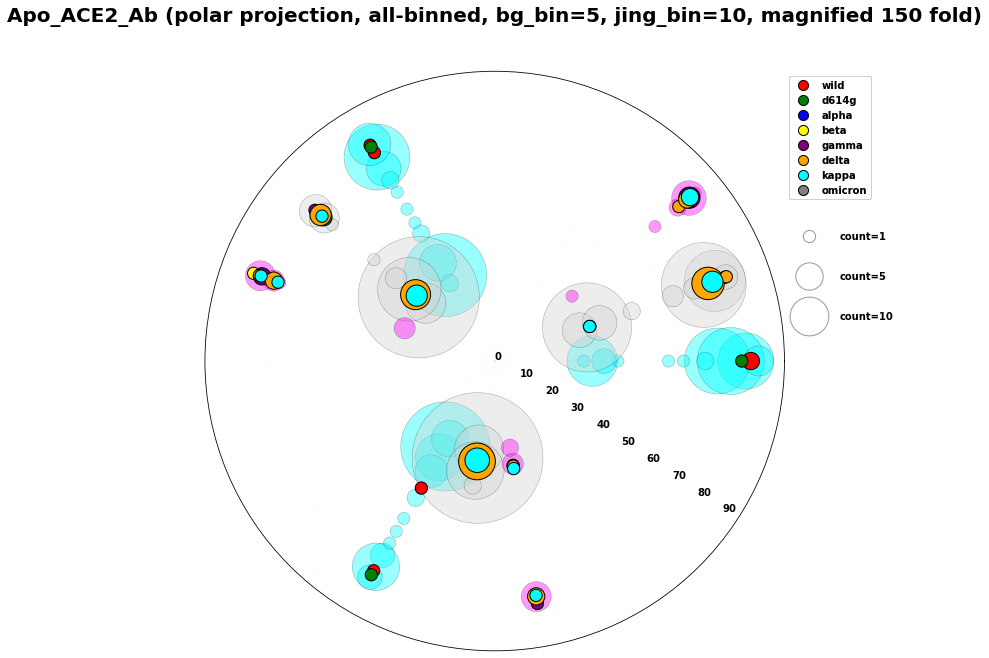

In [5]:
## Archived ##
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.patheffects as pe
from matplotlib.ticker import AutoMinorLocator

######## some paramaters ######## 
output_format = 'svg'
bin_jing_dt = True # default to True.
plot_jing_dt = True # plot for apo-only.
sep_by_variant = False # separate dif variants by 10 degrees. If False, separate by status (apo/ace2/ab).
bg_bin_number, jing_bin_number = 5, 10
magnify_factor = 150 # magnify the binned circles.
jing_unbinned_mkrsize = 200 # real size of jing's unbinned circles.
bg_alpha = 0.4
jing_alpha = 1
bg_linewidth = 0.4 # linewidth of the background circles.
jing_linewidth = 1 # linewidth of the jing's circles.
edgecolor = 'k' # edgecolor of the circles.
grid_thickness = 0.2
figL = 10
figW = 10
file = '20220308_VariantRBDSummaryWithSource.xlsx'
# status = 'Apo-form'
status = 'Apo_ACE2_Ab'
sheets = ['Ab_bound_pdb', 'apo_form_pdb', 'ace2_bound_pdb'] # the order is changed to avoid the overlapping.
bg_status_c = {'apo':'lightgray', 'ace2':'magenta', 'Ab':'cyan'}
# sheets = ['apo_form_pdb'] # the order is changed to avoid the overlapping.
# bg_status_c = {'apo':'lightgray'}
variant_c = {'A:wild':'red','B:d614g':'green','C:alpha':'blue','D:beta':'yellow','E:gamma':'purple','F:delta':'orange','G:kappa':'cyan','H:omicron':'grey'}
scale_counts = [1, 5, 10]
scales = [(magnify_factor*scale_counts[0])**0.5, (magnify_factor*scale_counts[1])**0.5, (magnify_factor*scale_counts[2])**0.5]
#################################

######## basic settings for polar plot ########
fig = plt.figure(figsize=(figL,figW))
ax = fig.add_subplot(111, projection='polar')
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
ax.set_xticks(np.pi/180. *np.linspace(0,  360, 36, endpoint=False)) # draw xticks per 10 degrees.
ax.set_yticks(np.arange(0, 95, 10))
ax.yaxis.set_tick_params(labelsize = 10)
ax.set_theta_zero_location('E')
ax.set_rlim(0, 95, 1)
# move away the ryticks
ax.set_rlabel_position(-33.75)
# hide azimuth labels.
ax.set_xticklabels([])
# relabel the y axis.
ax.yaxis.grid(True, which='minor')
ax.yaxis.set_minor_locator(AutoMinorLocator(2))
ax.grid(linewidth=grid_thickness, which='both') # optimize the thickness of both major & minor grids.
leg2_ypos = 0.75
borderpad = 1
labelspacing = 3
handletextpad = 2
leg2_frame = False
################################################

save_df_chA, save_df_chB, save_df_chC = [],[],[]
status_cnt = 0
for sheet in sheets:
    # add pdb data.
    apo_df = pd.read_excel(file, sheet_name = sheet, header = 0).fillna('other')
    # rename variant to adapt to the alpherical order.
    apo_df = apo_df.replace({'variant' : {'wild':'A:wild', 'd614g':'B:d614g', 'alpha':'C:alpha', 'beta':'D:beta', 'gamma':'E:gamma', 'delta':'F:delta', 'kappa':'G:kappa', 'omicron':'H:omicron'}})
    apo_df_chA = apo_df[['variant', 'PDB codes', 'A', 'rbd_status', 'source']]
    apo_df_chB = apo_df[['variant', 'PDB codes', 'B', 'rbd_status', 'source']]
    apo_df_chC = apo_df[['variant', 'PDB codes', 'C', 'rbd_status', 'source']]

    # (90 - theta) to get the angle from plane to rbd.
    apo_df_chA['90-A'] = 90 - apo_df_chA['A']
    apo_df_chB['90-B'] = 90 - apo_df_chB['B']
    apo_df_chC['90-C'] = 90 - apo_df_chC['C']
    
    if sep_by_variant:
        # calculate phi to separate dif. variants.
        # chain A
        apo_chA_variants = sorted(list(set(apo_df_chA['variant'])))
        var_cnt = 0
        for i in range(len(apo_chA_variants)):
            apo_df_chA.loc[(apo_df_chA['variant']==apo_chA_variants[var_cnt]), 'phi'] = 0 + 10*i
            var_cnt += 1
        # chain B
        apo_chB_variants = sorted(list(set(apo_df_chB['variant'])))
        var_cnt = 0
        for i in range(len(apo_chB_variants)):
            apo_df_chB.loc[(apo_df_chB['variant']==apo_chB_variants[var_cnt]), 'phi'] = 120 + 10*i
            var_cnt += 1
        # chain C
        apo_chC_variants = sorted(list(set(apo_df_chC['variant'])))
        var_cnt = 0
        for i in range(len(apo_chC_variants)):
            apo_df_chC.loc[(apo_df_chC['variant']==apo_chC_variants[var_cnt]), 'phi'] = 240 + 10*i
            var_cnt += 1

        # convert degrees into radians for radial x-axis.
        apo_df_chA[['phi']] = np.deg2rad(apo_df_chA[['phi']])
        apo_df_chB[['phi']] = np.deg2rad(apo_df_chB[['phi']])
        apo_df_chC[['phi']] = np.deg2rad(apo_df_chC[['phi']])

        # translate the data into spherical coords.
        thetaA = apo_df_chA['90-A']
        thetaB = apo_df_chB['90-B']
        thetaC = apo_df_chC['90-C']
        phiA = apo_df_chA['phi']
        phiB = apo_df_chB['phi']
        phiC = apo_df_chC['phi']

        ## BACKGROUND DATA
        # bin the data to plot like bubble plot.
        bins = np.arange(0, 95, bg_bin_number)
        apo_df_chA['binned_angle'] = pd.cut(apo_df_chA['90-A'], bins)
        apo_df_chA['f'] = apo_df_chA.groupby(['variant', 'binned_angle'])['binned_angle'].transform('size')
        apo_df_chB['binned_angle'] = pd.cut(apo_df_chB['90-B'], bins)
        apo_df_chB['f'] = apo_df_chB.groupby(['variant', 'binned_angle'])['binned_angle'].transform('size')
        apo_df_chC['binned_angle'] = pd.cut(apo_df_chC['90-C'], bins)
        apo_df_chC['f'] = apo_df_chC.groupby(['variant', 'binned_angle'])['binned_angle'].transform('size')

        # get avg within bin.
        apo_df_chA['90-A(avg)'] = apo_df_chA.groupby(['variant', 'binned_angle'])['90-A'].transform('mean')
        apo_df_chB['90-B(avg)'] = apo_df_chB.groupby(['variant', 'binned_angle'])['90-B'].transform('mean')
        apo_df_chC['90-C(avg)'] = apo_df_chC.groupby(['variant', 'binned_angle'])['90-C'].transform('mean')

        # save df first for Jing's analysis.
        save_df_chA.append(apo_df_chA)
        save_df_chB.append(apo_df_chB)
        save_df_chC.append(apo_df_chC)

        binnned_apo_chA_all = apo_df_chA[['phi', '90-A(avg)', 'f']].drop_duplicates().reset_index(drop=True)
        binnned_apo_chB_all = apo_df_chB[['phi', '90-B(avg)', 'f']].drop_duplicates().reset_index(drop=True)
        binnned_apo_chC_all = apo_df_chC[['phi', '90-C(avg)', 'f']].drop_duplicates().reset_index(drop=True)

        # get angles & freq.
        bg_thetaA = binnned_apo_chA_all['90-A(avg)']
        bg_thetaB = binnned_apo_chB_all['90-B(avg)']
        bg_thetaC = binnned_apo_chC_all['90-C(avg)']
        bg_phiA = binnned_apo_chA_all['phi']
        bg_phiB = binnned_apo_chB_all['phi']
        bg_phiC = binnned_apo_chC_all['phi']
        f_A = binnned_apo_chA_all['f']
        f_B = binnned_apo_chB_all['f']
        f_C = binnned_apo_chC_all['f']

        ax.scatter(bg_phiA, bg_thetaA, c=bg_status_c[sheet.split('_')[0]], s=f_A*magnify_factor, alpha=bg_alpha, edgecolors = edgecolor, linewidth = bg_linewidth)
        ax.scatter(bg_phiB, bg_thetaB, c=bg_status_c[sheet.split('_')[0]], s=f_B*magnify_factor, alpha=bg_alpha, edgecolors = edgecolor, linewidth = bg_linewidth)
        ax.scatter(bg_phiC, bg_thetaC, c=bg_status_c[sheet.split('_')[0]], s=f_C*magnify_factor, alpha=bg_alpha, edgecolors = edgecolor, linewidth = bg_linewidth)
        # plot title
        plt.title(label = f"{status} (polar projection, binned background data, bg_bin={bg_bin_number}, magnified {magnify_factor} fold)", weight = 'bold', fontsize = 20, pad = 50)

        # cutomized legend
        mkrs = []
        for var, c in bg_status_c.items():
            mkr = mlines.Line2D([], [], color=c, marker='o', linewidth=0,
                                  markersize=10, label=var, alpha=bg_alpha, markeredgecolor=edgecolor)
            mkrs.append(mkr)
        leg1 = plt.legend(handles=mkrs, bbox_to_anchor=(1,1), loc='upper left')
        plt.gca().add_artist(leg1)
        
        # scale bars to show the freq represented by the circles.
        scalebars = []
        f_cnt = 0
        for s in scales:
            scalebar = mlines.Line2D([], [], color='white', marker='o', linewidth=0,
                                  markersize=s, label=f'count={scale_counts[f_cnt]}', alpha=bg_alpha, markeredgecolor=edgecolor)
            scalebars.append(scalebar)
            f_cnt += 1
        plt.legend(handles=scalebars, bbox_to_anchor=(1,leg2_ypos), loc='upper left', borderpad = borderpad, labelspacing = labelspacing, handletextpad = handletextpad, frameon = leg2_frame)

        plt.tight_layout()
        plt.savefig(f"{status} (polar projection, binned background data, bg_bin={bg_bin_number}, magnified {magnify_factor} fold).{output_format}", bbox_inches='tight')
    else: # sep by status (apo/ace2/ab)
        # assign phi to separate dif. status.
        # chain A
        apo_df_chA['phi'] = np.deg2rad(0 + 20*status_cnt)
        # chain B
        apo_df_chB['phi'] = np.deg2rad(120 + 20*status_cnt)
        # chain C
        apo_df_chC['phi'] = np.deg2rad(240 + 20*status_cnt)
        
        status_cnt+=1 # iterate to next status

        # translate the data into spherical coords.
        thetaA = apo_df_chA['90-A']
        thetaB = apo_df_chB['90-B']
        thetaC = apo_df_chC['90-C']
        phiA = apo_df_chA['phi']
        phiB = apo_df_chB['phi']
        phiC = apo_df_chC['phi']
        
        ## BACKGROUND DATA
        # bin the data to plot like bubble plot.
        bins = np.arange(0, 95, bg_bin_number)
        apo_df_chA['binned_angle'] = pd.cut(apo_df_chA['90-A'], bins)
        apo_df_chA['f'] = apo_df_chA.groupby(['binned_angle'])['binned_angle'].transform('size')
        apo_df_chB['binned_angle'] = pd.cut(apo_df_chB['90-B'], bins)
        apo_df_chB['f'] = apo_df_chB.groupby(['binned_angle'])['binned_angle'].transform('size')
        apo_df_chC['binned_angle'] = pd.cut(apo_df_chC['90-C'], bins)
        apo_df_chC['f'] = apo_df_chC.groupby(['binned_angle'])['binned_angle'].transform('size')

        # get avg within bin.
        apo_df_chA['90-A(avg)'] = apo_df_chA.groupby(['binned_angle'])['90-A'].transform('mean')
        apo_df_chB['90-B(avg)'] = apo_df_chB.groupby(['binned_angle'])['90-B'].transform('mean')
        apo_df_chC['90-C(avg)'] = apo_df_chC.groupby(['binned_angle'])['90-C'].transform('mean')

        # save df first for Jing's analysis.
        save_df_chA.append(apo_df_chA)
        save_df_chB.append(apo_df_chB)
        save_df_chC.append(apo_df_chC)

        binnned_apo_chA_all = apo_df_chA[['phi', '90-A(avg)', 'f']].drop_duplicates().reset_index(drop=True)
        binnned_apo_chB_all = apo_df_chB[['phi', '90-B(avg)', 'f']].drop_duplicates().reset_index(drop=True)
        binnned_apo_chC_all = apo_df_chC[['phi', '90-C(avg)', 'f']].drop_duplicates().reset_index(drop=True)

        # get angles & freq.
        bg_thetaA = binnned_apo_chA_all['90-A(avg)']
        bg_thetaB = binnned_apo_chB_all['90-B(avg)']
        bg_thetaC = binnned_apo_chC_all['90-C(avg)']
        bg_phiA = binnned_apo_chA_all['phi']
        bg_phiB = binnned_apo_chB_all['phi']
        bg_phiC = binnned_apo_chC_all['phi']
        f_A = binnned_apo_chA_all['f']
        f_B = binnned_apo_chB_all['f']
        f_C = binnned_apo_chC_all['f']

        ax.scatter(bg_phiA, bg_thetaA, c=bg_status_c[sheet.split('_')[0]], s=f_A*magnify_factor, alpha=bg_alpha, edgecolors = edgecolor, linewidth = bg_linewidth)
        ax.scatter(bg_phiB, bg_thetaB, c=bg_status_c[sheet.split('_')[0]], s=f_B*magnify_factor, alpha=bg_alpha, edgecolors = edgecolor, linewidth = bg_linewidth)
        ax.scatter(bg_phiC, bg_thetaC, c=bg_status_c[sheet.split('_')[0]], s=f_C*magnify_factor, alpha=bg_alpha, edgecolors = edgecolor, linewidth = bg_linewidth)
        # plot title
        plt.title(label = f"{status} (polar projection, binned background data, bg_bin={bg_bin_number}, magnified {magnify_factor} fold)", weight = 'bold', fontsize = 20, pad = 50)

        # cutomized legend
        mkrs = []
        for var, c in bg_status_c.items():
            mkr = mlines.Line2D([], [], color=c, marker='o', linewidth=0,
                                  markersize=10, label=var, alpha=bg_alpha, markeredgecolor=edgecolor)
            mkrs.append(mkr)
        leg1 = plt.legend(handles=mkrs, bbox_to_anchor=(1,1), loc='upper left')
        plt.gca().add_artist(leg1)
        
        # scale bars to show the freq represented by the circles.
        scalebars = []
        f_cnt = 0
        for s in scales:
            scalebar = mlines.Line2D([], [], color='white', marker='o', linewidth=0,
                                  markersize=s, label=f'count={scale_counts[f_cnt]}', alpha=bg_alpha, markeredgecolor=edgecolor)
            scalebars.append(scalebar)
            f_cnt += 1
        plt.legend(handles=scalebars, bbox_to_anchor=(1,leg2_ypos), loc='upper left', borderpad = borderpad, labelspacing = labelspacing, handletextpad = handletextpad, frameon = leg2_frame)
        
        plt.tight_layout()
        plt.savefig(f"{status} (polar projection, binned background data, bg_bin={bg_bin_number}, magnified {magnify_factor} fold).{output_format}", bbox_inches='tight')
        
if plot_jing_dt:
    for i in range(len(save_df_chA)):
        apo_df_chA, apo_df_chB, apo_df_chC = save_df_chA[i], save_df_chB[i], save_df_chC[i] 
        ## JING'S DATA 
        # chain A
        jing_apo_chA = apo_df_chA.loc[(apo_df_chA['source']!='other')]
        # # chain B
        jing_apo_chB = apo_df_chB.loc[(apo_df_chB['source']!='other')]
        # # chain C
        jing_apo_chC = apo_df_chC.loc[(apo_df_chC['source']!='other')]

        if bin_jing_dt:
            bins = np.arange(0, 95, jing_bin_number)
            if sep_by_variant:
                # re-bin the data to plot like bubble plot.
                jing_apo_chA['binned_angle'] = pd.cut(jing_apo_chA['90-A'], bins)
                jing_apo_chA['f'] = jing_apo_chA.groupby(['variant', 'binned_angle'])['binned_angle'].transform('size')
                jing_apo_chB['binned_angle'] = pd.cut(jing_apo_chB['90-B'], bins)
                jing_apo_chB['f'] = jing_apo_chB.groupby(['variant', 'binned_angle'])['binned_angle'].transform('size')
                jing_apo_chC['binned_angle'] = pd.cut(jing_apo_chC['90-C'], bins)
                jing_apo_chC['f'] = jing_apo_chC.groupby(['variant', 'binned_angle'])['binned_angle'].transform('size')

                # re-calculate avg within bin.
                jing_apo_chA['90-A(avg)'] = jing_apo_chA.groupby(['variant', 'binned_angle'])['90-A'].transform('mean')
                jing_apo_chB['90-B(avg)'] = jing_apo_chB.groupby(['variant', 'binned_angle'])['90-B'].transform('mean')
                jing_apo_chC['90-C(avg)'] = jing_apo_chC.groupby(['variant', 'binned_angle'])['90-C'].transform('mean')

                binnned_jing_apo_chA = jing_apo_chA[['variant', 'phi', '90-A(avg)', 'f']].drop_duplicates().reset_index(drop=True)
                binnned_jing_apo_chB = jing_apo_chB[['variant', 'phi', '90-B(avg)', 'f']].drop_duplicates().reset_index(drop=True)
                binnned_jing_apo_chC = jing_apo_chC[['variant', 'phi', '90-C(avg)', 'f']].drop_duplicates().reset_index(drop=True)
                binnned_jing_apo_chA.to_excel('20220310_binnned_jing_apo_chA.xlsx', index=False)
                binnned_jing_apo_chB.to_excel('20220310_binnned_jing_apo_chB.xlsx', index=False)
                binnned_jing_apo_chC.to_excel('20220310_binnned_jing_apo_chC.xlsx', index=False)

                thetaA = binnned_jing_apo_chA['90-A(avg)']
                thetaB = binnned_jing_apo_chB['90-B(avg)']
                thetaC = binnned_jing_apo_chC['90-C(avg)']
                phiA = binnned_jing_apo_chA['phi']
                phiB = binnned_jing_apo_chB['phi']
                phiC = binnned_jing_apo_chC['phi']
                f_A = binnned_jing_apo_chA['f']
                f_B = binnned_jing_apo_chB['f']
                f_C = binnned_jing_apo_chC['f']

                ax.scatter(phiA, thetaA, c=binnned_jing_apo_chA['variant'].map(variant_c), marker='o', s=f_A*magnify_factor, alpha=jing_alpha, edgecolors = edgecolor, linewidth = jing_linewidth)
                ax.scatter(phiB, thetaB, c=binnned_jing_apo_chB['variant'].map(variant_c), marker='o', s=f_B*magnify_factor, alpha=jing_alpha, edgecolors = edgecolor, linewidth = jing_linewidth)
                ax.scatter(phiC, thetaC, c=binnned_jing_apo_chC['variant'].map(variant_c), marker='o', s=f_C*magnify_factor, alpha=jing_alpha, edgecolors = edgecolor, linewidth = jing_linewidth)

                # plot title
                plt.title(label = f"{status} (polar projection, all-binned, bg_bin={bg_bin_number}, jing_bin={jing_bin_number}, magnified {magnify_factor} fold)", weight = 'bold', fontsize = 20, pad = 50)

                # cutomized legend
                mkrs = []
                for var, c in variant_c.items():
                    mkr = mlines.Line2D([], [], color=c, marker='o', linewidth=0,
                                          markersize=10, label=var[2:], alpha=jing_alpha, markeredgecolor='k')
                    mkrs.append(mkr)
                leg1 = plt.legend(handles=mkrs, bbox_to_anchor=(1,1), loc='upper left')
                plt.gca().add_artist(leg1)
                
                # scale bars to show the freq represented by the circles.
                scalebars = []
                f_cnt = 0
                for s in scales:
                    scalebar = mlines.Line2D([], [], color='white', marker='o', linewidth=0,
                                          markersize=s, label=f'count={scale_counts[f_cnt]}', alpha=bg_alpha, markeredgecolor=edgecolor)
                    scalebars.append(scalebar)
                    f_cnt += 1
                plt.legend(handles=scalebars, bbox_to_anchor=(1,leg2_ypos), loc='upper left', borderpad = borderpad, labelspacing = labelspacing, handletextpad = handletextpad, frameon = leg2_frame)

                plt.tight_layout()
                plt.savefig(f"{status} (polar projection, all-binned, bg_bin={bg_bin_number}, jing_bin={jing_bin_number}, magnified {magnify_factor} fold).{output_format}", bbox_inches='tight')
            else: # sep by status (apo/ace2/ab)
                # re-bin the data to plot like bubble plot.
                jing_apo_chA['binned_angle'] = pd.cut(jing_apo_chA['90-A'], bins)
                jing_apo_chA['f'] = jing_apo_chA.groupby(['variant', 'binned_angle'])['binned_angle'].transform('size')
                jing_apo_chB['binned_angle'] = pd.cut(jing_apo_chB['90-B'], bins)
                jing_apo_chB['f'] = jing_apo_chB.groupby(['variant', 'binned_angle'])['binned_angle'].transform('size')
                jing_apo_chC['binned_angle'] = pd.cut(jing_apo_chC['90-C'], bins)
                jing_apo_chC['f'] = jing_apo_chC.groupby(['variant', 'binned_angle'])['binned_angle'].transform('size')

                # re-calculate avg within bin.
                jing_apo_chA['90-A(avg)'] = jing_apo_chA.groupby(['variant', 'binned_angle'])['90-A'].transform('mean')
                jing_apo_chB['90-B(avg)'] = jing_apo_chB.groupby(['variant', 'binned_angle'])['90-B'].transform('mean')
                jing_apo_chC['90-C(avg)'] = jing_apo_chC.groupby(['variant', 'binned_angle'])['90-C'].transform('mean')

                binnned_jing_apo_chA = jing_apo_chA[['variant', 'phi', '90-A(avg)', 'f']].drop_duplicates().reset_index(drop=True)
                binnned_jing_apo_chB = jing_apo_chB[['variant', 'phi', '90-B(avg)', 'f']].drop_duplicates().reset_index(drop=True)
                binnned_jing_apo_chC = jing_apo_chC[['variant', 'phi', '90-C(avg)', 'f']].drop_duplicates().reset_index(drop=True)

                thetaA = binnned_jing_apo_chA['90-A(avg)']
                thetaB = binnned_jing_apo_chB['90-B(avg)']
                thetaC = binnned_jing_apo_chC['90-C(avg)']
                phiA = binnned_jing_apo_chA['phi']
                phiB = binnned_jing_apo_chB['phi']
                phiC = binnned_jing_apo_chC['phi']
                f_A = binnned_jing_apo_chA['f']
                f_B = binnned_jing_apo_chB['f']
                f_C = binnned_jing_apo_chC['f']

                ax.scatter(phiA, thetaA, c=binnned_jing_apo_chA['variant'].map(variant_c), marker='o', s=f_A*magnify_factor, alpha=jing_alpha, edgecolors = edgecolor, linewidth = jing_linewidth)
                ax.scatter(phiB, thetaB, c=binnned_jing_apo_chB['variant'].map(variant_c), marker='o', s=f_B*magnify_factor, alpha=jing_alpha, edgecolors = edgecolor, linewidth = jing_linewidth)
                ax.scatter(phiC, thetaC, c=binnned_jing_apo_chC['variant'].map(variant_c), marker='o', s=f_C*magnify_factor, alpha=jing_alpha, edgecolors = edgecolor, linewidth = jing_linewidth)

                # plot title
                plt.title(label = f"{status} (polar projection, all-binned, bg_bin={bg_bin_number}, jing_bin={jing_bin_number}, magnified {magnify_factor} fold)", weight = 'bold', fontsize = 20, pad = 50)

                # cutomized legend
                mkrs = []
                for var, c in variant_c.items():
                    mkr = mlines.Line2D([], [], color=c, marker='o', linewidth=0,
                                          markersize=10, label=var[2:], alpha=jing_alpha, markeredgecolor='k')
                    mkrs.append(mkr)
                leg1 = plt.legend(handles=mkrs, bbox_to_anchor=(1,1), loc='upper left')
                plt.gca().add_artist(leg1)
                
                # scale bars to show the freq represented by the circles.
                scalebars = []
                f_cnt = 0
                for s in scales:
                    scalebar = mlines.Line2D([], [], color='white', marker='o', linewidth=0,
                                          markersize=s, label=f'count={scale_counts[f_cnt]}', alpha=bg_alpha, markeredgecolor=edgecolor)
                    scalebars.append(scalebar)
                    f_cnt += 1
                plt.legend(handles=scalebars, bbox_to_anchor=(1,leg2_ypos), loc='upper left', borderpad = borderpad, labelspacing = labelspacing, handletextpad = handletextpad, frameon = leg2_frame)
                
                plt.tight_layout()
                plt.savefig(f"{status} (polar projection, all-binned, bg_bin={bg_bin_number}, jing_bin={jing_bin_number}, magnified {magnify_factor} fold).{output_format}", bbox_inches='tight')
        else:
            if sep_by_variant:
                thetaA = jing_apo_chA['90-A']
                thetaB = jing_apo_chB['90-B']
                thetaC = jing_apo_chC['90-C']
                phiA = jing_apo_chA['phi']
                phiB = jing_apo_chB['phi']
                phiC = jing_apo_chC['phi']

                ax.scatter(phiA, thetaA, c=jing_apo_chA['variant'].map(variant_c), marker='o', s=jing_unbinned_mkrsize, alpha=jing_alpha, edgecolors = edgecolor, linewidth = jing_linewidth)
                ax.scatter(phiB, thetaB, c=jing_apo_chB['variant'].map(variant_c), marker='o', s=jing_unbinned_mkrsize, alpha=jing_alpha, edgecolors = edgecolor, linewidth = jing_linewidth)
                ax.scatter(phiC, thetaC, c=jing_apo_chC['variant'].map(variant_c), marker='o', s=jing_unbinned_mkrsize, alpha=jing_alpha, edgecolors = edgecolor, linewidth = jing_linewidth)

                # plot title
                plt.title(label = f"{status} (polar projection, un-binned Jing's data, bg_bin={bg_bin_number}, magnified {magnify_factor} fold)", weight = 'bold', fontsize = 20, pad = 50)

                # cutomized legend
                mkrs = []
                for var, c in variant_c.items():
                    mkr = mlines.Line2D([], [], color=c, marker='o', linewidth=0,
                                          markersize=10, label=var[2:], alpha=jing_alpha, markeredgecolor='k')
                    mkrs.append(mkr)
                leg1 = plt.legend(handles=mkrs, bbox_to_anchor=(1,1), loc='upper left')
                plt.gca().add_artist(leg1)
                
                # scale bars to show the freq represented by the circles.
                scalebars = []
                f_cnt = 0
                for s in scales:
                    scalebar = mlines.Line2D([], [], color='white', marker='o', linewidth=0,
                                          markersize=s, label=f'count={scale_counts[f_cnt]}', alpha=bg_alpha, markeredgecolor=edgecolor)
                    scalebars.append(scalebar)
                    f_cnt += 1
                plt.legend(handles=scalebars, bbox_to_anchor=(1,leg2_ypos), loc='upper left', borderpad = borderpad, labelspacing = labelspacing, handletextpad = handletextpad, frameon = leg2_frame)

                plt.tight_layout()
                plt.savefig(f"{status} (polar projection, un-binned Jing's data, bg_bin={bg_bin_number}, magnified {magnify_factor} fold).{output_format}", bbox_inches='tight')
            else: # sep by status (apo/ace2/ab)
                thetaA = jing_apo_chA['90-A']
                thetaB = jing_apo_chB['90-B']
                thetaC = jing_apo_chC['90-C']
                phiA = jing_apo_chA['phi']
                phiB = jing_apo_chB['phi']
                phiC = jing_apo_chC['phi']

                ax.scatter(phiA, thetaA, c=jing_apo_chA['variant'].map(variant_c), marker='o', s=jing_unbinned_mkrsize, alpha=jing_alpha, edgecolors = edgecolor, linewidth = jing_linewidth)
                ax.scatter(phiB, thetaB, c=jing_apo_chB['variant'].map(variant_c), marker='o', s=jing_unbinned_mkrsize, alpha=jing_alpha, edgecolors = edgecolor, linewidth = jing_linewidth)
                ax.scatter(phiC, thetaC, c=jing_apo_chC['variant'].map(variant_c), marker='o', s=jing_unbinned_mkrsize, alpha=jing_alpha, edgecolors = edgecolor, linewidth = jing_linewidth)

                # plot title
                plt.title(label = f"{status} (polar projection, un-binned Jing's data, bg_bin={bg_bin_number}, magnified {magnify_factor} fold)", weight = 'bold', fontsize = 20, pad = 50)

                # cutomized legend
                mkrs = []
                for var, c in variant_c.items():
                    mkr = mlines.Line2D([], [], color=c, marker='o', linewidth=0,
                                          markersize=10, label=var[2:], alpha=jing_alpha, markeredgecolor='k')
                    mkrs.append(mkr)
                leg1 = plt.legend(handles=mkrs, bbox_to_anchor=(1,1), loc='upper left')
                plt.gca().add_artist(leg1)
                
                # scale bars to show the freq represented by the circles.
                scalebars = []
                f_cnt = 0
                for s in scales:
                    scalebar = mlines.Line2D([], [], color='white', marker='o', linewidth=0,
                                          markersize=s, label=f'count={scale_counts[f_cnt]}', alpha=bg_alpha, markeredgecolor=edgecolor)
                    scalebars.append(scalebar)
                    f_cnt += 1
                plt.legend(handles=scalebars, bbox_to_anchor=(1,leg2_ypos), loc='upper left', borderpad = borderpad, labelspacing = labelspacing, handletextpad = handletextpad, frameon = leg2_frame)

                plt.tight_layout()
                plt.savefig(f"{status} (polar projection, un-binned Jing's data, bg_bin={bg_bin_number}, magnified {magnify_factor} fold).{output_format}", bbox_inches='tight')         

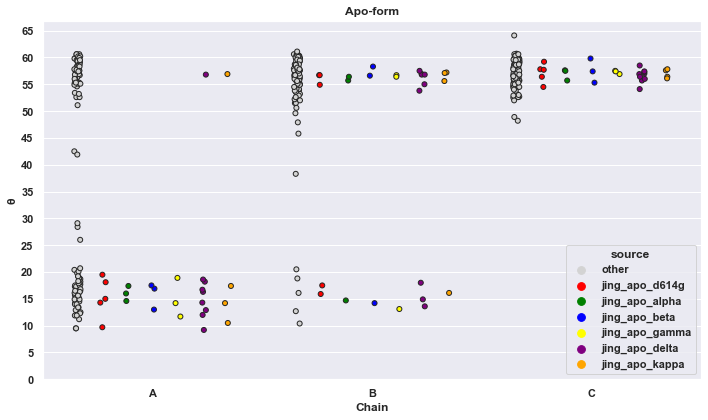

In [29]:
## Archived ##
## Try plotting apo-form first.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

# file = pd.ExcelFile('20220304_VariantRBDSummary.xlsx')
# sheets = file.sheet_names
# print(sheets)
# jing_apo = pd.read_excel('20220304_VariantRBDSummary.xlsx', sheet_name = 'Jing_apo_form_pdb', header = 0)
# jing_ace2 = pd.read_excel('20220304_VariantRBDSummary.xlsx', sheet_name = 'Jing_ace2_bound_pdb', header = 0)
# jing_ab = pd.read_excel('20220304_VariantRBDSummary.xlsx', sheet_name = 'Jing_Ab_bound_pdb', header = 0)
# jing_apo_pdbcodes, jing_ace2_pdbcodes, jing_ab_pdbcodes = jing_apo['PDB codes'].tolist(), jing_ace2['PDB codes'].tolist(), jing_ab['PDB codes'].tolist()

# apo = pd.read_excel('20220304_VariantRBDSummary.xlsx', sheet_name = 'apo_form_pdb', header = 0)
# ace2 = pd.read_excel('20220304_VariantRBDSummary.xlsx', sheet_name = 'ace2_bound_pdb', header = 0)
# ab = pd.read_excel('20220304_VariantRBDSummary.xlsx', sheet_name = 'Ab_bound_pdb', header = 0)
# # note the data source.
# # apo wild/d614g/alpha/beta/delta/gamma/kappa/omicron.
# apo.loc[(apo['PDB codes'].isin(jing_apo_pdbcodes))&(apo['variant']=='wild'), 'source'] = 'jing_apo_wild'
# apo.loc[(apo['PDB codes'].isin(jing_apo_pdbcodes))&(apo['variant']=='d614g'), 'source'] = 'jing_apo_d614g'
# apo.loc[(apo['PDB codes'].isin(jing_apo_pdbcodes))&(apo['variant']=='alpha'), 'source'] = 'jing_apo_alpha'
# apo.loc[(apo['PDB codes'].isin(jing_apo_pdbcodes))&(apo['variant']=='beta'), 'source'] = 'jing_apo_beta'
# apo.loc[(apo['PDB codes'].isin(jing_apo_pdbcodes))&(apo['variant']=='delta'), 'source'] = 'jing_apo_delta'
# apo.loc[(apo['PDB codes'].isin(jing_apo_pdbcodes))&(apo['variant']=='gamma'), 'source'] = 'jing_apo_gamma'
# apo.loc[(apo['PDB codes'].isin(jing_apo_pdbcodes))&(apo['variant']=='kappa'), 'source'] = 'jing_apo_kappa'
# apo.loc[(apo['PDB codes'].isin(jing_apo_pdbcodes))&(apo['variant']=='omicron'), 'source'] = 'jing_apo_omicron'
# # ace2-bound wild/d614g/alpha/beta/delta/gamma/kappa/omicron.
# ace2.loc[(ace2['PDB codes'].isin(jing_ace2_pdbcodes))&(ace2['variant']=='wild'), 'source'] = 'jing_ace2_wild'
# ace2.loc[(ace2['PDB codes'].isin(jing_ace2_pdbcodes))&(ace2['variant']=='d614g'), 'source'] = 'jing_ace2_d614g'
# ace2.loc[(ace2['PDB codes'].isin(jing_ace2_pdbcodes))&(ace2['variant']=='alpha'), 'source'] = 'jing_ace2_alpha'
# ace2.loc[(ace2['PDB codes'].isin(jing_ace2_pdbcodes))&(ace2['variant']=='beta'), 'source'] = 'jing_ace2_beta'
# ace2.loc[(ace2['PDB codes'].isin(jing_ace2_pdbcodes))&(ace2['variant']=='delta'), 'source'] = 'jing_ace2_delta'
# ace2.loc[(ace2['PDB codes'].isin(jing_ace2_pdbcodes))&(ace2['variant']=='gamma'), 'source'] = 'jing_ace2_gamma'
# ace2.loc[(ace2['PDB codes'].isin(jing_ace2_pdbcodes))&(ace2['variant']=='kappa'), 'source'] = 'jing_ace2_kappa'
# ace2.loc[(ace2['PDB codes'].isin(jing_ace2_pdbcodes))&(ace2['variant']=='omicron'), 'source'] = 'jing_ace2_omicron'
# # ab-bound wild/d614g/alpha/beta/delta/gamma/kappa/omicron.
# ab.loc[(ab['PDB codes'].isin(jing_ab_pdbcodes))&(ab['variant']=='wild'), 'source'] = 'jing_ab_wild'
# ab.loc[(ab['PDB codes'].isin(jing_ab_pdbcodes))&(ab['variant']=='d614g'), 'source'] = 'jing_ab_d614g'
# ab.loc[(ab['PDB codes'].isin(jing_ab_pdbcodes))&(ab['variant']=='alpha'), 'source'] = 'jing_ab_alpha'
# ab.loc[(ab['PDB codes'].isin(jing_ab_pdbcodes))&(ab['variant']=='beta'), 'source'] = 'jing_ab_beta'
# ab.loc[(ab['PDB codes'].isin(jing_ab_pdbcodes))&(ab['variant']=='gamma'), 'source'] = 'jing_ab_gamma'
# ab.loc[(ab['PDB codes'].isin(jing_ab_pdbcodes))&(ab['variant']=='delta'), 'source'] = 'jing_ab_delta'
# ab.loc[(ab['PDB codes'].isin(jing_ab_pdbcodes))&(ab['variant']=='kappa'), 'source'] = 'jing_ab_kappa'
# ab.loc[(ab['PDB codes'].isin(jing_ab_pdbcodes))&(ab['variant']=='omicron'), 'source'] = 'jing_ab_omicron'

# dfs = [apo, ace2, ab, jing_apo, jing_ace2, jing_ab]
# sheet_cnt = 0
# with pd.ExcelWriter('20220308_VariantRBDSummaryWithSource.xlsx') as writer:
#     for df in dfs:
#         df.to_excel(writer, sheet_name = f'{sheets[sheet_cnt]}', index = False)
#         sheet_cnt += 1

file = pd.ExcelFile('20220308_VariantRBDSummaryWithSource.xlsx')
sheets = file.sheet_names[:3]
apo = pd.read_excel('20220308_VariantRBDSummaryWithSource.xlsx', sheet_name = 'apo_form_pdb', header = 0).fillna('other')
# ace2 = pd.read_excel('20220308_VariantRBDSummaryWithSource.xlsx', sheet_name = 'ace2_bound_pdb', header = 0).fillna('other')
# ab = pd.read_excel('20220308_VariantRBDSummaryWithSource.xlsx', sheet_name = 'Ab_bound_pdb', header = 0).fillna('other')
# sources = sorted(list(set(apo['source'].tolist()+ace2['source'].tolist()+ab['source'].tolist())))
sources = sorted(list(set(apo['source'].tolist())))

# morph the df to plot stripplot in new format.
apo_chA = apo[['variant', 'PDB codes', 'A', 'rbd_status', 'source']].rename(columns={'A':'angle'})
apo_chA['chain'] = 'A'
apo_chB = apo[['variant', 'PDB codes', 'B', 'rbd_status', 'source']].rename(columns={'B':'angle'})
apo_chB['chain'] = 'B'
apo_chC = apo[['variant', 'PDB codes', 'C', 'rbd_status', 'source']].rename(columns={'C':'angle'})
apo_chC['chain'] = 'C'
apo_df = pd.concat([apo_chA, apo_chB, apo_chC], axis = 0)
# ace2_chA = ace2[['variant', 'PDB codes', 'A', 'rbd_status', 'source']].rename(columns={'A':'angle'})
# ace2_chB = ace2[['variant', 'PDB codes', 'B', 'rbd_status', 'source']].rename(columns={'B':'angle'})
# ace2_chC = ace2[['variant', 'PDB codes', 'C', 'rbd_status', 'source']].rename(columns={'C':'angle'})
# ace2_df = pd.concat([ace2_chA, ace2_chB, ace2_chC], axis = 0)

# ab_chA = ab[['variant', 'PDB codes', 'A', 'rbd_status', 'source']].rename(columns={'A':'angle'})
# ab_chB = ab[['variant', 'PDB codes', 'B', 'rbd_status', 'source']].rename(columns={'B':'angle'})
# ab_chC = ab[['variant', 'PDB codes', 'C', 'rbd_status', 'source']].rename(columns={'C':'angle'})
# ab_df = pd.concat([ab_chA, ab_chB, ab_chC], axis = 0)

# for sheet in sheets:
#     # strip plot to show angle distribution in each variant.
#     plt.figure(figsize=(10,6))
#     plt.clf()
#     sns.set_theme() # default theme.
    
#     other = sns.stripplot(x = 'Chain', y = 'A', data = df, marker = 'o', linewidth = 1)
#     c.set(xlabel='Variant', ylabel='θ', yticks=(np.arange(0, 70, 5)))
#     plt.xticks(rotation=45)
#     # cutomized legend
#     circle = mlines.Line2D([], [], color='gray', marker='o', linestyle='',
#                           markersize=10, label='Chain A')
#     triangle = mlines.Line2D([], [], color='gray', marker='^', linestyle='',
#                           markersize=10, label='Chain B')
#     diamond = mlines.Line2D([], [], color='gray', marker='D', linestyle='',
#                           markersize=10, label='Chain C')
#     plt.legend(handles=[circle, triangle, diamond], bbox_to_anchor=(1,1), loc='upper left')
    
#     # plot title
#     plt.title(label = f'{sheet}', weight = 'bold')
    
#     plt.tight_layout()
# #     plt.savefig(f'{sheet}.png', bbox_inches='tight')
    
# # sheet_cnt = 0
# # with pd.ExcelWriter('20220304_VariantRBDSummary.xlsx') as writer:
# #     for df in dfs:
# #         df.to_excel(writer, sheet_name = f'{sheets[sheet_cnt]}', index = False)
# #         sheet_cnt += 1

# strip plot to show angle distribution in each chain.
c_palette = ['lightgrey','red','green','blue','yellow','purple','orange']
plt.figure(figsize=(10,6))
plt.clf()
sns.set_theme() # default theme.

apo_plt = sns.stripplot(x = 'chain', y = 'angle', hue = 'source', palette = c_palette, data = apo_df, marker = 'o', linewidth = 1, dodge=True, jitter = 1)
apo_plt.set(xlabel='Chain', ylabel='θ', yticks=(np.arange(0, 70, 5)))
plt.xticks(rotation=0)

# # cutomized legend
# circle = mlines.Line2D([], [], color='gray', marker='o', linestyle='',
#                       markersize=10, label='Chain A')
# triangle = mlines.Line2D([], [], color='gray', marker='^', linestyle='',
#                       markersize=10, label='Chain B')
# diamond = mlines.Line2D([], [], color='gray', marker='D', linestyle='',
#                       markersize=10, label='Chain C')
# plt.legend(handles=[circle, triangle, diamond], bbox_to_anchor=(1,1), loc='upper left')

# plot title
plt.title(label = 'Apo-form', weight = 'bold')
plt.tight_layout()
# plt.savefig('Apo-form.png', bbox_inches='tight')

<IPython.core.display.Javascript object>


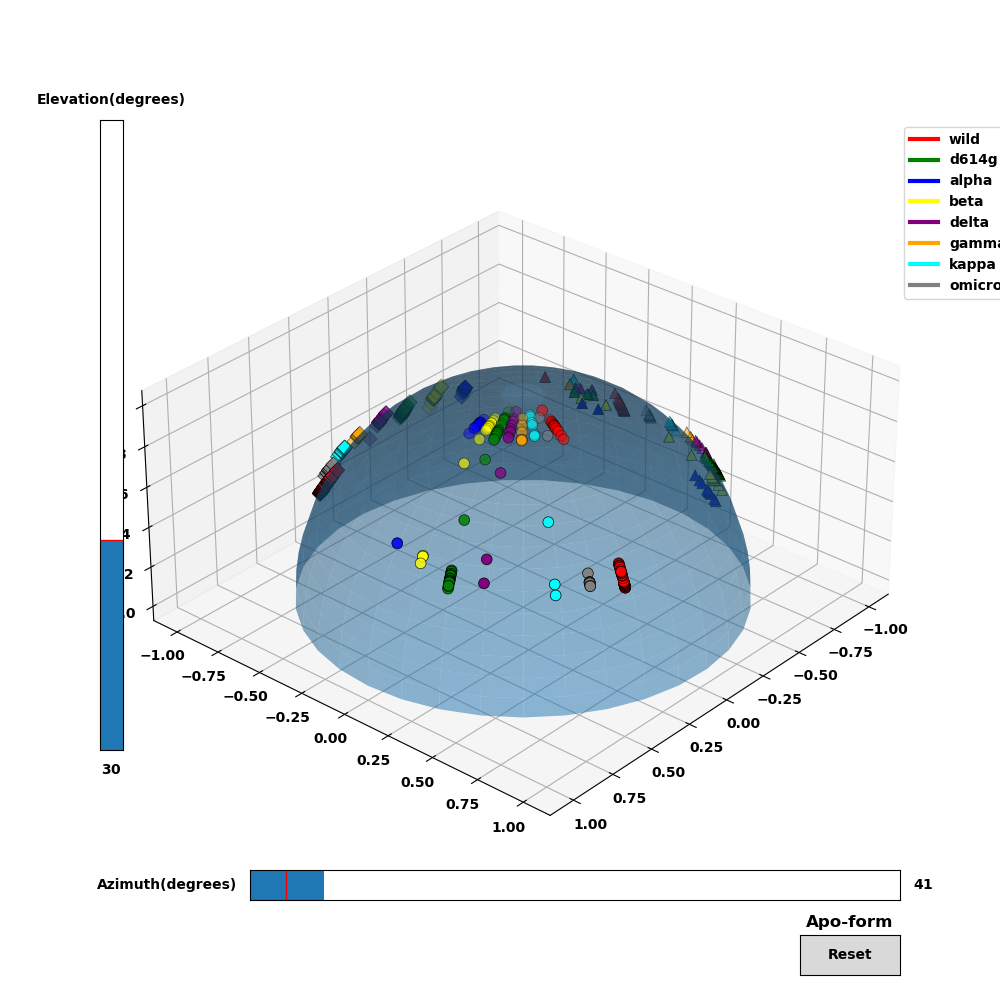

/var/folders/cz/ccvjhv9j3_5dm3x2zf9ps__80000gp/T/ipykernel_2794/540143453.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apo_df_chA.loc[(apo_df_chA['variant']==apo_chA_variants[var_cnt]), 'phi'] = 0 + 10*i
/var/folders/cz/ccvjhv9j3_5dm3x2zf9ps__80000gp/T/ipykernel_2794/540143453.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apo_df_chB.loc[(apo_df_chB['variant']==apo_chB_variants[var_cnt]), 'phi'] = 120 + 10*i
/var/folders/cz/ccvjhv9j3_5dm3x2zf9ps__80000gp/T/ipykernel_2794/540143453.py:49: Setti

In [9]:
## Archived ##
# %matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from mpl_toolkits import mplot3d
from matplotlib.widgets import Slider, Button

# creating a hemisphere.
n_theta = 18 # number of values for theta
n_phi = 36   # number of values for phi
r = 1        # radius of sphere
theta, phi = np.mgrid[0.0:0.5*np.pi:n_theta*1j, 0.0:2.0*np.pi:n_phi*1j]

x = r*np.sin(theta)*np.cos(phi)
y = r*np.sin(theta)*np.sin(phi)
z = r*np.cos(theta)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, rstride=1, cstride=1, linewidth=0, alpha=0.5) 
# add pdb data.
apo_df = pd.read_excel('20220308_VariantRBDSummaryWithSource.xlsx', sheet_name = 'apo_form_pdb', header = 0).fillna('other')
apo_df_chA = apo_df[['variant', 'PDB codes', 'A', 'rbd_status', 'source']]
apo_df_chB = apo_df[['variant', 'PDB codes', 'B', 'rbd_status', 'source']]
apo_df_chC = apo_df[['variant', 'PDB codes', 'C', 'rbd_status', 'source']]

# chain A
apo_chA_variants = sorted(list(set(apo_df_chA['variant'])))
var_cnt = 0
for i in range(len(apo_chA_variants)):
    apo_df_chA.loc[(apo_df_chA['variant']==apo_chA_variants[var_cnt]), 'phi'] = 0 + 10*i
    var_cnt += 1
# chain B
apo_chB_variants = sorted(list(set(apo_df_chB['variant'])))
var_cnt = 0
for i in range(len(apo_chB_variants)):
    apo_df_chB.loc[(apo_df_chB['variant']==apo_chB_variants[var_cnt]), 'phi'] = 120 + 10*i
    var_cnt += 1
# chain C
apo_chC_variants = sorted(list(set(apo_df_chC['variant'])))
var_cnt = 0
for i in range(len(apo_chC_variants)):
    apo_df_chC.loc[(apo_df_chC['variant']==apo_chC_variants[var_cnt]), 'phi'] = 240 + 10*i
    var_cnt += 1

# convert all the degrees into radians
apo_df_chA[['A', 'phi']] = np.deg2rad(apo_df_chA[['A', 'phi']])
apo_df_chB[['B', 'phi']] = np.deg2rad(apo_df_chB[['B', 'phi']])
apo_df_chC[['C', 'phi']] = np.deg2rad(apo_df_chC[['C', 'phi']])

# translate the data into spherical coords.
thetaA = apo_df_chA['A']
thetaB = apo_df_chB['B']
thetaC = apo_df_chC['C']
phiA = apo_df_chA['phi']
phiB = apo_df_chB['phi']
phiC = apo_df_chC['phi']

variant_c = {'wild':'red','d614g':'green','alpha':'blue','beta':'yellow','delta':'purple','gamma':'orange','kappa':'cyan','omicron':'grey'}
dot_padding = 1.01
xxA = dot_padding*r*np.sin(thetaA)*np.cos(phiA)
yyA = dot_padding*r*np.sin(thetaA)*np.sin(phiA)
zzA = dot_padding*r*np.cos(thetaA)
ax.scatter(xxA,yyA,zzA, edgecolors = 'k', linewidth = 0.5, marker = 'o', s = 60, c = apo_df_chA['variant'].map(variant_c))

xxB = dot_padding*r*np.sin(thetaB)*np.cos(phiB)
yyB = dot_padding*r*np.sin(thetaB)*np.sin(phiB)
zzB = dot_padding*r*np.cos(thetaB)
ax.scatter(xxB,yyB,zzB, edgecolors = 'k', linewidth = 0.5, marker = '^', s = 60,  c = apo_df_chB['variant'].map(variant_c))

xxC = dot_padding*r*np.sin(thetaC)*np.cos(phiC)
yyC = dot_padding*r*np.sin(thetaC)*np.sin(phiC)
zzC = dot_padding*r*np.cos(thetaC)
ax.scatter(xxC,yyC,zzC, edgecolors = 'k', linewidth = 0.5, marker = 'D', s = 60,  c = apo_df_chC['variant'].map(variant_c))

# cutomized legend
rods = []
for var, c in variant_c.items():
    rod = mlines.Line2D([], [], color=c, marker='_', linestyle='-', linewidth=3,
                          markersize=10, label=var)
    rods.append(rod)
plt.legend(handles=rods, bbox_to_anchor=(1,1), loc='upper left')

ax.set_box_aspect([1,1,0.5])

# control the viewpoint.
init_elev, init_azim = 30, 20
ax.view_init(init_elev, init_azim)

# Make a horizontal slider to control the azim.
axazim = plt.axes([0.25, 0.1, 0.65, 0.03])
azim_slider = Slider(
    ax=axazim,
    label='Azimuth(degrees)',
    valmin=0,
    valmax=360,
    valinit=init_azim,
)

# Make a vertically oriented slider to control the elev.
axelev = plt.axes([0.1, 0.25, 0.0225, 0.63])
elev_slider = Slider(
    ax=axelev,
    label='Elevation(degrees)',
    valmin=0,
    valmax=90,
    valinit=init_elev,
    orientation="vertical"
)


# The function to be called anytime a slider's value changes
def update(val):
#     line.set_ydata(f(t, amp_slider.val, freq_slider.val))
    ax.view_init(elev_slider.val, azim_slider.val)
    fig.canvas.draw_idle()


# register the update function with each slider
elev_slider.on_changed(update)
azim_slider.on_changed(update)

# Create a `matplotlib.widgets.Button` to reset the sliders to initial values.
resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', hovercolor='0.975')


def reset(event):
    elev_slider.reset()
    azim_slider.reset()
button.on_clicked(reset)

plt.title(label = 'Apo-form', weight = 'bold')
# plt.tight_layout()
plt.show()
# # plot title
# plt.title(label = 'Apo-form (elev=30, azim=20)', weight = 'bold')
# plt.tight_layout()
# # plt.savefig('Apo-form (elev=30, azim=20).png', bbox_inches='tight')

# ax.view_init(30, 150)
# # plot title
# plt.title(label = 'Apo-form (elev=30, azim=150)', weight = 'bold')
# plt.tight_layout()
# # plt.savefig('Apo-form (elev=30, azim=150).png', bbox_inches='tight')

# ax.view_init(30, 280)
# # plot title
# plt.title(label = 'Apo-form (elev=30, azim=280)', weight = 'bold')
# plt.tight_layout()
# # plt.savefig('Apo-form (elev=30, azim=280).png', bbox_inches='tight')

# ax.view_init(90, 0)
# # plot title
# plt.title(label = 'Apo-form (elev=90, azim=0)', weight = 'bold')
# plt.tight_layout()
# # plt.savefig('Apo-form (elev=90, azim=0).png', bbox_inches='tight')

# # ax.set_axis_off()
# plt.show()